### Proyecto Integrador

Importamos librerias

In [2]:
#Importacion de librerias 
import pandas as pd 
import numpy as np

##### Avance 1


In [3]:
##Lectura dataset
data = pd.read_csv("data_latinoamerica.csv",sep=',') 

In [4]:
data.head()

location_key        date country_code country_name  new_confirmed  \
0           AR  2020-01-01           AR    Argentina            3.0   
1           AR  2020-01-02           AR    Argentina           14.0   
2           AR  2020-01-03           AR    Argentina            3.0   
3           AR  2020-01-04           AR    Argentina            7.0   
4           AR  2020-01-05           AR    Argentina            5.0   

   new_deceased  cumulative_confirmed  cumulative_deceased  \
0           0.0                   3.0                  0.0   
1           0.0                  17.0                  0.0   
2           0.0                  20.0                  0.0   
3           0.0                  27.0                  0.0   
4           0.0                  32.0                  0.0   

   cumulative_vaccine_doses_administered  population  ...  \
0                                    NaN  44938712.0  ...   
1                                    NaN  44938712.0  ...   
2                                    NaN  44938712.0  ...   
3                                    NaN  44938712.0  ...   
4                                    NaN  44938712.0  ...   

   population_largest_city  area_rural_sq_km  area_urban_sq_km  \
0               15057273.0         2690269.0           55032.0   
1               15057273.0         2690269.0           55032.0   
2               15057273.0         2690269.0           55032.0   
3               15057273.0         2690269.0           55032.0   
4               15057273.0         2690269.0           55032.0   

   life_expectancy  adult_male_mortality_rate  adult_female_mortality_rate  \
0            76.52                    147.086                       79.483   
1            76.52                    147.086                       79.483   
2            76.52                    147.086                       79.483   
3            76.52                    147.086                       79.483   
4            76.52                    147.086                       79.483   

   pollution_mortality_rate  comorbidity_mortality_rate  new_recovered  \
0                      26.6                        15.8            NaN   
1                      26.6                        15.8            NaN   
2                      26.6                        15.8            NaN   
3                      26.6                        15.8            NaN   
4                      26.6                        15.8            NaN   

   cumulative_recovered  
0                   NaN  
1                   NaN  
2                   NaN  
3                   NaN  
4                   NaN  

[5 rows x 50 columns]

In [5]:
#Chequeo que el dataset tenga la cantidad especificada
np.shape(data)

(12216057, 50)

In [6]:
print(type(data))

<class 'pandas.core.frame.DataFrame'>


Nos enfocamos en los paises donde se extenderá 

In [7]:
#Filtro de paises 
paises_seleccionados = ['Argentina', 'Brazil', 'Chile', 'Colombia', 'Mexico', 'Peru']
data_latinoamerica = data[data['country_name'].isin(paises_seleccionados)]


In [8]:
#Chequeamos la cantidad de datos una vez filtrado por paises
np.shape(data_latinoamerica)

(11970289, 50)

Vemos que hay registros duplicados y siguen siendo muchos datos asi que filtramos por 'location key'

In [9]:
data_latinoamerica_paises = data_latinoamerica[data_latinoamerica['location_key'].isin(['AR','BR','CL','CO','MX','PE'])] 

data_latinoamerica_paises.shape

(5946, 50)

Filtramos por la fecha que se nos pidio, es decir a partir del 01-01-2021


In [10]:
data_latinoamerica_paises_fecha = data_latinoamerica_paises[data_latinoamerica_paises['date']> '2021-01-01']

data_latinoamerica_paises_fecha.shape

(3744, 50)

Verificamos aquellas columnas que tienen valores nulos.

In [11]:
valores_nulos_fecha = data_latinoamerica_paises_fecha.isnull().sum()[data_latinoamerica_paises_fecha.isnull().sum() > 0]
print(valores_nulos_fecha)
print(np.shape(data_latinoamerica_paises_fecha))


new_confirmed                              21
new_deceased                               21
cumulative_confirmed                       21
cumulative_deceased                        21
cumulative_vaccine_doses_administered     584
average_temperature_celsius                42
minimum_temperature_celsius                41
maximum_temperature_celsius                41
rainfall_mm                                90
relative_humidity                          42
new_recovered                            2116
cumulative_recovered                     2736
dtype: int64
(3744, 50)


In [12]:
valores_nulos_fecha.index

Index(['new_confirmed', 'new_deceased', 'cumulative_confirmed',
       'cumulative_deceased', 'cumulative_vaccine_doses_administered',
       'average_temperature_celsius', 'minimum_temperature_celsius',
       'maximum_temperature_celsius', 'rainfall_mm', 'relative_humidity',
       'new_recovered', 'cumulative_recovered'],
      dtype='object')

Procedemos a rellenar los valor nulos, alguno fueron rellenado con el promedio y otros con 0 (teniendo en cuenta si nos pueden sesgar mucho los datos o no)
Los acumulados fueron rellenados con el valor anterior o posterior dependiendo de donde se encontraba el valor faltante, ya que si rellenamos con 0 o el promedio no seria correcto ya que es un acumulado.
Todos los datos fueron rellenados de acuerdo al pais que pertenecen para mantener la coherencia de los datos.

In [13]:
# Rellenar valores nulos con la media de cada país usando groupby, transform y lambda
data_latinoamerica_paises_fecha['new_confirmed'] = data_latinoamerica_paises_fecha.groupby('country_name')['new_confirmed'].transform(lambda x: x.fillna(x.mean()))
data_latinoamerica_paises_fecha['new_deceased'] = data_latinoamerica_paises_fecha.groupby('country_name')['new_deceased'].transform(lambda x: x.fillna(x.mean()))
data_latinoamerica_paises_fecha['rainfall_mm'] = data_latinoamerica_paises_fecha.groupby('country_name')['rainfall_mm'].transform(lambda x: x.fillna(x.mean()))
data_latinoamerica_paises_fecha['relative_humidity'] = data_latinoamerica_paises_fecha.groupby('country_name')['relative_humidity'].transform(lambda x: x.fillna(x.mean()))
data_latinoamerica_paises_fecha['average_temperature_celsius'] = data_latinoamerica_paises_fecha.groupby('country_name')['average_temperature_celsius'].transform(lambda x: x.fillna(x.mean()))
data_latinoamerica_paises_fecha['minimum_temperature_celsius'] = data_latinoamerica_paises_fecha.groupby('country_name')['minimum_temperature_celsius'].transform(lambda x: x.fillna(x.mean()))
data_latinoamerica_paises_fecha['maximum_temperature_celsius'] = data_latinoamerica_paises_fecha.groupby('country_name')['maximum_temperature_celsius'].transform(lambda x: x.fillna(x.mean()))

# Llenar NaN con el valor de 0 en la columna new_recovered para hacer análisis de estos datos
data_latinoamerica_paises_fecha['new_recovered'] = data_latinoamerica_paises_fecha['new_recovered'].fillna(0)

# Aplicar forward fill y backward fill a columnas acumulativas
columns_to_fill = ['cumulative_confirmed', 'cumulative_deceased', 'cumulative_recovered', 'cumulative_vaccine_doses_administered']
for column in columns_to_fill:
    data_latinoamerica_paises_fecha[column] = data_latinoamerica_paises_fecha.groupby('country_name')[column].ffill().bfill()

C:\Users\julic\AppData\Local\Temp\ipykernel_14316\3303847477.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_latinoamerica_paises_fecha['new_confirmed'] = data_latinoamerica_paises_fecha.groupby('country_name')['new_confirmed'].transform(lambda x: x.fillna(x.mean()))
C:\Users\julic\AppData\Local\Temp\ipykernel_14316\3303847477.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_latinoamerica_paises_fecha['new_deceased'] = data_latinoamerica_paises_fecha.groupby('country_name')['new_deceased'].

In [14]:
# Verificar que no queden valores nulos
print(data_latinoamerica_paises_fecha.isnull().sum())

location_key                                0
date                                        0
country_code                                0
country_name                                0
new_confirmed                               0
new_deceased                                0
cumulative_confirmed                        0
cumulative_deceased                         0
cumulative_vaccine_doses_administered       0
population                                  0
population_male                             0
population_female                           0
population_rural                            0
population_urban                            0
population_density                          0
human_development_index                     0
population_age_00_09                        0
population_age_10_19                        0
population_age_20_29                        0
population_age_30_39                        0
population_age_40_49                        0
population_age_50_59              

Hacemos una breve descripcion de las columnas de nuestro dataset

In [15]:
for i in data_latinoamerica_paises_fecha.columns:
    print(i)
    print(data_latinoamerica_paises[i].describe())
    print('---------------------------------')


location_key
count     5946
unique       6
top         AR
freq       991
Name: location_key, dtype: object
---------------------------------
date
count           5946
unique           991
top       2020-01-01
freq               6
Name: date, dtype: object
---------------------------------
country_code
count     5946
unique       6
top         AR
freq       991
Name: country_code, dtype: object
---------------------------------
country_name
count          5946
unique            6
top       Argentina
freq            991
Name: country_name, dtype: object
---------------------------------
new_confirmed
count      5925.000000
mean      11156.570802
std       20629.839506
min        -573.000000
25%        1125.000000
50%        4017.000000
75%       11013.000000
max      298408.000000
Name: new_confirmed, dtype: float64
---------------------------------
new_deceased
count     5925.000000
mean       267.599662
std        443.214995
min          0.000000
25%         19.000000
50%        108.00

Observamos que hay valos negativos en columnas que no deberia

In [16]:
# Contar la cantidad de valores negativos en la columna 'new_confirmed'
negativos_new_confirmed = (data_latinoamerica_paises_fecha['new_confirmed'] < 0).sum()
negativos_new_recovered = (data_latinoamerica_paises_fecha['new_recovered'] < 0).sum()

# Imprimir la cantidad de valores negativos
print(f"Cantidad de valores negativos en 'new_confirmed': {negativos_new_confirmed}")
print(f"Cantidad de valores negativos en 'new_recovered': {negativos_new_recovered}")

Cantidad de valores negativos en 'new_confirmed': 1
Cantidad de valores negativos en 'new_recovered': 12


En este contexto no es correcto tener valores negativos en el conteo de casos nuevos y recuperados, por lo tanto se cambiaran por 0 (ya que tampoco tenemos la razon de este error y al ser pocos datos no nos modifcican mucho).

In [17]:
# Reemplazar valores negativos con 0 en la columna 'new_confirmed'
data_latinoamerica_paises_fecha['new_confirmed'] = data_latinoamerica_paises_fecha['new_confirmed'].apply(lambda x: max(x, 0))

# Reemplazar valores negativos con 0 en la columna 'new_recovered'
data_latinoamerica_paises_fecha['new_recovered'] = data_latinoamerica_paises_fecha['new_recovered'].apply(lambda x: max(x, 0))

# Verificar que los valores negativos hayan sido reemplazados
negativos_new_confirmed = (data_latinoamerica_paises_fecha['new_confirmed'] < 0).sum()
negativos_new_recovered = (data_latinoamerica_paises_fecha['new_recovered'] < 0).sum()

# Imprimir la cantidad de valores negativos después del reemplazo
print(f"Cantidad de valores negativos en 'new_confirmed' después del reemplazo: {negativos_new_confirmed}")
print(f"Cantidad de valores negativos en 'new_recovered' después del reemplazo: {negativos_new_recovered}")

Cantidad de valores negativos en 'new_confirmed' después del reemplazo: 0
Cantidad de valores negativos en 'new_recovered' después del reemplazo: 0


C:\Users\julic\AppData\Local\Temp\ipykernel_14316\418350924.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_latinoamerica_paises_fecha['new_confirmed'] = data_latinoamerica_paises_fecha['new_confirmed'].apply(lambda x: max(x, 0))
C:\Users\julic\AppData\Local\Temp\ipykernel_14316\418350924.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_latinoamerica_paises_fecha['new_recovered'] = data_latinoamerica_paises_fecha['new_recovered'].apply(lambda x: max(x, 0))


Guardamos nuestro nuevo dataset con los datos ya filtrados.

In [18]:
data_latinoamerica_paises_fecha.to_csv('DatosFinalesFiltrado.csv', index=False)

Procedemos a leer el nuevo csv ya filtrados

In [19]:
data_latinoamerica_paises_fecha=pd.read_csv("DatosFinalesFiltrado.csv",sep=',')

In [20]:
data_latinoamerica_paises_fecha.head

<bound method NDFrame.head of      location_key        date country_code country_name  new_confirmed  \
0              AR  2021-01-02           AR    Argentina    7767.000000   
1              AR  2021-01-03           AR    Argentina    4934.000000   
2              AR  2021-01-04           AR    Argentina   13953.000000   
3              AR  2021-01-05           AR    Argentina   14085.000000   
4              AR  2021-01-06           AR    Argentina   14496.000000   
...           ...         ...          ...          ...            ...   
3739           PE  2022-09-13           PE         Peru    1150.000000   
3740           PE  2022-09-14           PE         Peru    5032.183871   
3741           PE  2022-09-15           PE         Peru    5032.183871   
3742           PE  2022-09-16           PE         Peru    5032.183871   
3743           PE  2022-09-17           PE         Peru    5032.183871   

      new_deceased  cumulative_confirmed  cumulative_deceased  \
0       166.0000

#### Aplicacion de estadistica descriptiva:

¿Qué implican estas métricas y cómo pueden ayudar en el análisis de datos?

Media: Indica el promedio de los datos, proporcionando una idea de la tendencia central.

Mediana: El valor central de los datos ordenados, útil para entender la tendencia central cuando existen valores atípicos.

Moda: El valor que más se repite en los datos, útil para identificar el valor más frecuente.

Varianza: Mide la dispersión de los datos respecto a la media, indicando cuánto varían los datos.

Desviación Estándar: La raíz cuadrada de la varianza, que también mide la dispersión pero en las mismas unidades que los datos.

Rango: La diferencia entre el valor máximo y el mínimo, proporcionando una medida de la amplitud de los datos.
Estas métricas ayudan a comprender la distribución y variabilidad de los datos, lo cual es fundamental para el análisis estadístico y la toma de decisiones informadas.

¿Se muestran todas las estadísticas en todas las columnas durante el análisis?
No, las estadísticas solo se muestran para las columnas numéricas (float64 o int64).

¿Cuál es la razón de la respuesta anterior y cómo podría afectar la interpretación de los resultados obtenidos?
La razón es que las métricas estadísticas descriptivas como la media, mediana, moda, varianza, desviación estándar y rango no son aplicables a columnas categóricas (por ejemplo, nombres de países). Aplicar estas métricas a columnas no numéricas no tendría sentido y podría conducir a interpretaciones erróneas.

In [21]:
import pandas as pd

def describir_datos(data):
    estadisticas = {}
    
    for col in data.columns:
        if data[col].dtype in ['float64', 'int64']:
            media = data[col].mean()
            mediana = data[col].median()
            moda = data[col].mode().iloc[0] if not data[col].mode().empty else None
            varianza = data[col].var()
            desviacion_estandar = data[col].std()
            rango = data[col].max() - data[col].min()
            estadisticas[col] = {
                'Media': media,
                'Mediana': mediana,
                'Moda': moda,
                'Varianza': varianza,
                'Desviación Estándar': desviacion_estandar,
                'Rango': rango
            }
    
    return estadisticas

resultados = describir_datos(data_latinoamerica_paises_fecha)
for col, stats in resultados.items():
    print(f"Columna: {col}")
    for stat_name, stat_value in stats.items():
        print(f"{stat_name}: {stat_value}")
    print('----------------------------')


Columna: new_confirmed
Media: 13922.06197605411
Mediana: 5214.0
Moda: 0.0
Varianza: 586573115.3485292
Desviación Estándar: 24219.27156932118
Rango: 298408.0
----------------------------
Columna: new_deceased
Media: 276.8874105647718
Mediana: 100.5
Moda: 0.0
Varianza: 257292.4462981465
Desviación Estándar: 507.2400282885278
Rango: 11447.0
----------------------------
Columna: cumulative_confirmed
Media: 6793568.582264957
Mediana: 3643377.0
Moda: 6304317.0
Varianza: 64081091330927.14
Desviación Estándar: 8005066.603778331
Rango: 34567862.0
----------------------------
Columna: cumulative_deceased
Media: 193024.7702991453
Mediana: 139628.5
Moda: 141708.0
Varianza: 33487916463.656017
Desviación Estándar: 182997.03949423885
Rango: 685202.0
----------------------------
Columna: cumulative_vaccine_doses_administered
Media: 80828060.03819445
Mediana: 47784908.0
Moda: 209673612.0
Varianza: 8751364136884599.0
Desviación Estándar: 93548726.00353572
Rango: 347868463.0
----------------------------


¿Qué representa la mediana?
La mediana representa el valor central en un conjunto de datos ordenados. Es menos sensible a los valores atípicos en comparación con la media, por lo que es una buena medida de tendencia central cuando hay datos extremadamente altos o bajos.

¿Cómo varía la dispersión de los datos en el conjunto de datos analizado, en términos de la varianza y el rango?
Varianza: Una varianza alta sugiere que los datos están muy dispersos alrededor de la media, mientras que una varianza baja indica que los datos están más concentrados cerca de la media.
Rango: Un rango amplio sugiere que hay una gran diferencia entre los valores máximos y mínimos, indicando una alta variabilidad.

¿Qué nos puede indicar esto sobre la consistencia o la variabilidad de los datos en relación con la mediana?
Consistencia: Si la varianza y el rango son bajos, los datos son más consistentes y están cercanos a la mediana, lo que indica poca variabilidad.
Variabilidad: Si la varianza y el rango son altos, los datos son más variables y dispersos, lo que indica una mayor diversidad en los valores observados.
Estas medidas son cruciales para entender no solo la tendencia central de los datos sino también su dispersión y consistencia, lo que es esencial para un análisis estadístico robusto y preciso.

#### Avance 2

In [22]:
#Importamos las bibliotecas que usaremos en este avance
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


##### Leemos nuestro libro con la data ya filtrada y observamos que las columnas esten bien

In [23]:
data_latinoamerica_paises_fecha.shape

(3744, 50)

In [24]:
data_latinoamerica_paises_fecha = pd.read_csv("DatosFinalesFiltrado.csv", sep=',')

In [25]:
import pandas as pd

# Leer las primeras líneas del archivo CSV
with open("DatosFinalesFiltrado.csv", 'r') as file:
    for _ in range(5):
        print(file.readline())


location_key,date,country_code,country_name,new_confirmed,new_deceased,cumulative_confirmed,cumulative_deceased,cumulative_vaccine_doses_administered,population,population_male,population_female,population_rural,population_urban,population_density,human_development_index,population_age_00_09,population_age_10_19,population_age_20_29,population_age_30_39,population_age_40_49,population_age_50_59,population_age_60_69,population_age_70_79,population_age_80_and_older,gdp_usd,gdp_per_capita_usd,latitude,longitude,area_sq_km,smoking_prevalence,diabetes_prevalence,infant_mortality_rate,nurses_per_1000,physicians_per_1000,average_temperature_celsius,minimum_temperature_celsius,maximum_temperature_celsius,rainfall_mm,relative_humidity,population_largest_city,area_rural_sq_km,area_urban_sq_km,life_expectancy,adult_male_mortality_rate,adult_female_mortality_rate,pollution_mortality_rate,comorbidity_mortality_rate,new_recovered,cumulative_recovered

AR,2021-01-02,AR,Argentina,7767.0,166.0,1670634.

In [26]:
data_latinoamerica_paises_fecha.shape

(3744, 50)

In [27]:
# Verificar los nombres de las columnas del DataFrame
print("Columnas del DataFrame:", data_latinoamerica_paises_fecha.columns)

Columnas del DataFrame: Index(['location_key', 'date', 'country_code', 'country_name', 'new_confirmed',
       'new_deceased', 'cumulative_confirmed', 'cumulative_deceased',
       'cumulative_vaccine_doses_administered', 'population',
       'population_male', 'population_female', 'population_rural',
       'population_urban', 'population_density', 'human_development_index',
       'population_age_00_09', 'population_age_10_19', 'population_age_20_29',
       'population_age_30_39', 'population_age_40_49', 'population_age_50_59',
       'population_age_60_69', 'population_age_70_79',
       'population_age_80_and_older', 'gdp_usd', 'gdp_per_capita_usd',
       'latitude', 'longitude', 'area_sq_km', 'smoking_prevalence',
       'diabetes_prevalence', 'infant_mortality_rate', 'nurses_per_1000',
       'physicians_per_1000', 'average_temperature_celsius',
       'minimum_temperature_celsius', 'maximum_temperature_celsius',
       'rainfall_mm', 'relative_humidity', 'population_largest_ci

###### Colocamos la columna 'date' en formato date y lo colocamos como indice para hacer nuestros gráficos. Tambien ordenamos nuestrao dataset por date y pais 

In [56]:
#Asegúrate de que la columna de fecha esté en el tipo de datos correcto.
data_latinoamerica_paises_fecha['date'] = pd.to_datetime(data_latinoamerica_paises_fecha['date'])

# Verificar el tipo de dato de la columna 'date'
print(data_latinoamerica_paises_fecha['date'].dtype)

# Ordenar el DataFrame por país y fecha
df_data_filtrada1 = data_latinoamerica_paises_fecha.sort_values(by=['country_name', 'date'])

# Establecer la columna 'date' como índice
df_data_filtrada1.set_index('date', inplace=True)

# Verificar el DataFrame para asegurarse de que la columna 'date' ahora es el índice
print(df_data_filtrada1.head())


datetime64[ns]
           location_key country_code country_name  new_confirmed  \
date                                                               
2021-01-02           AR           AR    Argentina         7767.0   
2021-01-03           AR           AR    Argentina         4934.0   
2021-01-04           AR           AR    Argentina        13953.0   
2021-01-05           AR           AR    Argentina        14085.0   
2021-01-06           AR           AR    Argentina        14496.0   

            new_deceased  cumulative_confirmed  cumulative_deceased  \
date                                                                  
2021-01-02         166.0             1670634.0              46688.0   
2021-01-03         157.0             1675568.0              46845.0   
2021-01-04         157.0             1689521.0              47002.0   
2021-01-05         160.0             1703606.0              47162.0   
2021-01-06         131.0             1718102.0              47293.0   

          

##### Matriz de correlacion entre variables

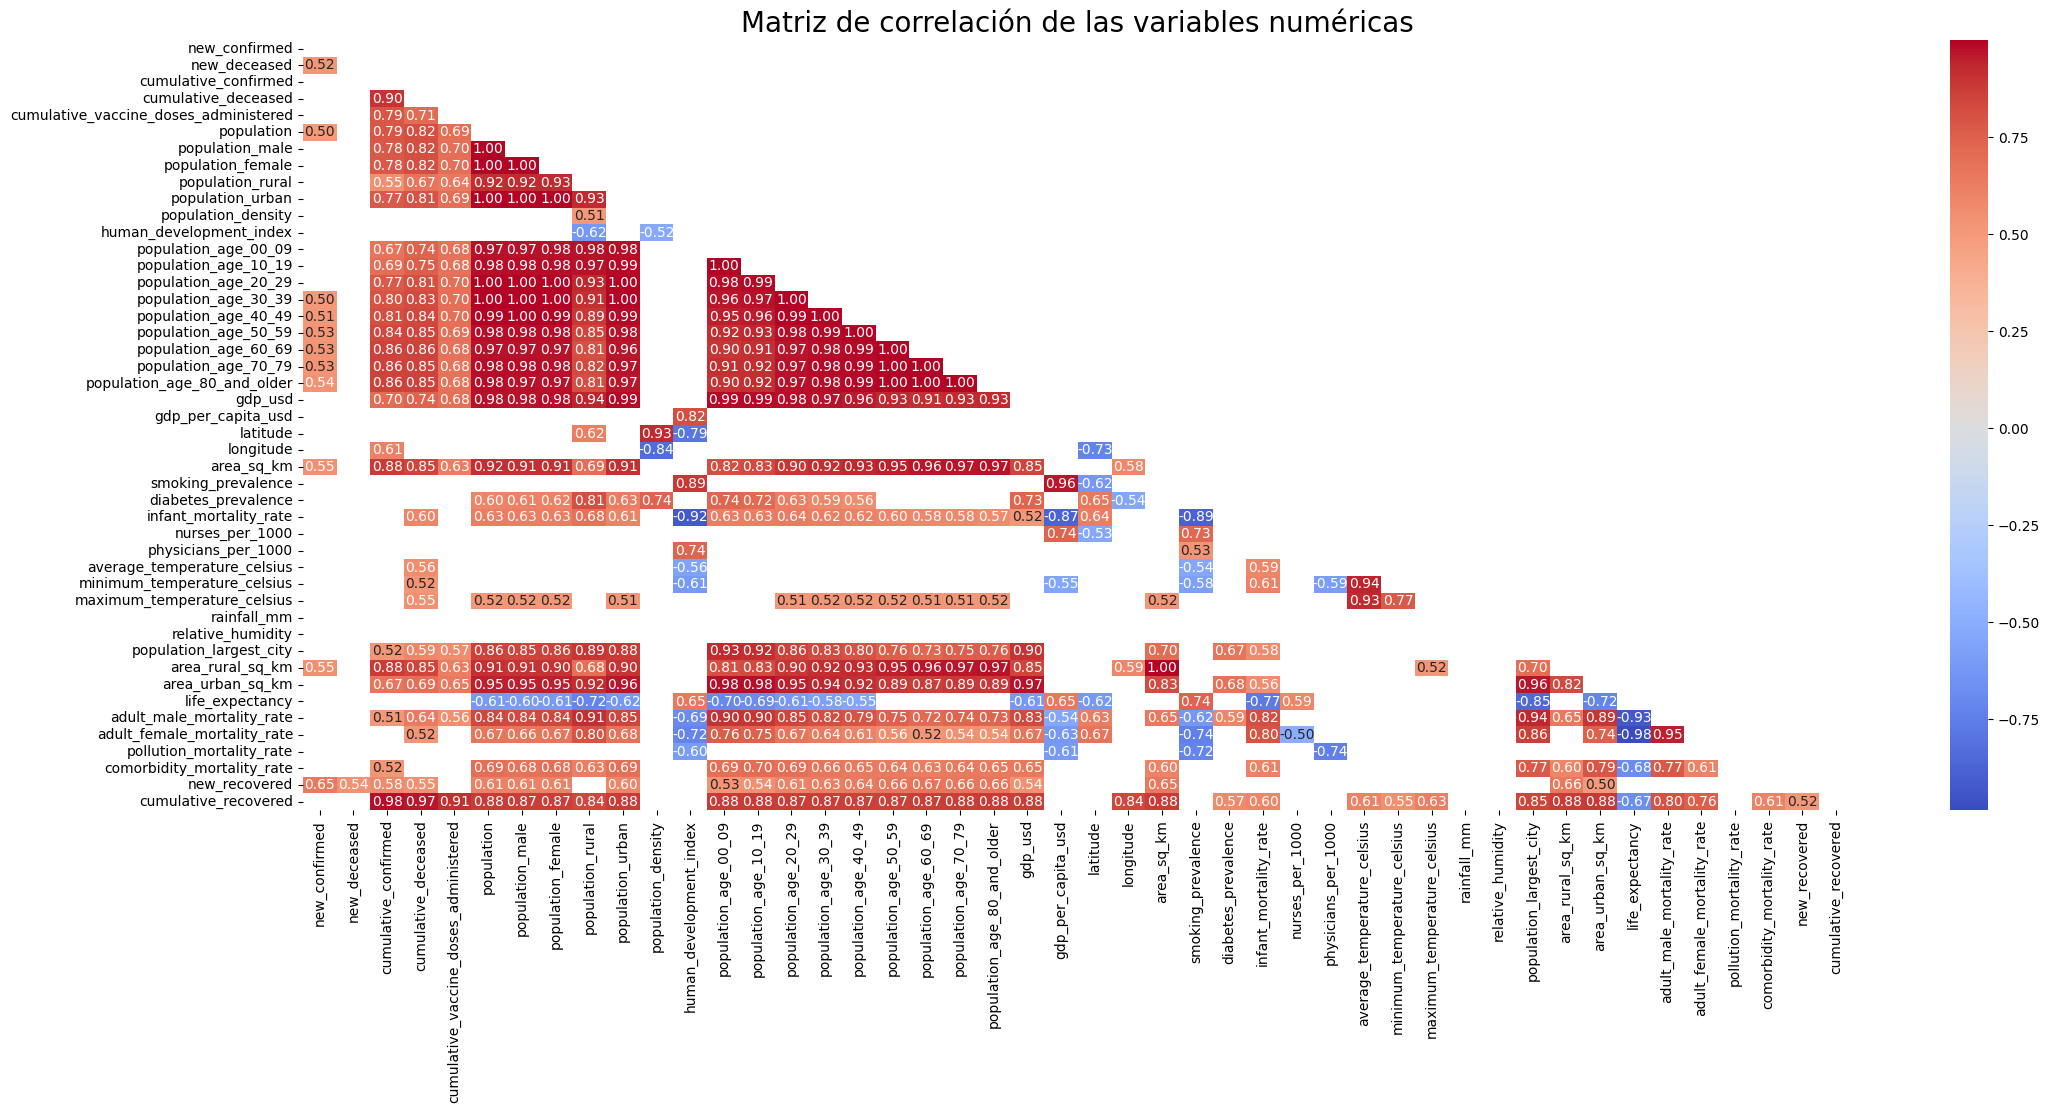

In [29]:
# Seleccionar columnas numéricas
numeric_columns = df_data_filtrada1.select_dtypes(include=['float64', 'int64']).columns

# Calcular la matriz de correlación (muestra como se relacionan entre si las diferentes variables numéricas)
correlation_matrix = df_data_filtrada1[numeric_columns].corr()

# Crear una máscara para el triángulo superior(para evitar la redundancia ya que una matriz de correlacion es simétrica)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Filtrar para mostrar valores de correlación superiores a 0.5
correlation_matrix = correlation_matrix[(correlation_matrix > 0.5) | (correlation_matrix < -0.5)]

# Crear el heatmap
plt.figure(figsize=(25, 10))
heatmap = sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlación de las variables numéricas', fontsize=20)
plt.show()

Mapa de calor donde observamos la matriz de correlacion entre las variables numéricas. Los valores de correlacion van de -1 a 1:

1 indica una correlación positiva perfecta (representada por rojo)


0 indica que no hay correlación (no hay relacion entre las variables)


-1 indica una correlación negativa perfecta (tonos azules, relacion inversa)

Cumulative confirmed y cumulative deceased tienen una fuerte correlación positiva (0.99), lo cual es esperado ya que a mayor número de casos confirmados, también aumenta el número de fallecidos.
Variables relacionadas con la salud, como infant_mortality_rate, nurses_per_1000, physicians_per_1000, están agrupadas y muestran correlaciones esperadas entre ellas.
Variables demográficas y de desarrollo económico, como gdp_per_capita_usd, population_density, y life_expectancy también muestran correlaciones fuertes entre sí.

In [30]:
print(df_data_filtrada1.columns)

Index(['location_key', 'country_code', 'country_name', 'new_confirmed',
       'new_deceased', 'cumulative_confirmed', 'cumulative_deceased',
       'cumulative_vaccine_doses_administered', 'population',
       'population_male', 'population_female', 'population_rural',
       'population_urban', 'population_density', 'human_development_index',
       'population_age_00_09', 'population_age_10_19', 'population_age_20_29',
       'population_age_30_39', 'population_age_40_49', 'population_age_50_59',
       'population_age_60_69', 'population_age_70_79',
       'population_age_80_and_older', 'gdp_usd', 'gdp_per_capita_usd',
       'latitude', 'longitude', 'area_sq_km', 'smoking_prevalence',
       'diabetes_prevalence', 'infant_mortality_rate', 'nurses_per_1000',
       'physicians_per_1000', 'average_temperature_celsius',
       'minimum_temperature_celsius', 'maximum_temperature_celsius',
       'rainfall_mm', 'relative_humidity', 'population_largest_city',
       'area_rural_sq_km', 

##### Grafico de barras para cada columna por pais. 

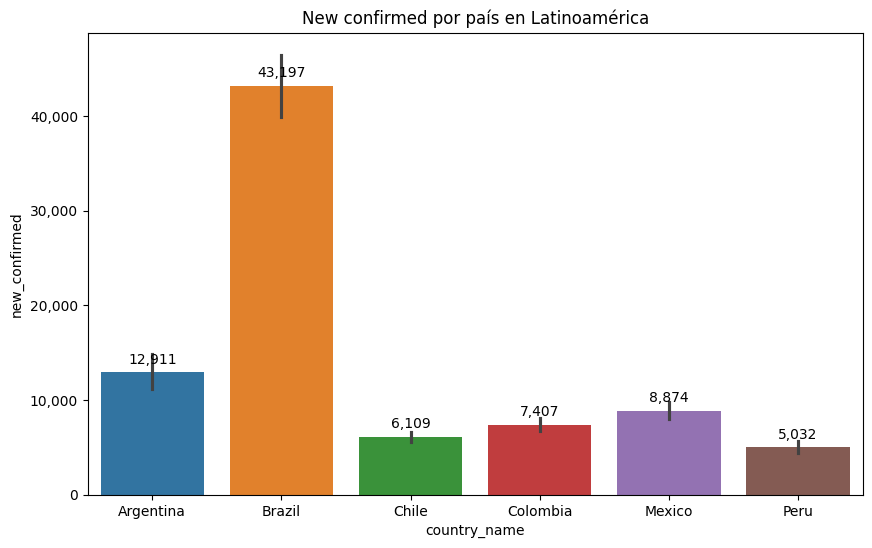

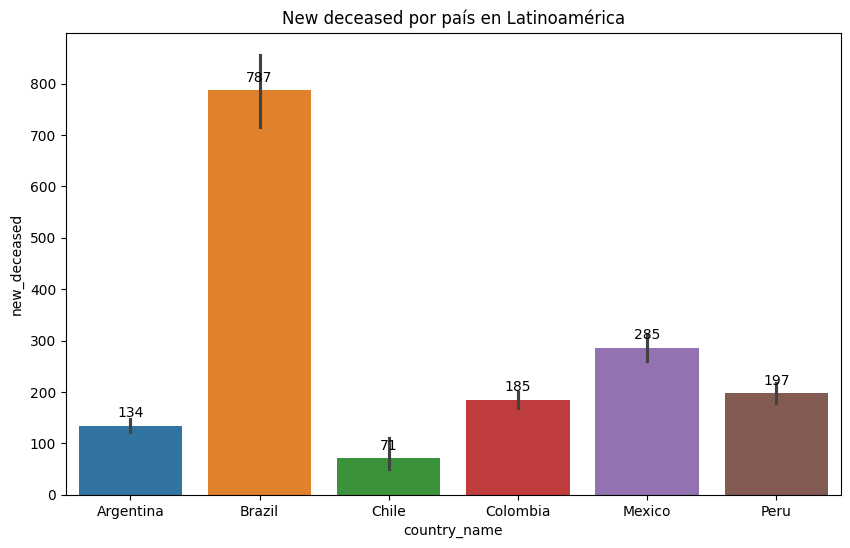

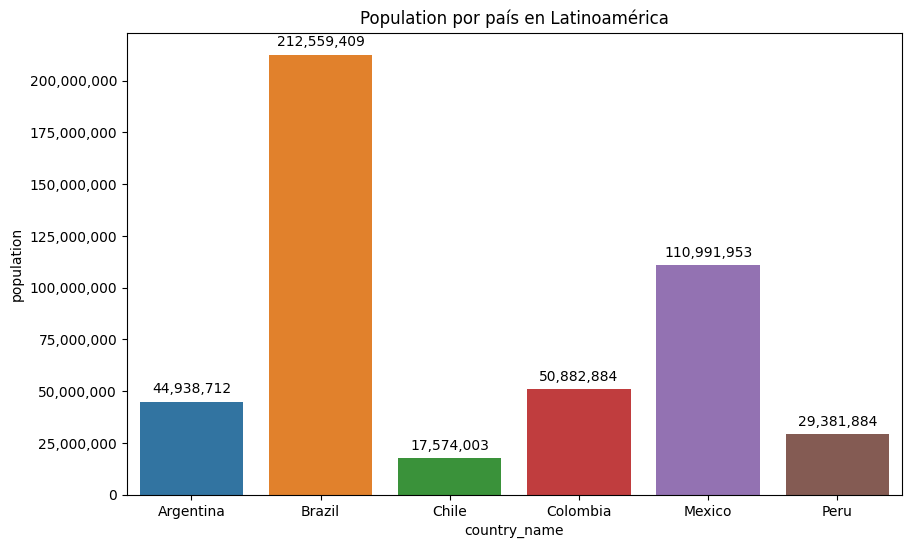

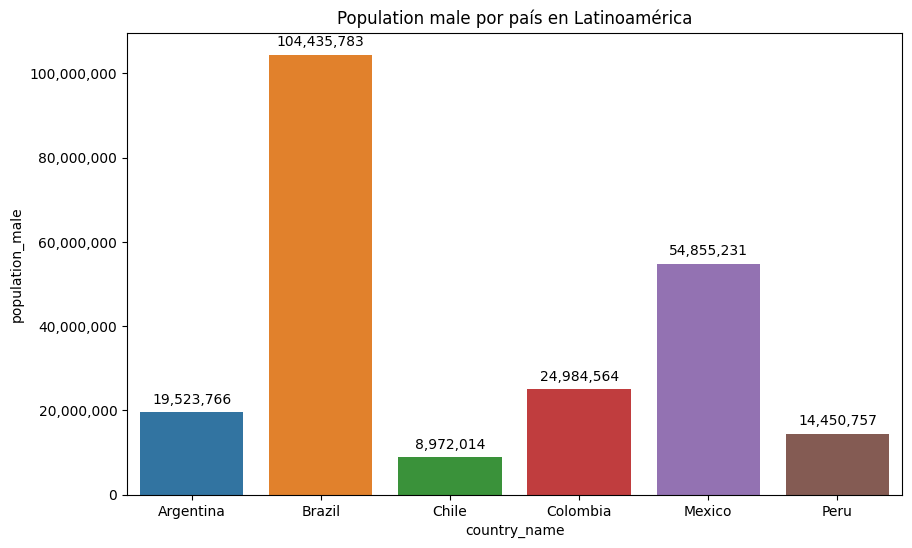

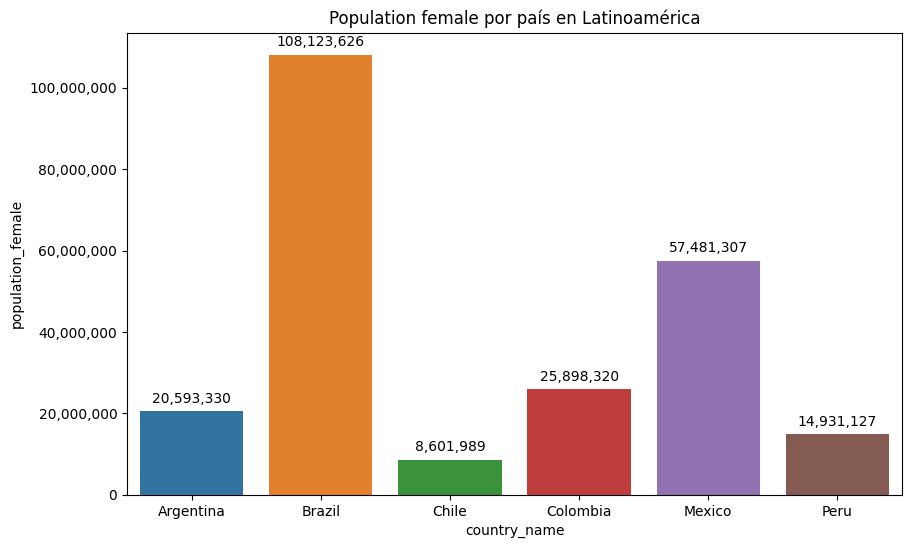

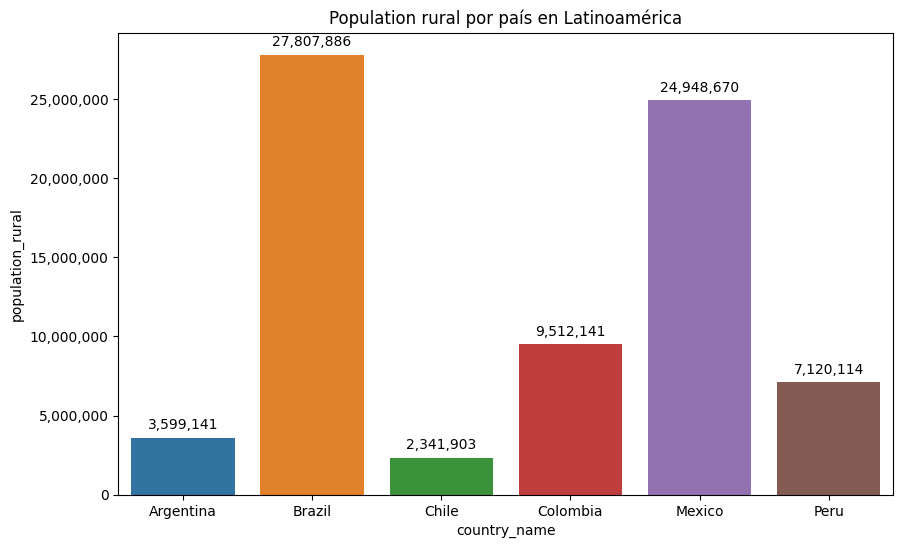

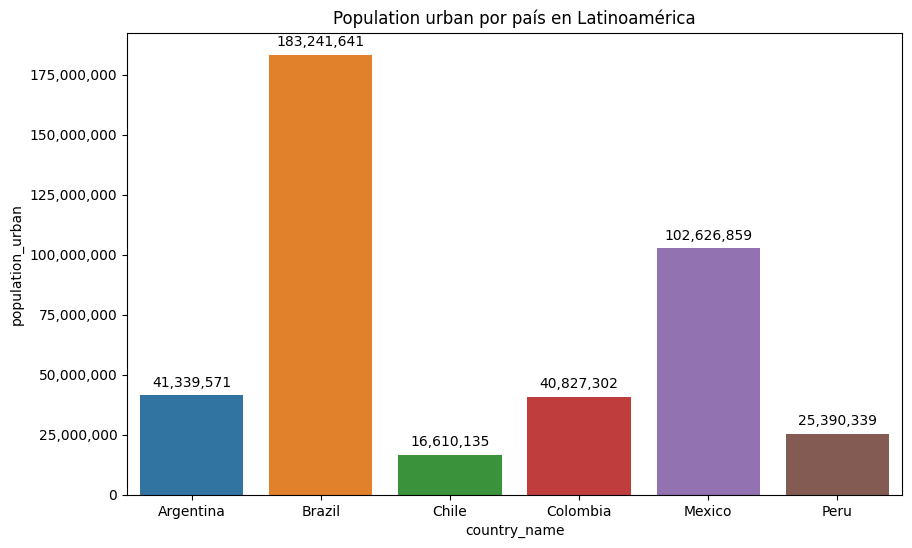

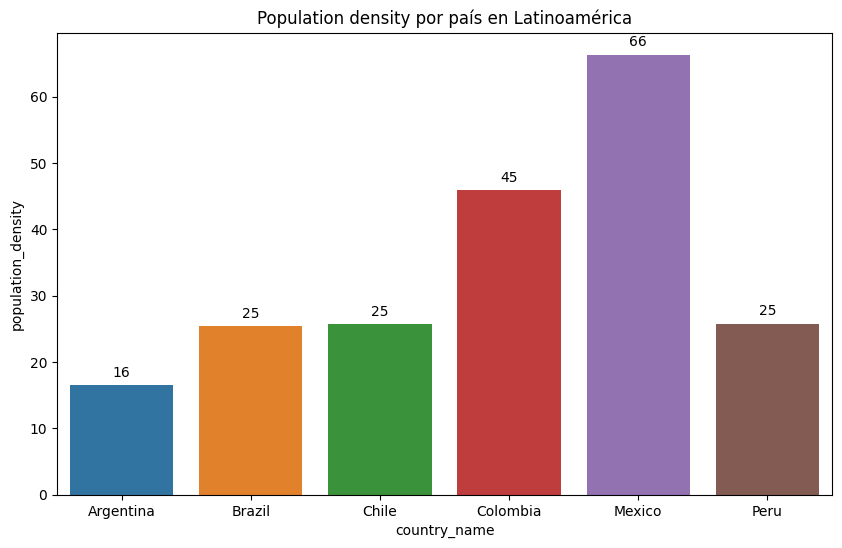

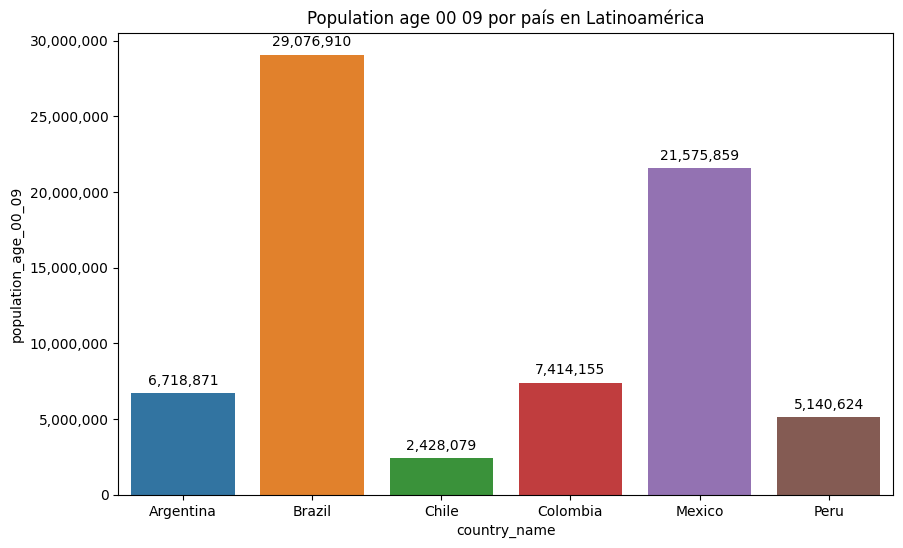

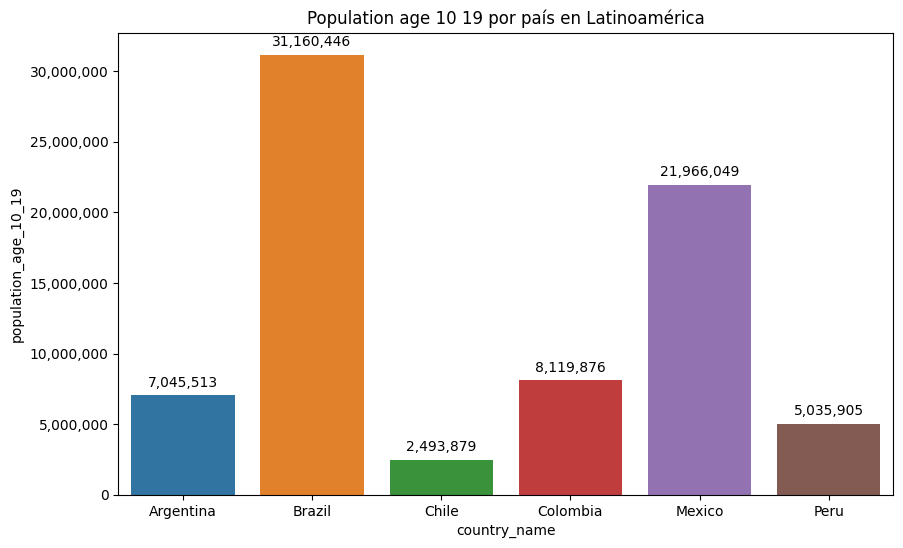

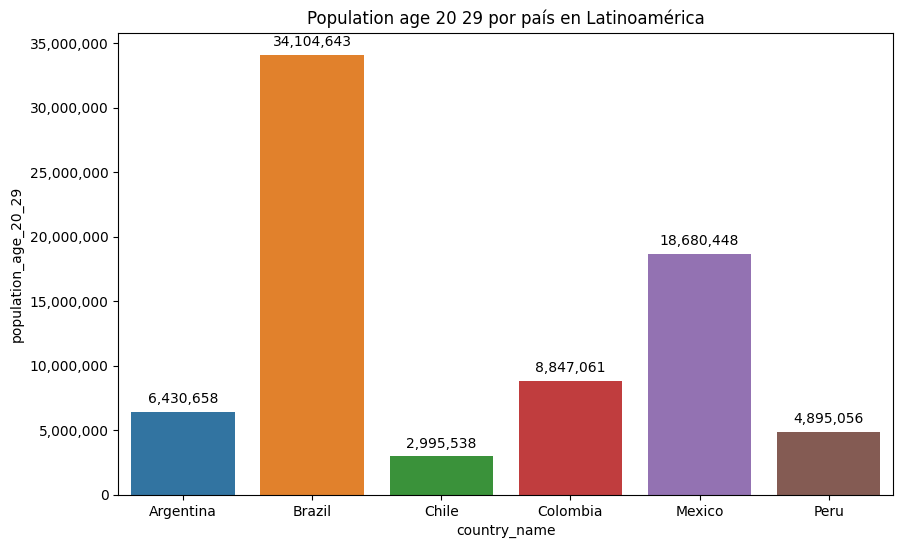

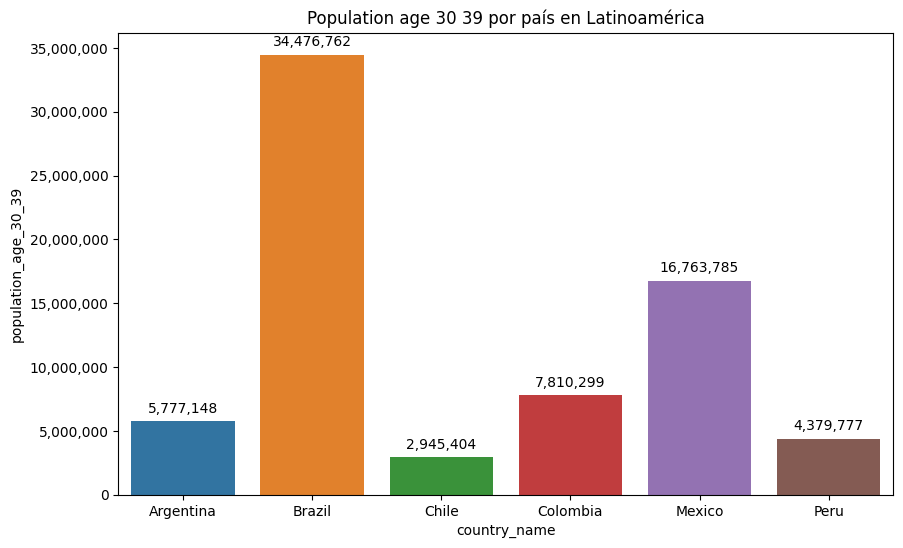

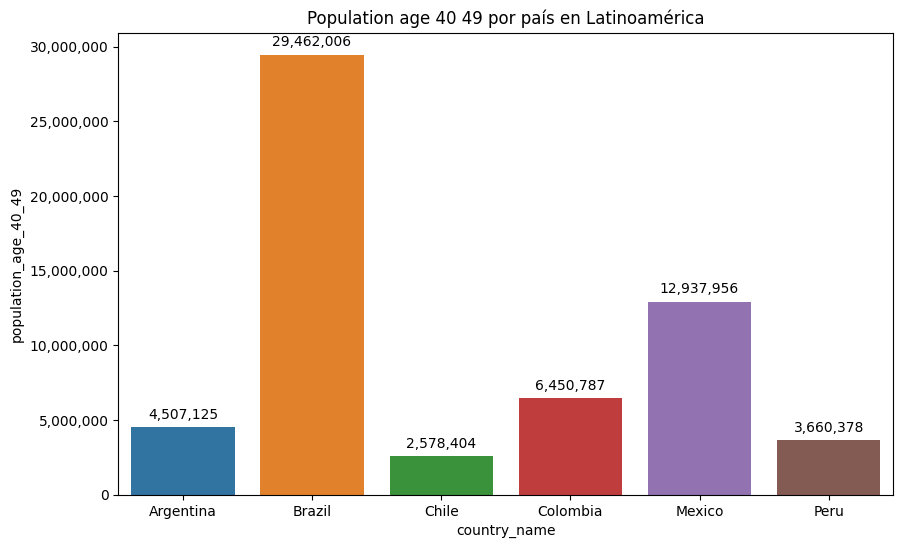

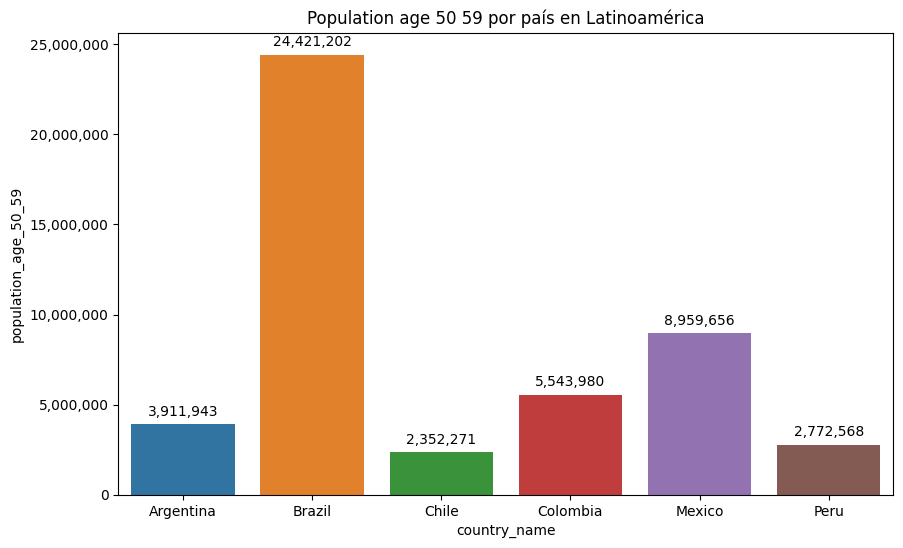

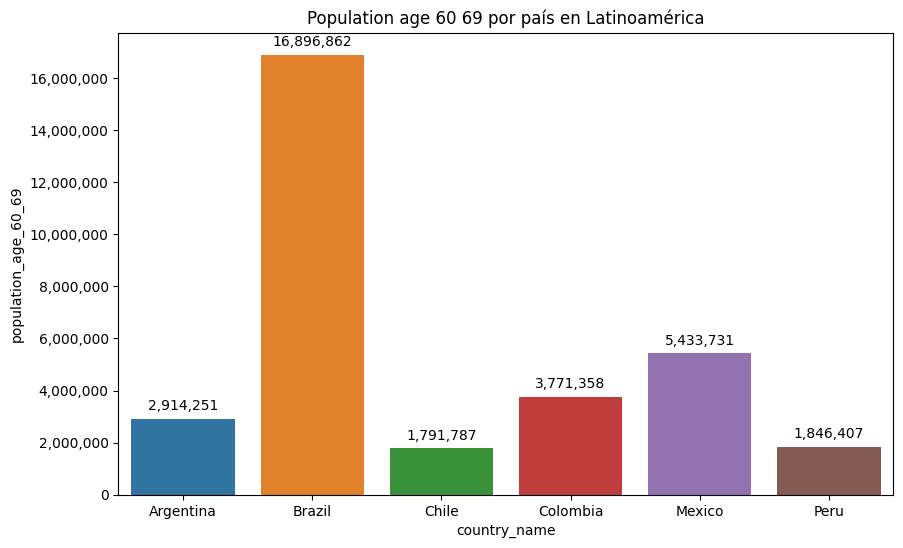

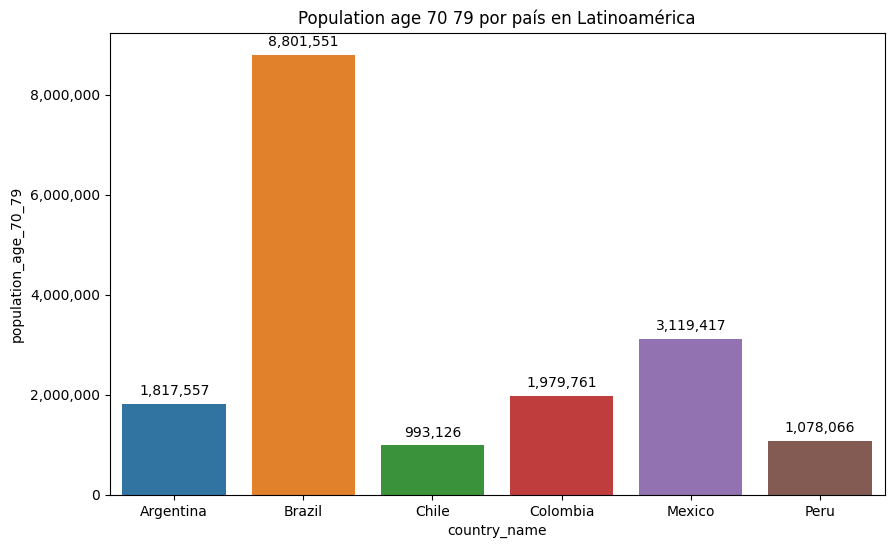

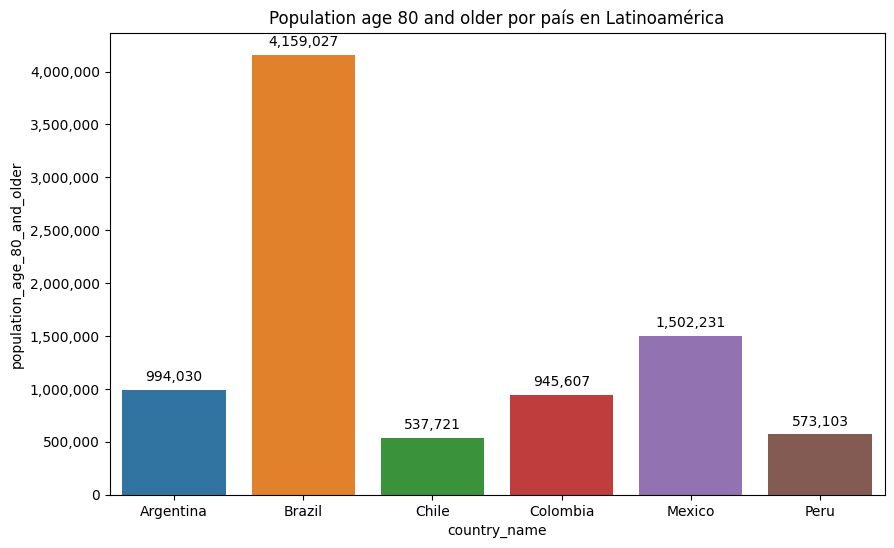

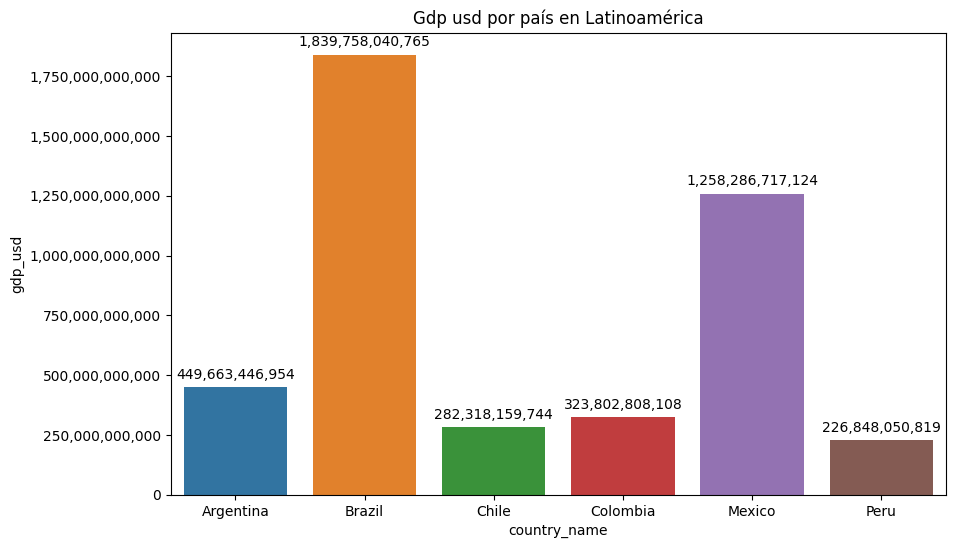

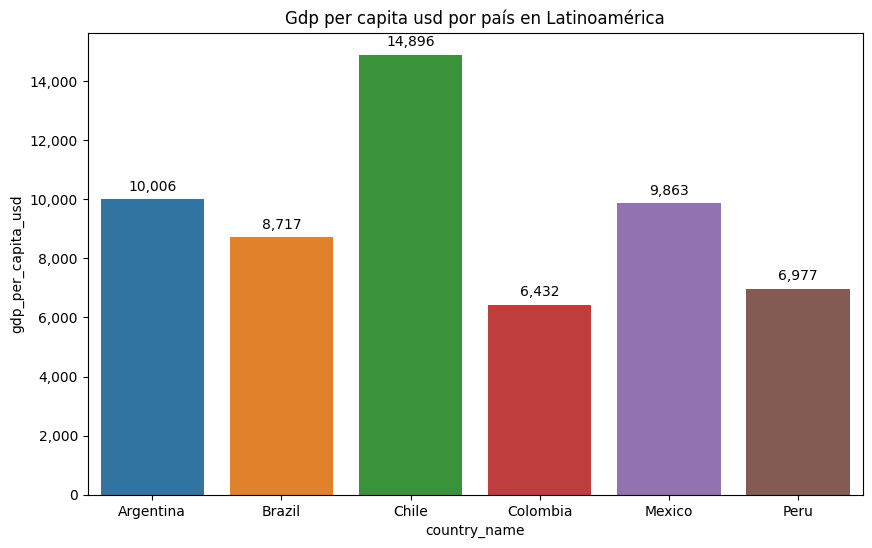

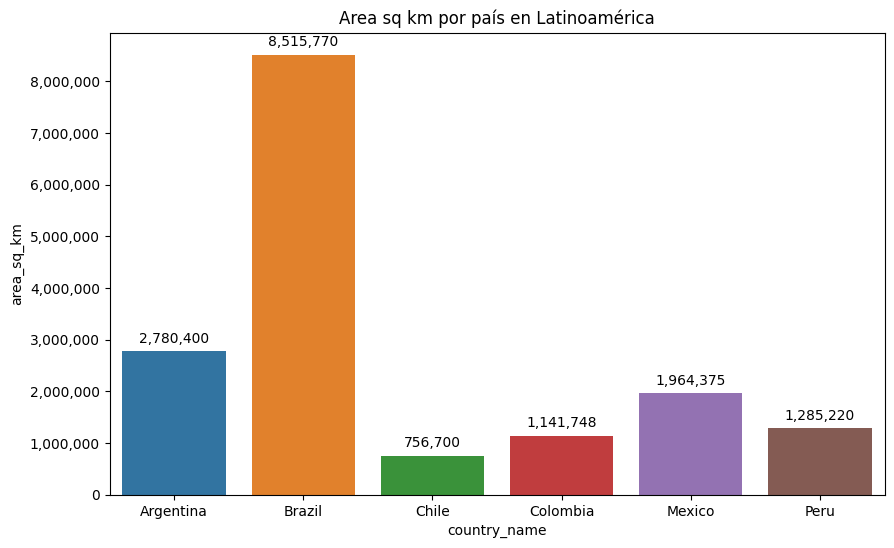

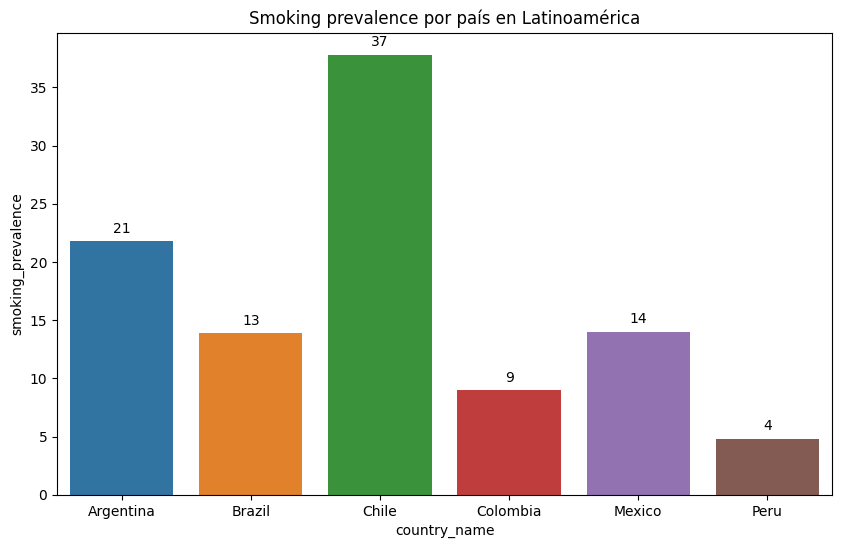

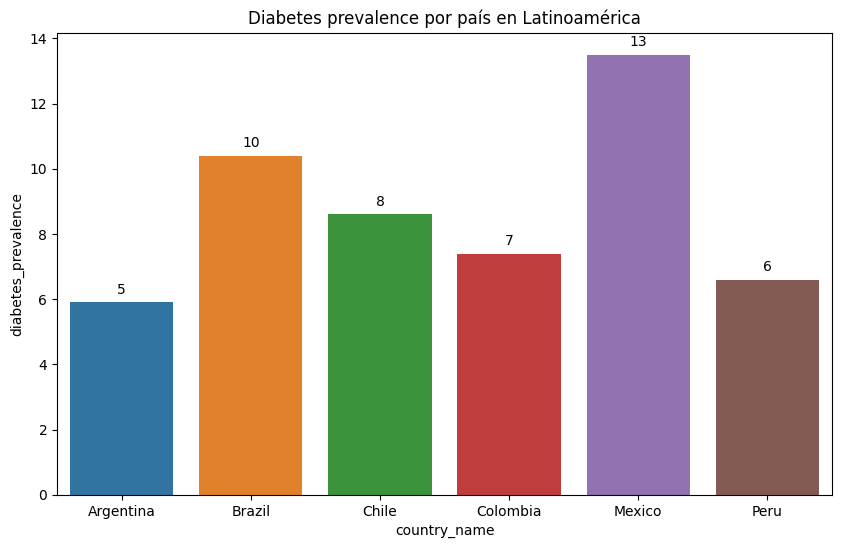

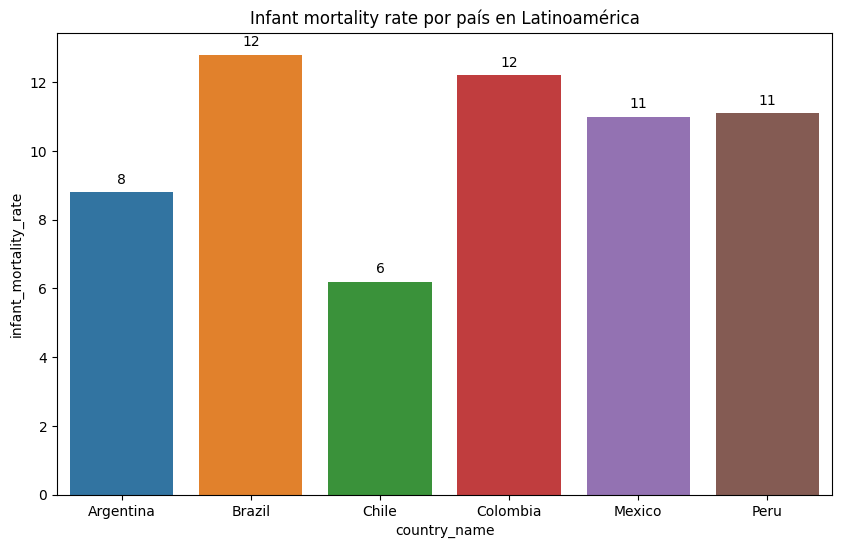

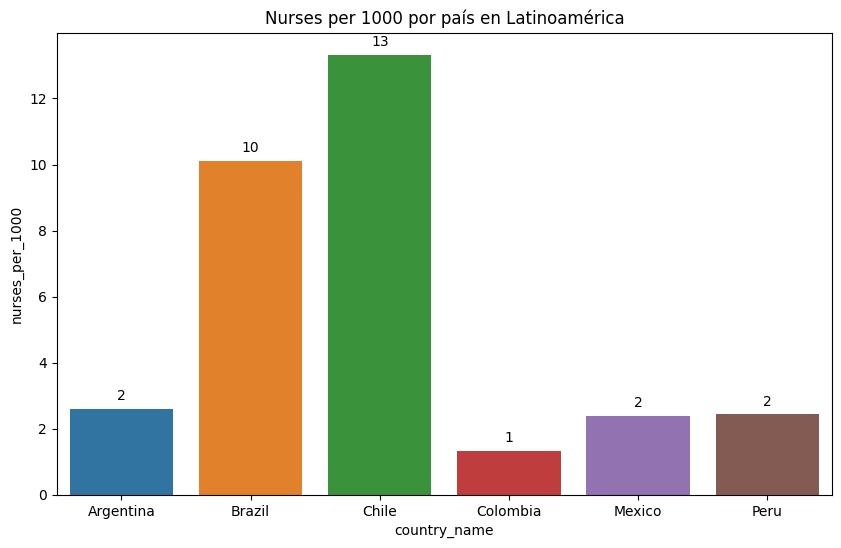

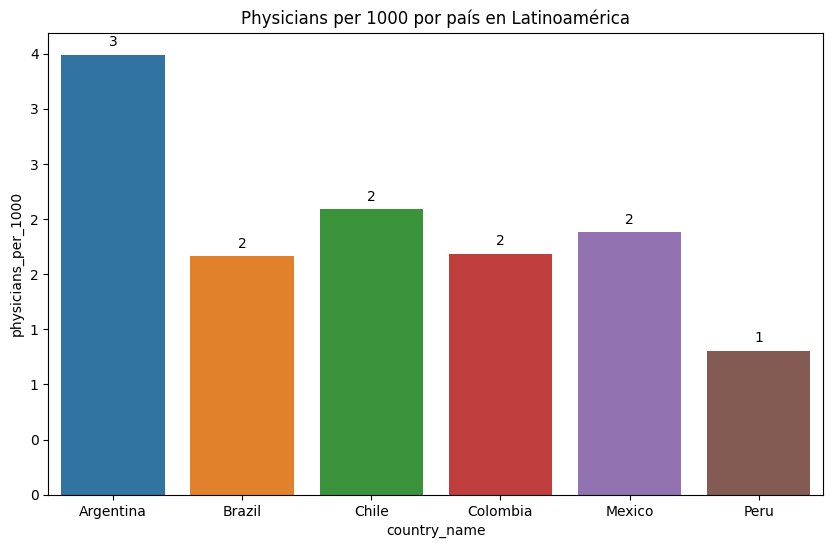

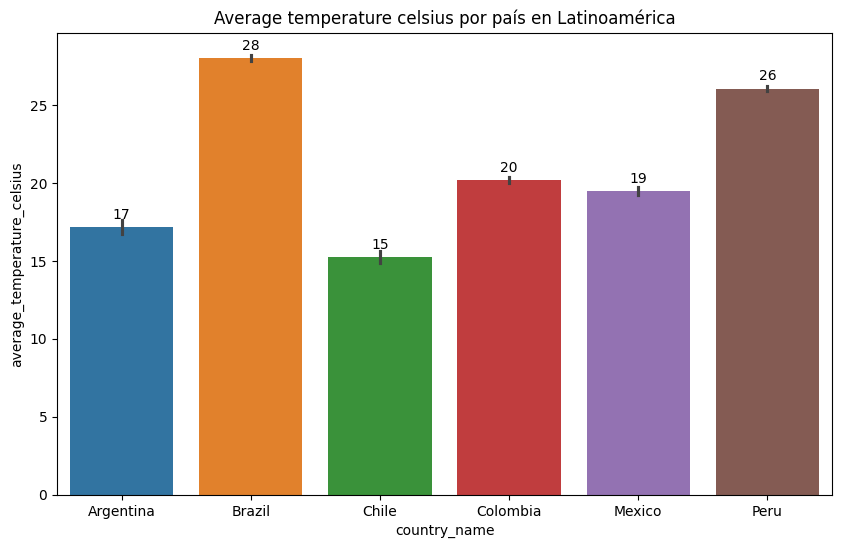

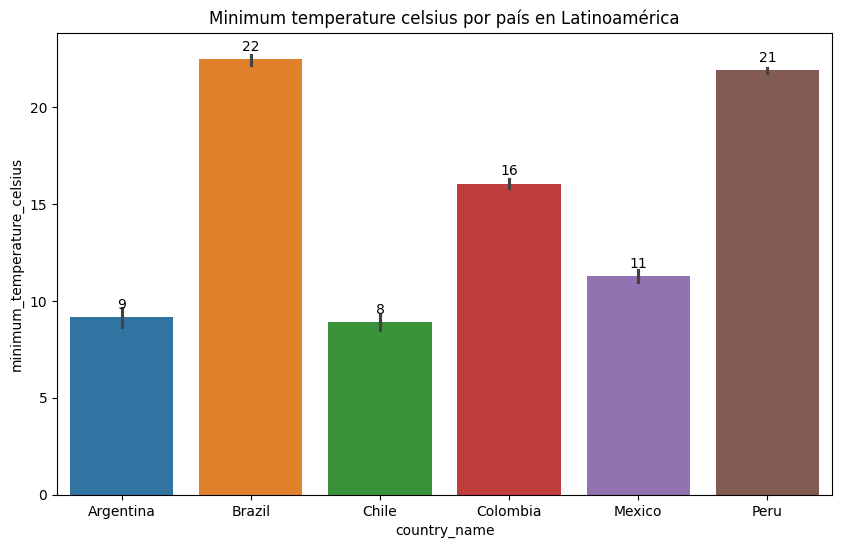

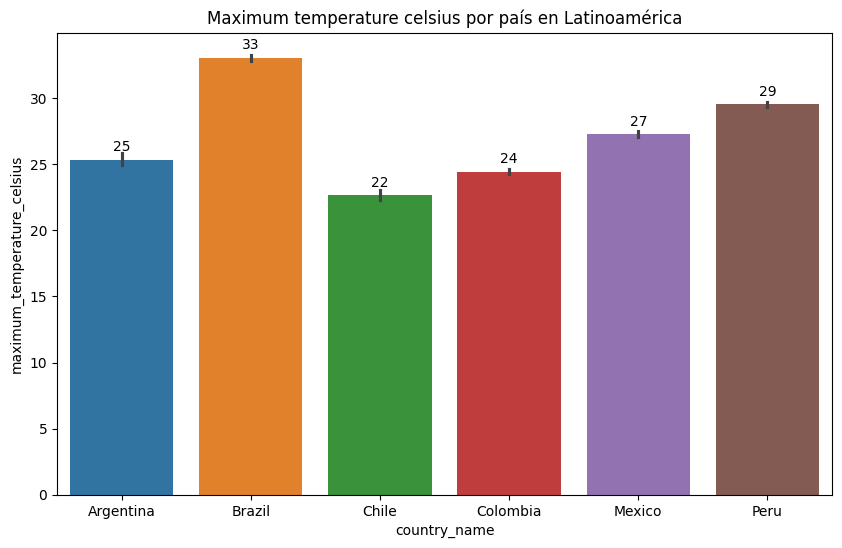

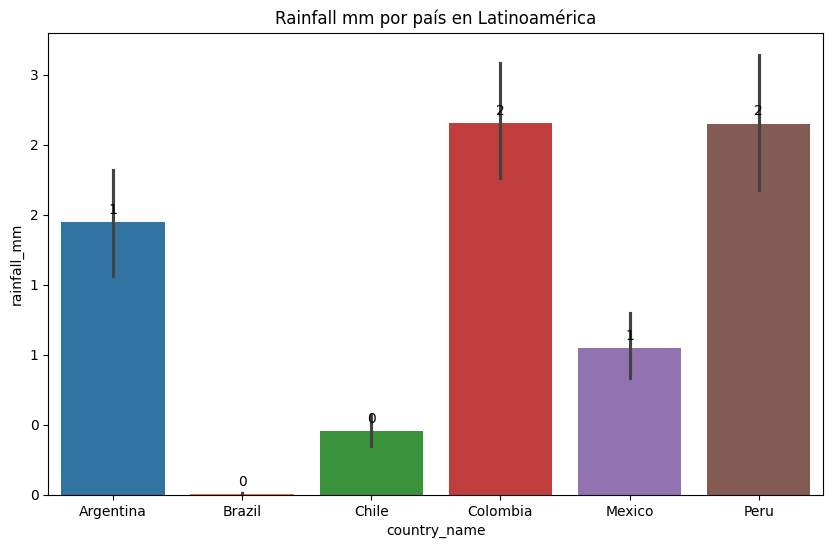

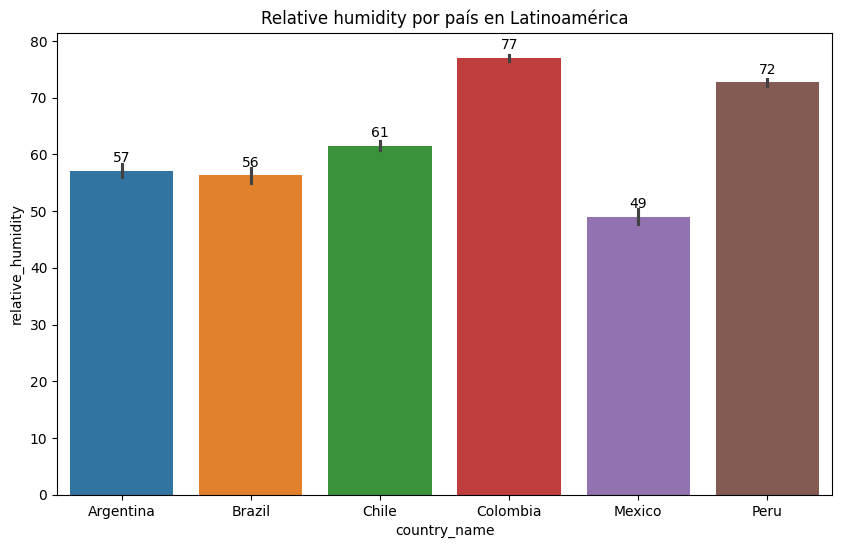

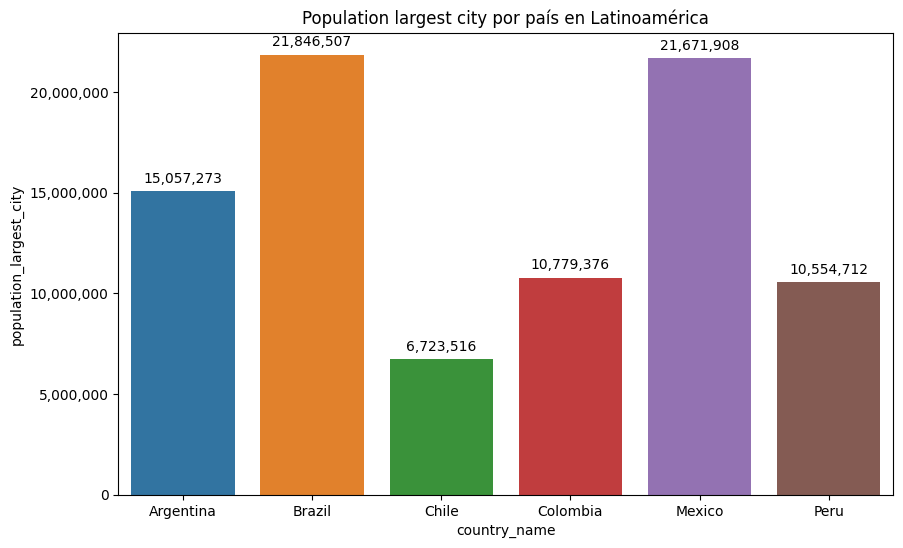

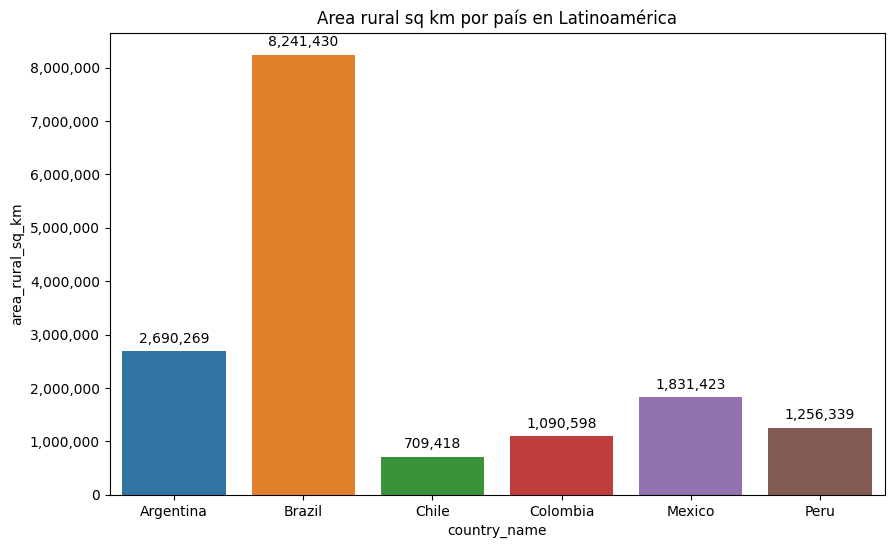

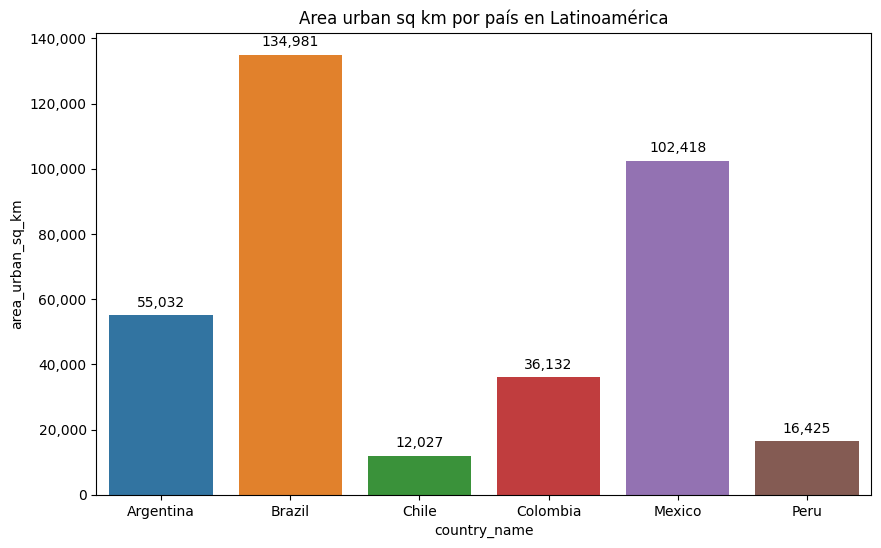

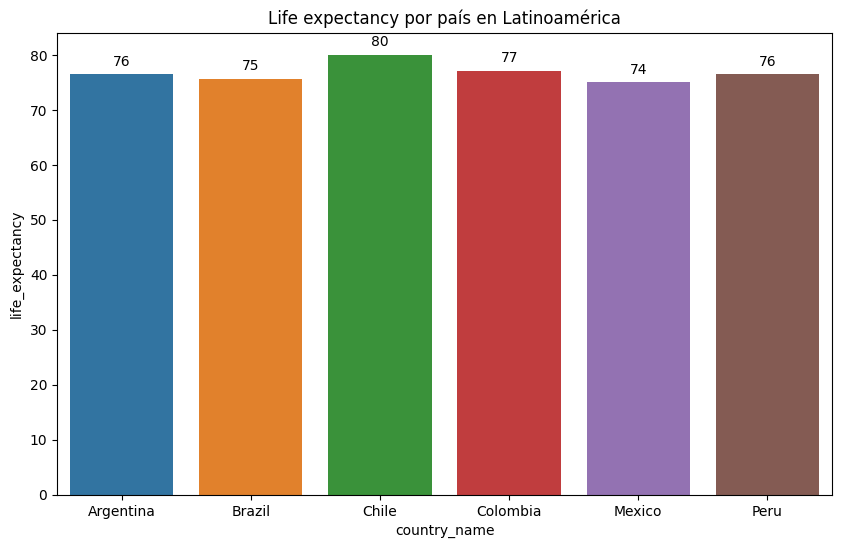

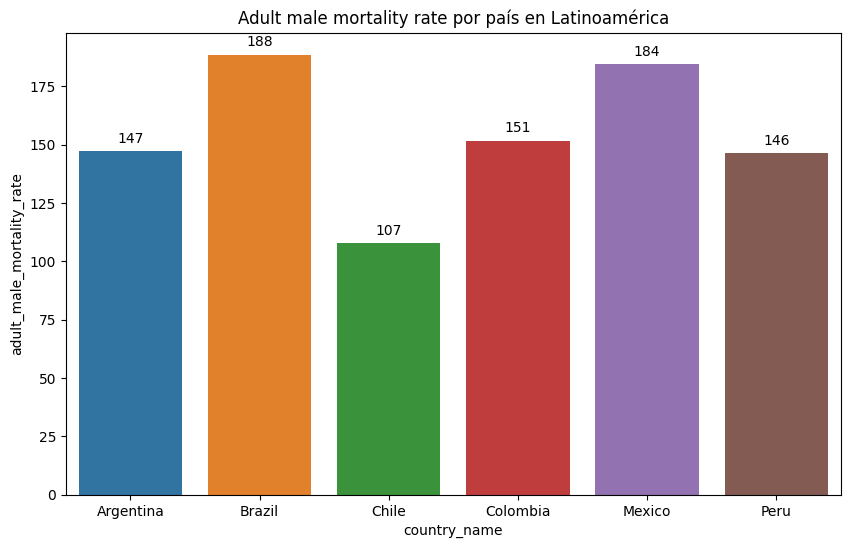

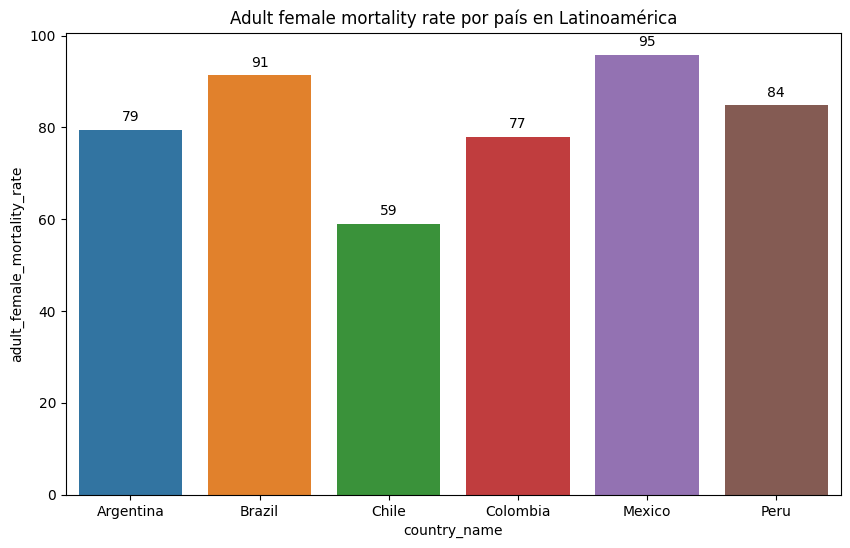

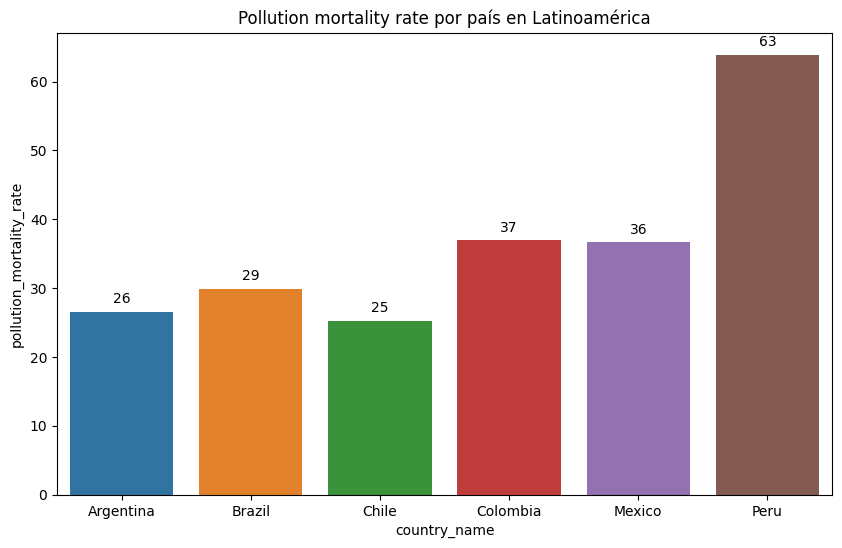

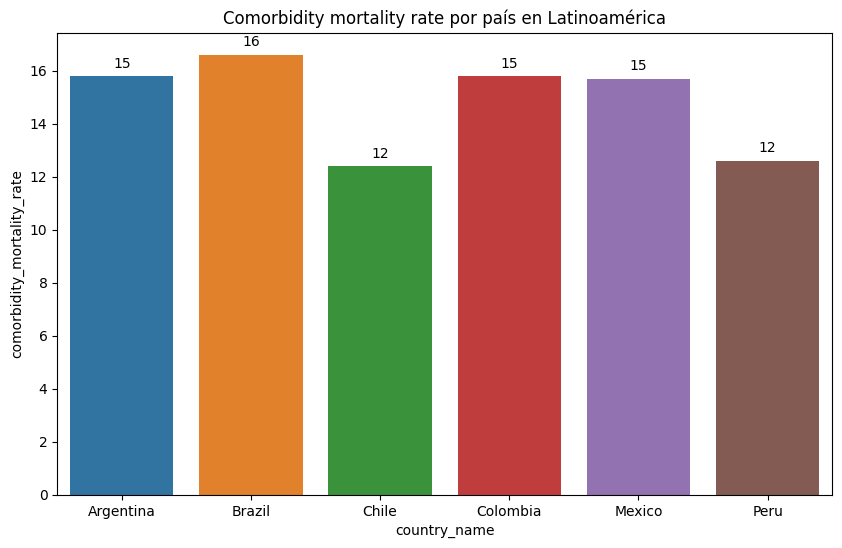

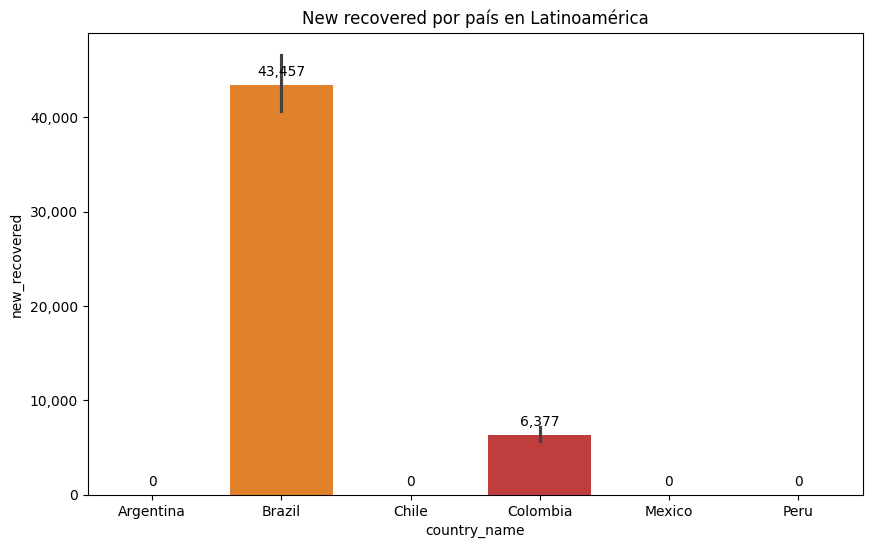

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

# Lista de columnas para las que deseas crear gráficos
columns = ['new_confirmed',
       'new_deceased', 'population',
       'population_male', 'population_female', 'population_rural',
       'population_urban', 'population_density',
       'population_age_00_09', 'population_age_10_19', 'population_age_20_29',
       'population_age_30_39', 'population_age_40_49', 'population_age_50_59',
       'population_age_60_69', 'population_age_70_79',
       'population_age_80_and_older', 'gdp_usd', 'gdp_per_capita_usd', 'area_sq_km', 'smoking_prevalence',
       'diabetes_prevalence', 'infant_mortality_rate', 'nurses_per_1000',
       'physicians_per_1000', 'average_temperature_celsius',
       'minimum_temperature_celsius', 'maximum_temperature_celsius',
       'rainfall_mm', 'relative_humidity', 'population_largest_city',
       'area_rural_sq_km', 'area_urban_sq_km', 'life_expectancy',
       'adult_male_mortality_rate', 'adult_female_mortality_rate',
       'pollution_mortality_rate', 'comorbidity_mortality_rate',
       'new_recovered']

# Iterar sobre cada columna y crear un gráfico de barras
for column in columns:
    fig, ax = plt.subplots(figsize=(10, 6))  # Crear una figura y un eje para el gráfico
    sns.barplot(x='country_name', y=column, data=df_data_filtrada1, ax=ax, hue='country_name')  # Crear el gráfico de barras con los paises en el eje x y en el eje y cada columna 

    # Añadir etiquetas en las barras con separación de miles
    for p in ax.patches:
        ax.annotate(format(int(p.get_height()), ',d'),
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center',
                    xytext=(0, 9),
                    textcoords='offset points')

    # Formatear las etiquetas del eje y con separación de miles
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: format(int(x), ',')))

    # Añadir un título al gráfico
    plt.title(f'{column.replace("_", " ").capitalize()} por país en Latinoamérica')

    # Mostrar el gráfico
    plt.show()


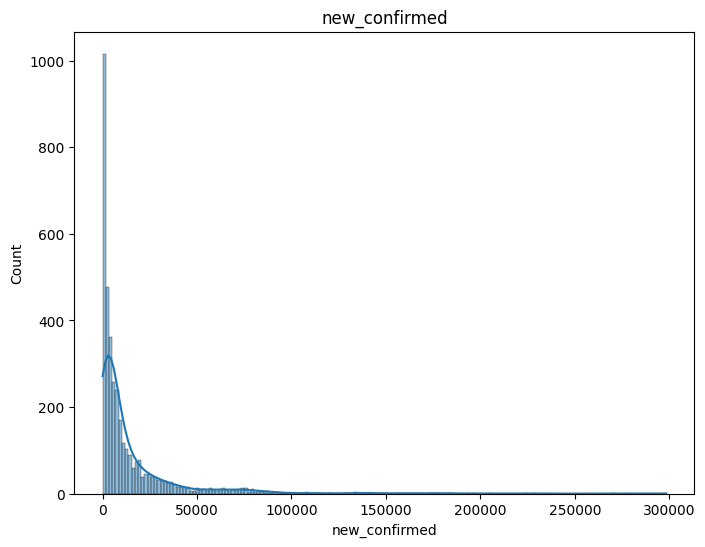

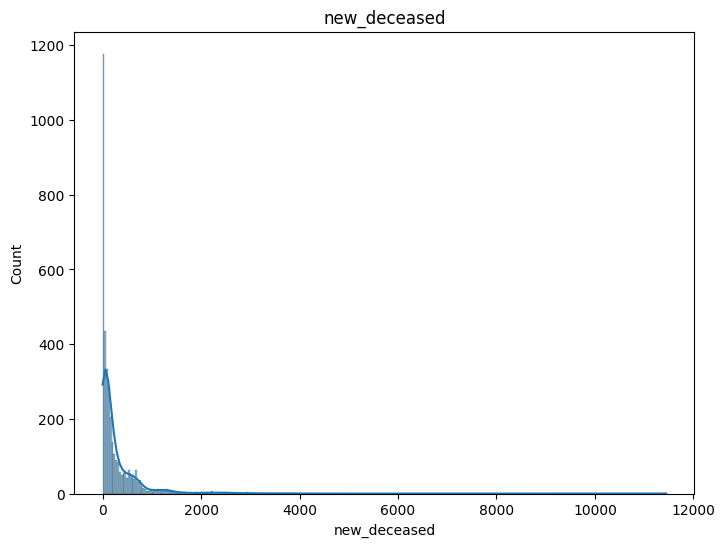

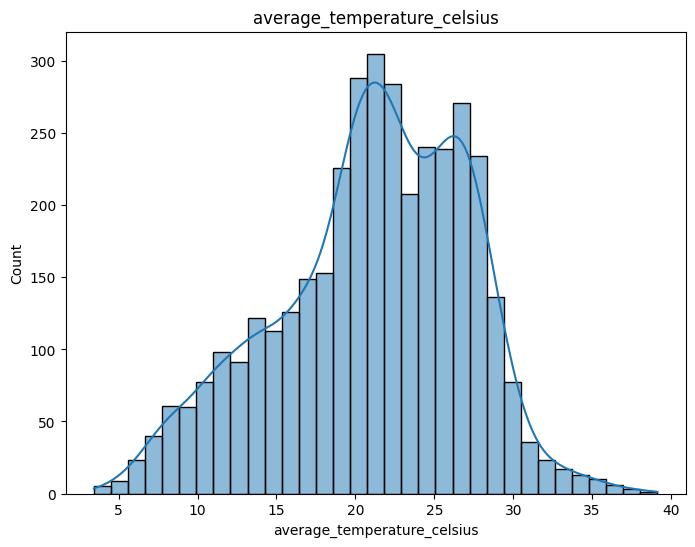

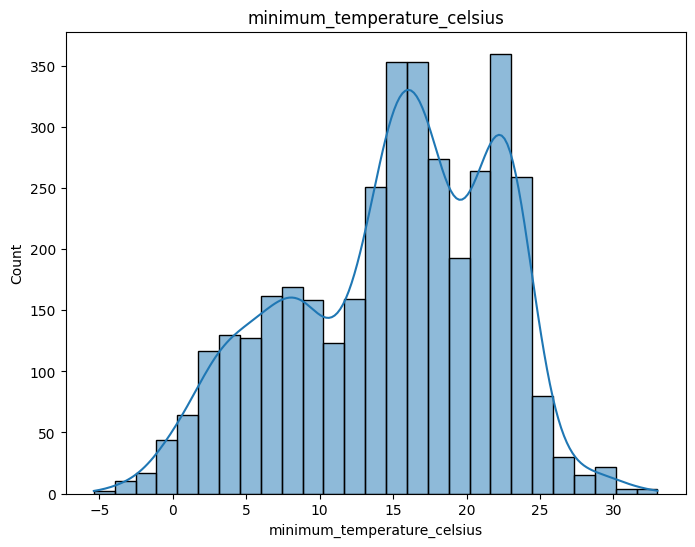

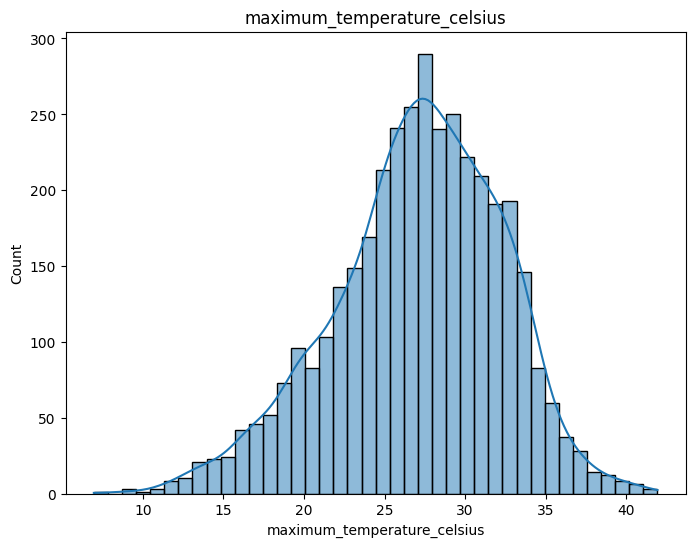

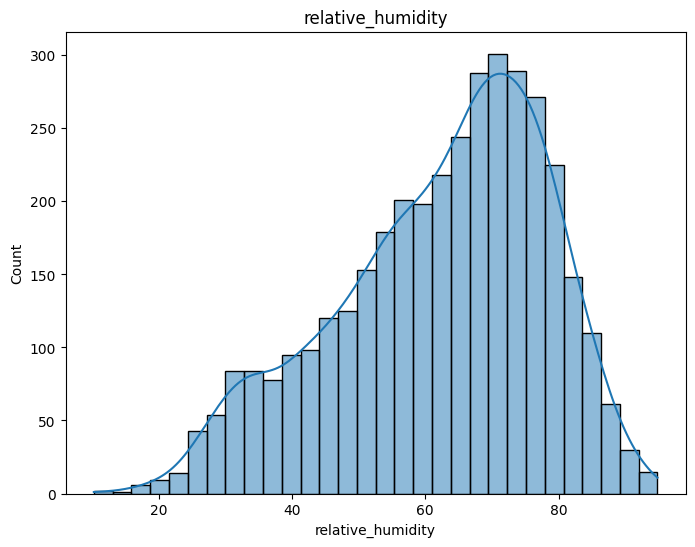

In [32]:
lista_columnas_6 = ["new_confirmed", "new_deceased", "cumulative_confirmed", "cumulative_deceased",
                    "cumulative_vaccine_doses_administered", "average_temperature_celsius", "minimum_temperature_celsius",
                    "maximum_temperature_celsius", "relative_humidity"]

# Crear histogramas de las variables numéricas
for i in df_data_filtrada1[lista_columnas_6]:
    if i not in ['location_key', 'date', 'country_code', 'country_name', 'latitude', 'longitude',
                 'cumulative_confirmed', 'cumulative_deceased', 'cumulative_recovered',
                 'cumulative_vaccine_doses_administered']:
        fig, ax = plt.subplots(figsize=(8, 6))
        sns.histplot(df_data_filtrada1[i], kde=True)
        plt.title(i)
        plt.show()


##### Relacion temperatura promedio vs nuevos casos confirmados

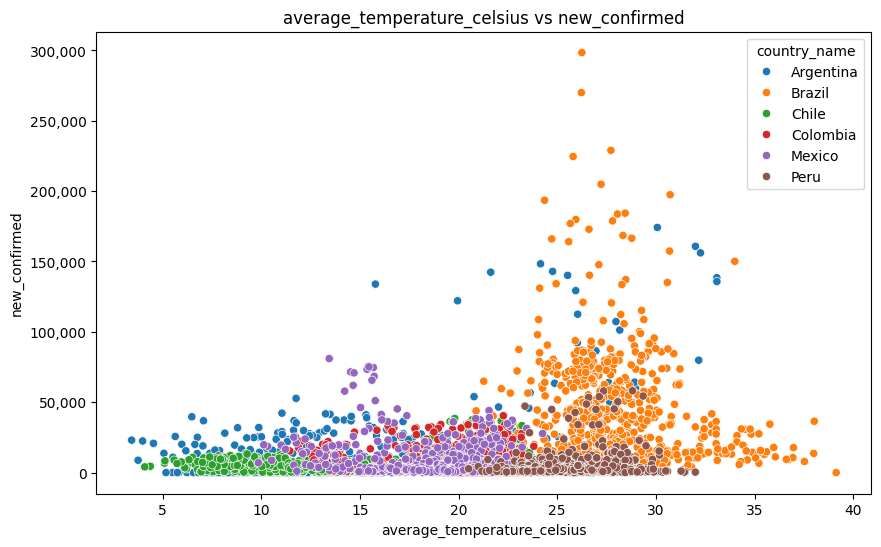

In [33]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(x='average_temperature_celsius', y='new_confirmed', data=df_data_filtrada1, hue='country_name')
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: format(int(x), ','))) #mostrar los numeros con separador de miles 
plt.title('average_temperature_celsius vs new_confirmed')
plt.show()


##### Distribucion de temperatura y fallecidos.

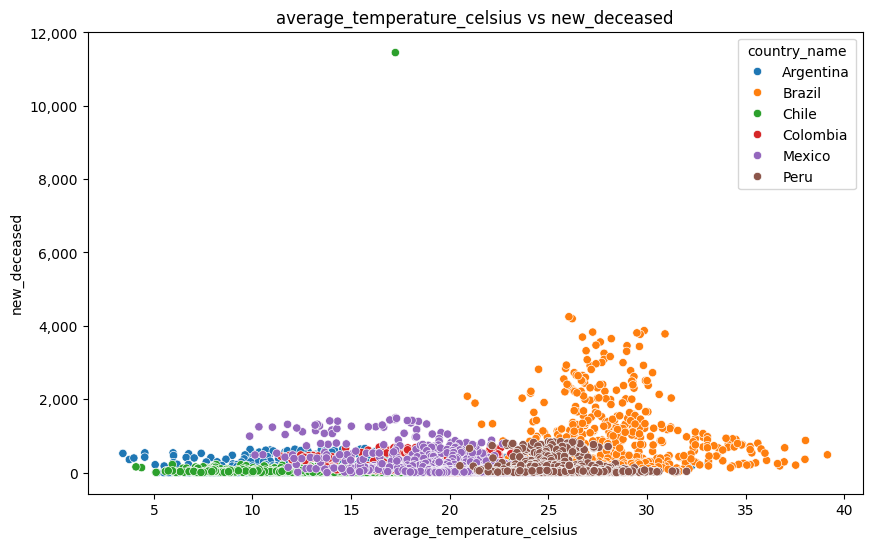

In [34]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(x='average_temperature_celsius', y='new_deceased', data=df_data_filtrada1, hue='country_name', ax=ax)
plt.title('average_temperature_celsius vs new_deceased')
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: format(int(x), ',')))
plt.show()


La mayoría de los puntos están agrupados en el rango de temperaturas entre 0 y 25 grados Celsius.
Los fallecidos nuevos tienden a ser más numerosos en temperaturas entre 15 y 30 grados Celsius, con algunas excepciones.
No parece haber una relación clara y directa entre la temperatura promedio y el número de nuevos fallecidos en general, pero hay un aumento en el número de fallecidos en ciertos rangos de temperatura para ciertos países.
El gráfico muestra que algunos países, como Brasil y México, tienen más fallecidos nuevos en temperaturas más altas, mientras que otros, como Argentina y Chile, tienen una distribución más dispersa sin un patrón claro de temperatura.

##### Cantidad total de dosis administradas por pais. 

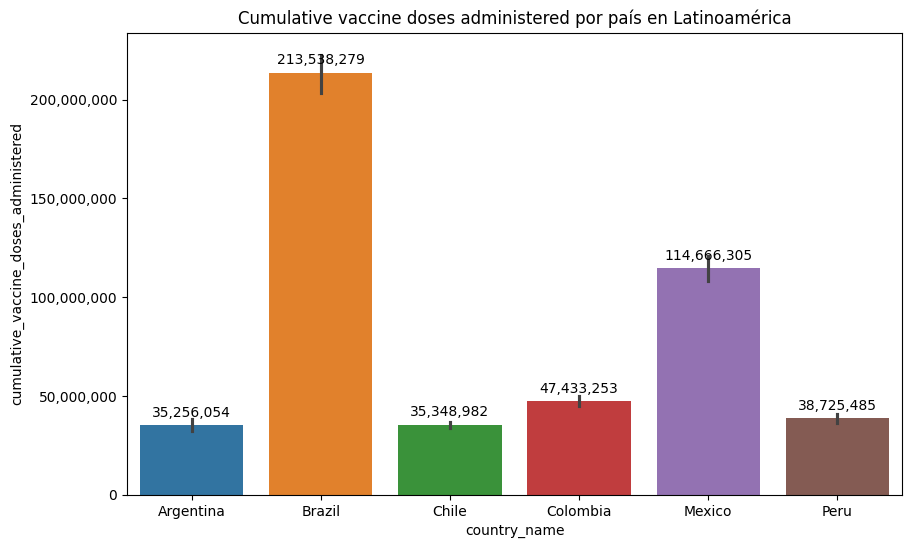

In [35]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x='country_name', y='cumulative_vaccine_doses_administered', data=df_data_filtrada1, ax=ax, hue='country_name')

for p in ax.patches:
    ax.annotate(format(int(p.get_height()), ',d'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points')

ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: format(int(x), ',')))
plt.title('Cumulative vaccine doses administered por país en Latinoamérica')
plt.show()


Este gráfico proporciona una visión clara de la distribución de las dosis de vacunas administradas en diferentes países de Latinoamérica. Muestra que Brasil ha liderado la administración de vacunas en la región, seguido por México, y que hay una distribución más equitativa entre los otros países. No se pueden sacar grandes conclusiones ya que el pais que mas dosis administro es Brasil pero debido a que tiene una mayor poblacion. Mas adelante se verá en detalle.

##### Distribucion mensual de fallecidos. 

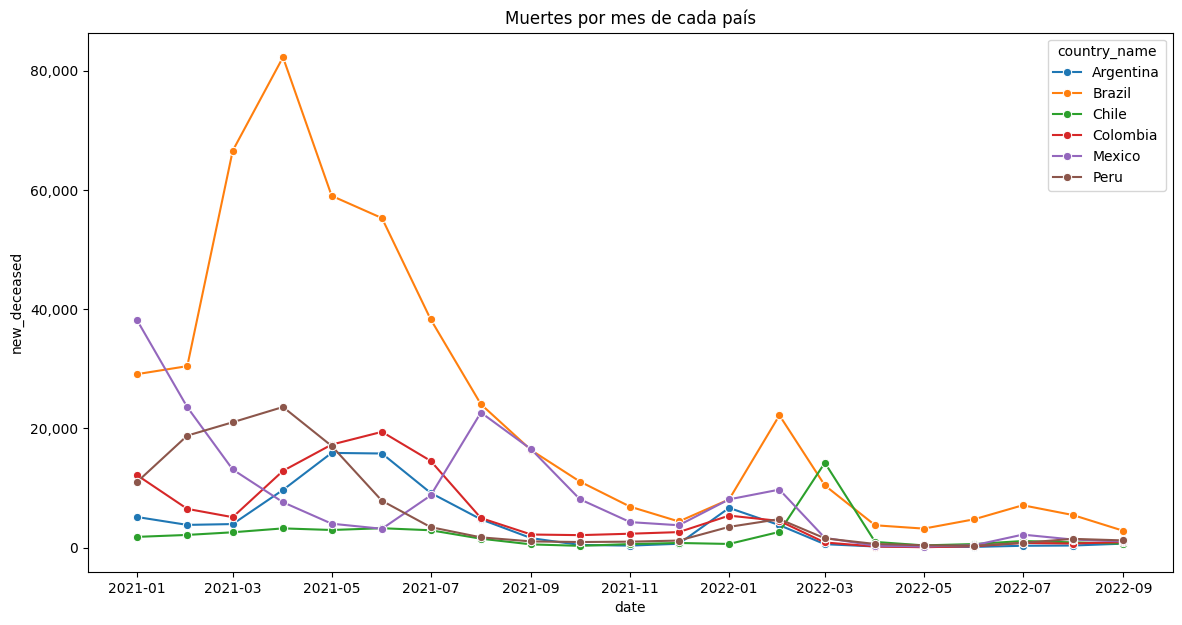

In [36]:
df_monthly_deceased = df_data_filtrada1.groupby([df_data_filtrada1.index.to_period('M'), 'country_name'])['new_deceased'].sum().reset_index()
df_monthly_deceased['date'] = df_monthly_deceased['date'].dt.to_timestamp()

fig, ax = plt.subplots(figsize=(14, 7))
sns.lineplot(x='date', y='new_deceased', hue='country_name', data=df_monthly_deceased, marker='o', ax=ax)

plt.title('Muertes por mes de cada país')
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: format(int(x), ',')))
plt.show()


Brasil (en color naranja) muestra un pico significativo en muertes nuevas alrededor de abril de 2021, alcanzando más de 80,000 muertes nuevas en ese mes. Después de este pico, hay una disminución gradual hasta el final del período. Se puede observar un patron similar en Chile, Argentina, Colombia y Peru. Mexico tiene un patron un tanto diferente. 
A lo largo del tiempo, la mayoría de los países muestran una tendencia general a la baja en el número de muertes nuevas, especialmente después de mediados de 2021.
Los picos en ciertos meses podrían estar relacionados con olas específicas de la pandemia, cambios en las políticas de salud pública, o factores externos como la vacunación masiva.

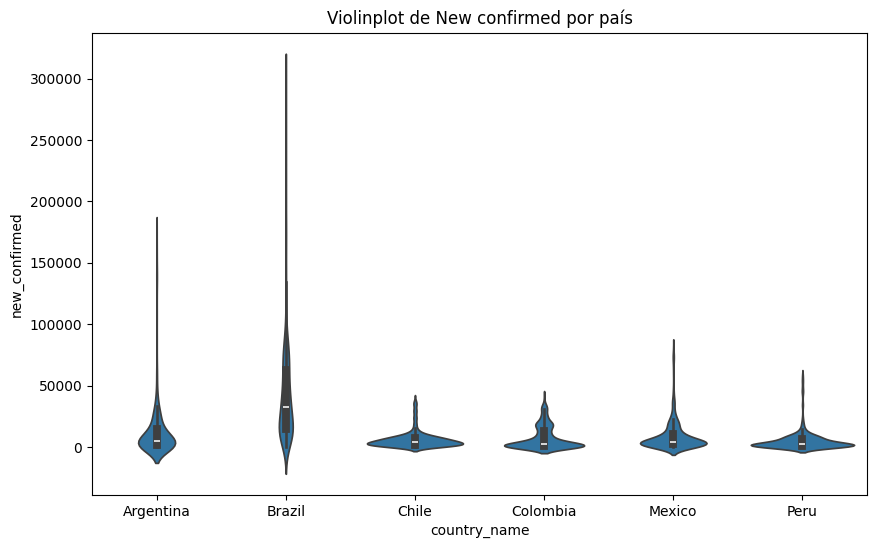

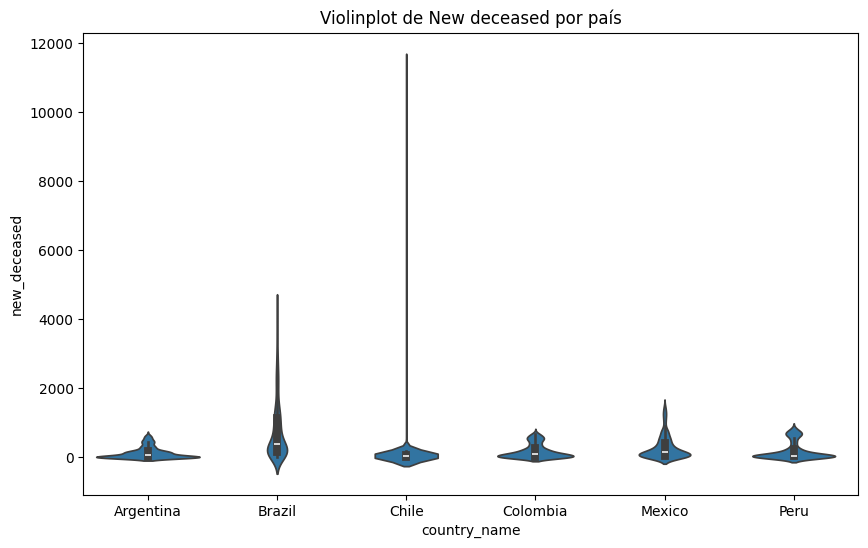

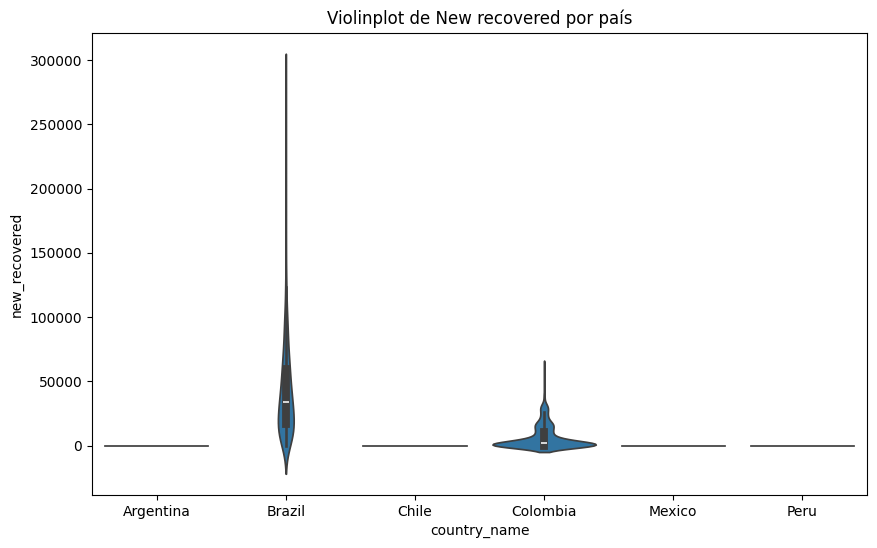

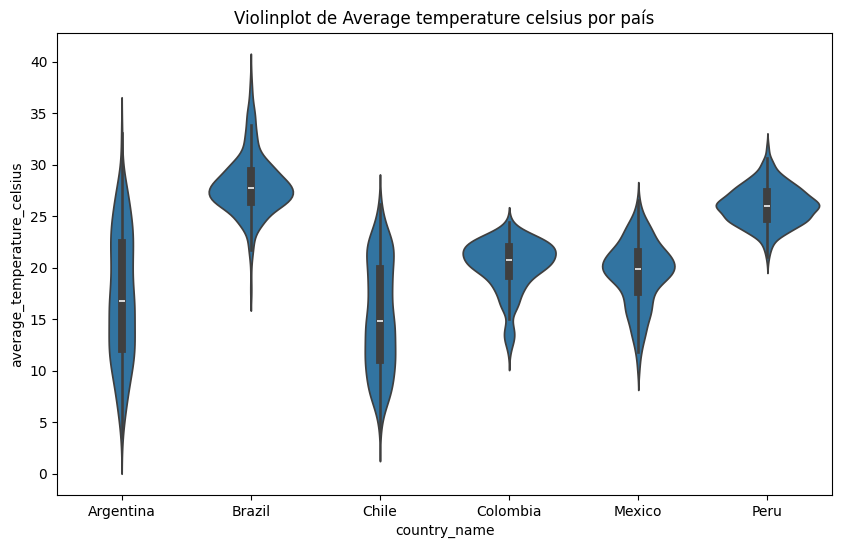

In [37]:
# Lista de columnas que sí tienen cambios de valores
columns_violinplot = ['new_confirmed', 'new_deceased', 'new_recovered', 'average_temperature_celsius']

for column in columns_violinplot:
    fig, ax = plt.subplots(figsize=(10, 6))
    sns.violinplot(x='country_name', y=column, data=df_data_filtrada1, ax=ax)
    
    plt.title(f'Violinplot de {column.replace("_", " ").capitalize()} por país')
    plt.show()


##### Distribución de la población por grupos de edad


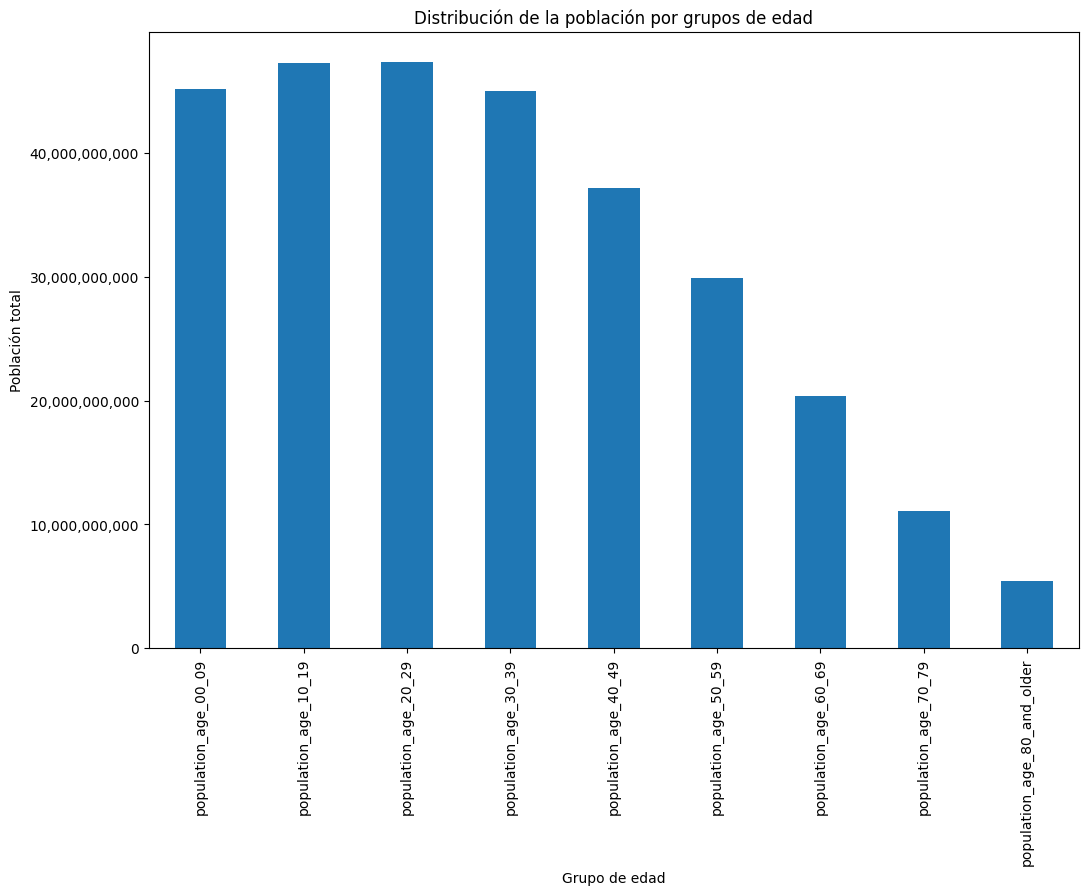

In [38]:
age_groups = ['population_age_00_09', 'population_age_10_19', 'population_age_20_29', 'population_age_30_39',
              'population_age_40_49', 'population_age_50_59', 'population_age_60_69', 'population_age_70_79',
              'population_age_80_and_older']

df_age_distribution = df_data_filtrada1[age_groups].sum()

fig, ax = plt.subplots(figsize=(12, 8))
df_age_distribution.plot(kind='bar', ax=ax)

plt.title('Distribución de la población por grupos de edad')
plt.xlabel('Grupo de edad')
plt.ylabel('Población total')
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: format(int(x), ',')))
plt.show()


##### Comparacion tasa de mortalidad Femenina vs Masculina
Calculo cada 1000 adultos.

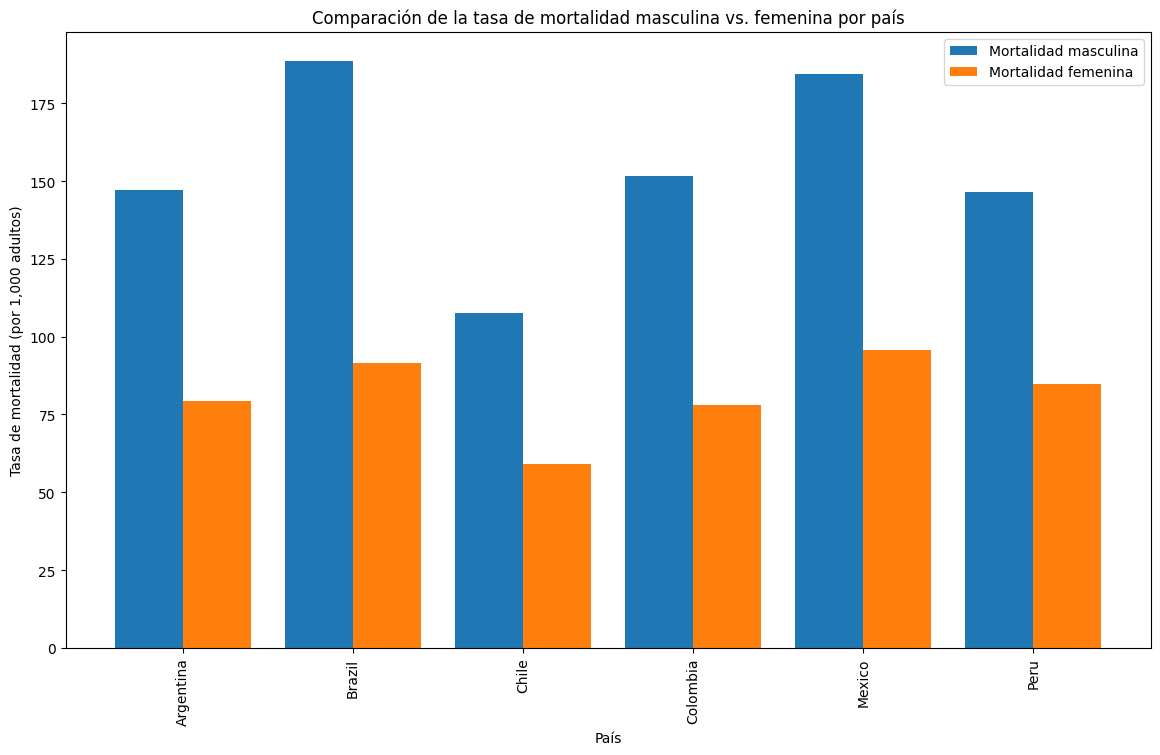

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Seleccionar las columnas relevantes
mortalidad_data = df_data_filtrada1[['country_name', 'adult_male_mortality_rate', 'adult_female_mortality_rate']]

# Agrupar por país y calcular la media de las tasas de mortalidad masculina y femenina
mortalidad_promedio = mortalidad_data.groupby('country_name').mean().reset_index()

# Configuración para gráfico de barras agrupadas
bar_width = 0.4
x = np.arange(len(mortalidad_promedio['country_name']))

fig, ax = plt.subplots(figsize=(14, 8))

# Barras para la mortalidad masculina
ax.bar(x - bar_width/2, mortalidad_promedio['adult_male_mortality_rate'], width=bar_width, label='Mortalidad masculina')

# Barras para la mortalidad femenina
ax.bar(x + bar_width/2, mortalidad_promedio['adult_female_mortality_rate'], width=bar_width, label='Mortalidad femenina')

# Añadir etiquetas y título
ax.set_xlabel('País')
ax.set_ylabel('Tasa de mortalidad (por 1,000 adultos)')
ax.set_title('Comparación de la tasa de mortalidad masculina vs. femenina por país')
ax.set_xticks(x)
ax.set_xticklabels(mortalidad_promedio['country_name'], rotation=90)
ax.legend()

# Mostrar el gráfico
plt.show()


A simple vista podemos observar una gran diferencia entre la tasa de mortalidad masculina y femenina. Por ejemplo en Mexico cada 1000 personas fallecen aproximadamente 100 mujeres y mas de 175 hombres. Como observamos en el dashboard la poblacion masculina y femenina es casi igual en todos los paises por lo tanto que fallezcan dos hombres y una sola mujer cada 1000 es para prestar atencion. 

#### Avance 3


Importamos lo necesario para los graficos y creamos 3 nuevas columnas para complementar y facilitar el analisis de tiempo.

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

# Asegurándonos de que el índice es de tipo datetime
df_data_filtrada1.index = pd.to_datetime(df_data_filtrada1.index)

# Añadir columnas de semana y año
df_data_filtrada1['week'] = df_data_filtrada1.index.isocalendar().week
df_data_filtrada1['month'] = df_data_filtrada1.index.month
df_data_filtrada1['year'] = df_data_filtrada1.index.isocalendar().year


##### Evolucion casos activos vs recuperados

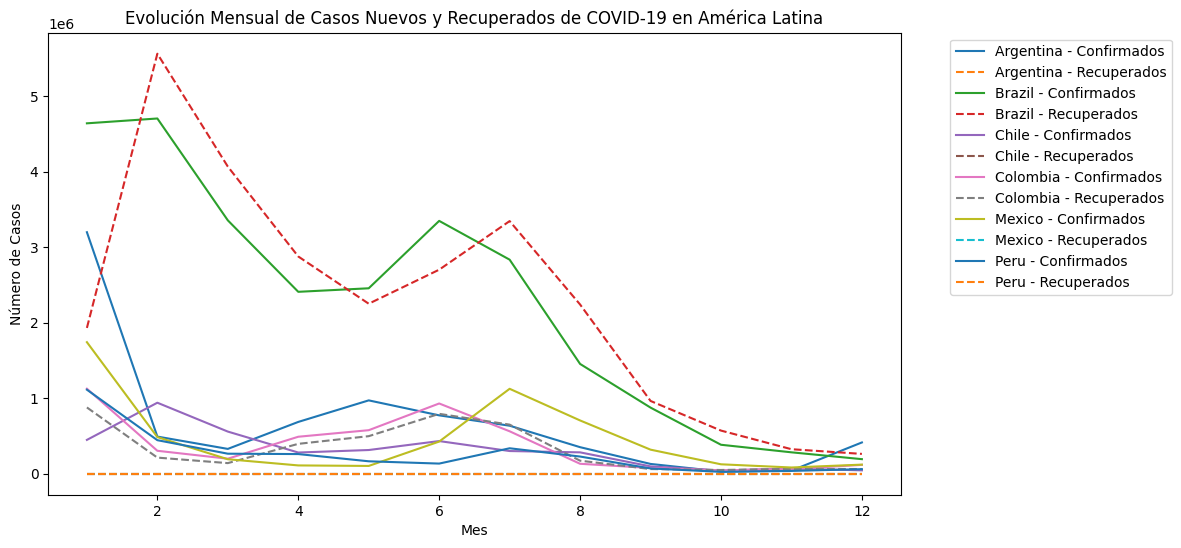

In [41]:
# Aseguramos que las columnas necesarias existan y no tengan valores faltantes
required_columns = ['new_confirmed', 'new_recovered', 'month', 'country_name']
for col in required_columns:
    if col not in df_data_filtrada1.columns:
        raise KeyError(f"Missing required column: {col}")

df_data_filtrada1[required_columns] = df_data_filtrada1[required_columns].fillna(0)

# Agrupar por país y mes, y sumar los casos nuevos y recuperados
monthly_data = df_data_filtrada1.groupby(['country_name', 'month'])[['new_confirmed', 'new_recovered']].sum().reset_index()

plt.figure(figsize=(11, 6))
for country in monthly_data['country_name'].unique():
    country_monthly_data = monthly_data[monthly_data['country_name'] == country]
    plt.plot(country_monthly_data['month'], country_monthly_data['new_confirmed'], label=f'{country} - Confirmados')
    plt.plot(country_monthly_data['month'], country_monthly_data['new_recovered'], label=f'{country} - Recuperados', linestyle='--')

plt.xlabel('Mes')
plt.ylabel('Número de Casos')
plt.title('Evolución Mensual de Casos Nuevos y Recuperados de COVID-19 en América Latina')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


La mayoría de los países muestran una tendencia a la baja en los casos nuevos confirmados y recuperados a medida que avanza el año.
Las líneas punteadas (recuperados) tienden a seguir de cerca las líneas sólidas (confirmados), lo que indica que los casos confirmados eventualmente se traducen en recuperaciones en la mayoría de los países.
Brasil muestra un pico muy pronunciado en los casos nuevos confirmados y recuperados al inicio del período (mes 1), con una disminución gradual posterior. La línea de casos recuperados (rojo punteado) se mantiene consistentemente alta en comparación con otros países.
Argentina también muestra un pico inicial en casos confirmados (línea azul sólida) y un pico menor en casos recuperados (línea amarilla punteada).
México y Colombia tienen fluctuaciones en los casos confirmados y recuperados a lo largo del período, con varios picos menores.
Perú y Chile muestran tendencias más estables y menos pronunciadas en comparación con Brasil y Argentina.


##### Relación entre la Cobertura de Vacunación y la Reducción de Casos

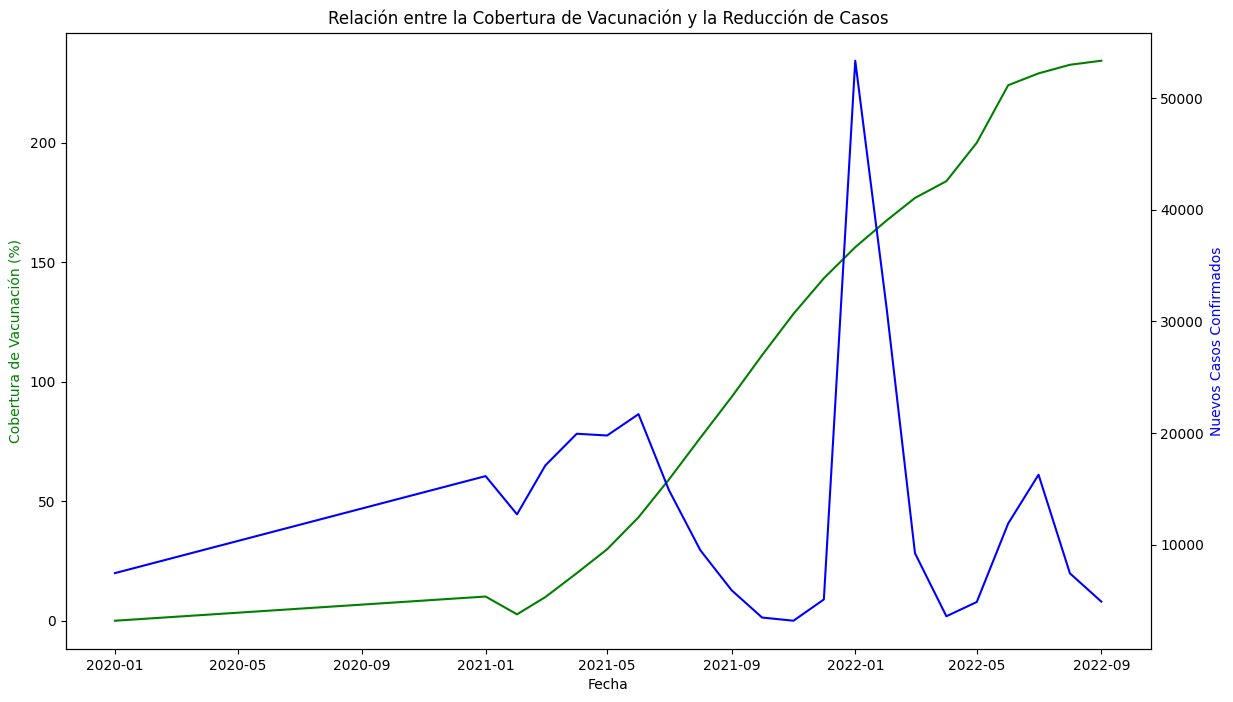

In [42]:
# Calculo de la cobertura de vacunación
df_data_filtrada1['vaccination_coverage'] = df_data_filtrada1['cumulative_vaccine_doses_administered'] / df_data_filtrada1['population'] * 100

# Agrupo por mes y año para obtener los datos mensuales
vaccination_vs_cases = df_data_filtrada1.groupby(['year', 'month'])[['vaccination_coverage', 'new_confirmed']].mean().reset_index()

# Convertir year y month a fecha para mejor manejo en la gráfica
vaccination_vs_cases['date'] = pd.to_datetime(vaccination_vs_cases[['year', 'month']].assign(day=1))

# Graficar la relación entre la cobertura de vacunación y la reducción de casos
fig, ax1 = plt.subplots(figsize=(14, 8))

ax2 = ax1.twinx()
ax1.plot(vaccination_vs_cases['date'], vaccination_vs_cases['vaccination_coverage'], 'g-')
ax2.plot(vaccination_vs_cases['date'], vaccination_vs_cases['new_confirmed'], 'b-')

ax1.set_xlabel('Fecha')
ax1.set_ylabel('Cobertura de Vacunación (%)', color='g')
ax2.set_ylabel('Nuevos Casos Confirmados', color='b')

plt.title('Relación entre la Cobertura de Vacunación y la Reducción de Casos')
plt.show()


Cobertura de Vacunación (verde): La línea verde muestra un incremento constante en la cobertura de vacunación a lo largo del tiempo, especialmente a partir de mediados de 2021.
Nuevos Casos Confirmados (azul): La línea azul muestra varios picos en los nuevos casos confirmados, con un pico significativo a principios de 2022 (este puede deberse a las fiesta de fin de ano).
Inicialmente, cuando la cobertura de vacunación era baja, los nuevos casos confirmados mostraban una tendencia al alza.
A medida que la cobertura de vacunación aumentaba, se observó una reducción en los nuevos casos confirmados, especialmente después del pico a principios de 2022.
La relación inversa entre el aumento de la cobertura de vacunación y la disminución de los nuevos casos confirmados refuerza la importancia de las campañas de vacunación en el control de la pandemia.

##### Progreso de vacunacion por pais.

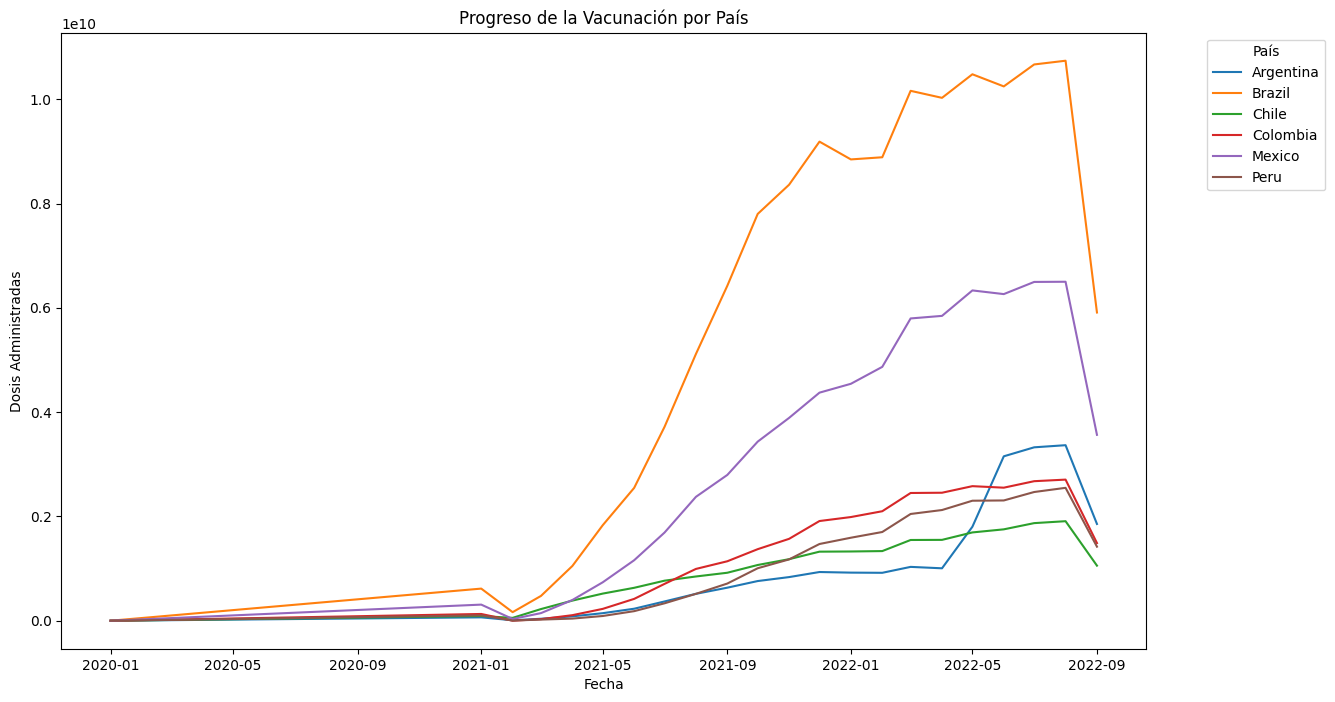

In [43]:
# Agrupamos por país y mes, y sumamamos las dosis administradas
vaccination_progress = df_data_filtrada1.groupby(['country_name', 'year', 'month'])['cumulative_vaccine_doses_administered'].sum().reset_index()

# Convertimos year y month a fecha para mejor manejo en la gráfica
vaccination_progress['date'] = pd.to_datetime(vaccination_progress[['year', 'month']].assign(day=1))

plt.figure(figsize=(14, 8))
for country in vaccination_progress['country_name'].unique():
    country_data = vaccination_progress[vaccination_progress['country_name'] == country]
    plt.plot(country_data['date'], country_data['cumulative_vaccine_doses_administered'], label=country)

plt.xlabel('Fecha')
plt.ylabel('Dosis Administradas')
plt.title('Progreso de la Vacunación por País')
plt.legend(title='País', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


Brasil (línea naranja) muestra un incremento significativo en el número de dosis administradas, alcanzando más de 1.0e10 (10 mil millones) dosis administradas.
México (línea morada) también muestra un progreso notable en la vacunación, aunque con un aumento menos pronunciado que Brasil.
Colombia (línea roja), Argentina (línea azul), Chile (línea verde) y Perú (línea marrón) muestran incrementos más graduales en la vacunación a lo largo del tiempo.
La mayoría de los países comienzan a mostrar un aumento significativo en las dosis administradas alrededor de principios de 2021, coincidiendo con el inicio de las campañas de vacunación a nivel mundial.
El gráfico muestra un incremento continuo en el número de dosis administradas hasta mediados de 2022, después del cual algunas líneas (como la de Brasil) muestran una disminución, posiblemente debido a la estabilización de la vacunación o a la finalización de las campañas de vacunación masiva.

##### Evolucion en el tiempo de Nuevos casos y temperatura promedio

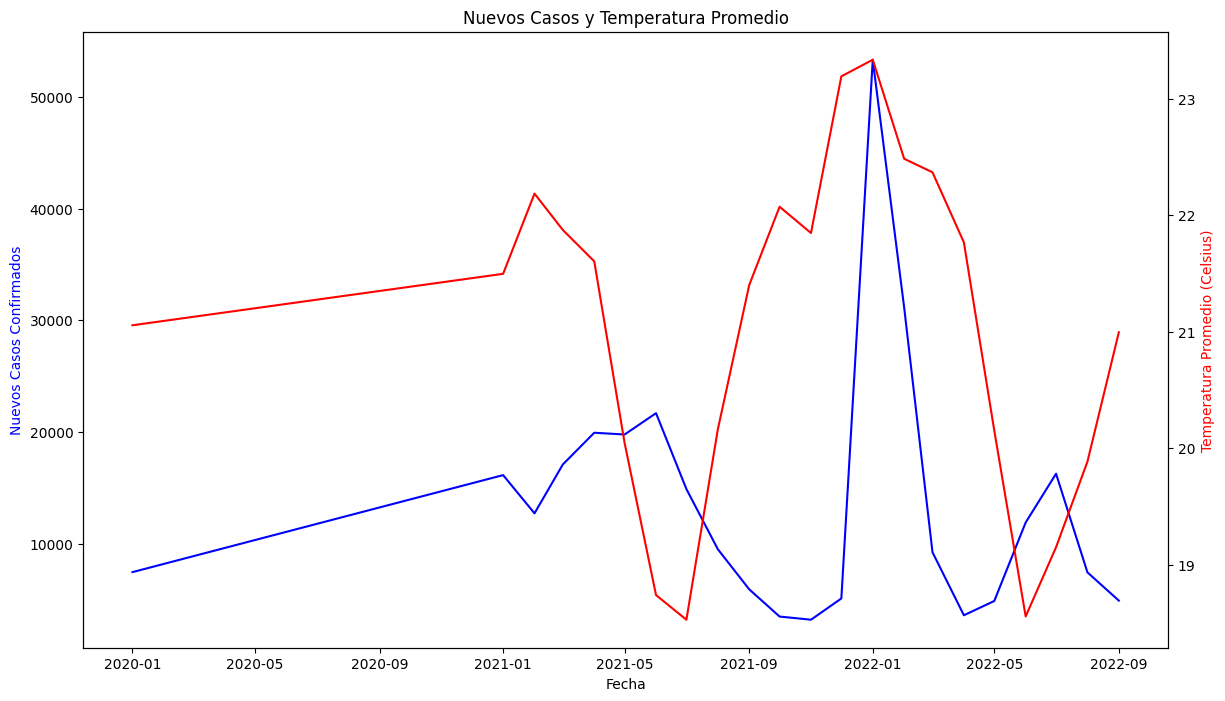

In [44]:
# Agrupamos por mes y año para obtener los datos mensuales
cases_vs_temperature = df_data_filtrada1.groupby(['year', 'month'])[['new_confirmed', 'average_temperature_celsius']].mean().reset_index()

# Convertimos year y month a fecha para mejor manejo en la gráfica
cases_vs_temperature['date'] = pd.to_datetime(cases_vs_temperature[['year', 'month']].assign(day=1))

# Graficamos la relación entre nuevos casos y temperatura promedio
fig, ax1 = plt.subplots(figsize=(14, 8))

ax2 = ax1.twinx()
ax1.plot(cases_vs_temperature['date'], cases_vs_temperature['new_confirmed'], 'b-')
ax2.plot(cases_vs_temperature['date'], cases_vs_temperature['average_temperature_celsius'], 'r-')

ax1.set_xlabel('Fecha')
ax1.set_ylabel('Nuevos Casos Confirmados', color='b')
ax2.set_ylabel('Temperatura Promedio (Celsius)', color='r')

plt.title('Nuevos Casos y Temperatura Promedio')
plt.show()


Al comparar las dos líneas, no parece haber una relación directa clara entre la temperatura promedio y el número de nuevos casos confirmados. Si podemos observar que a mediados del 2021 (invierno) si huboi un crecimiento de los casos al igual que el proximo invierno, pero tambien se obserma el gran crecimiento de casos en pleno veranos de 2022

##### Evolucion anual de casos nuevos|

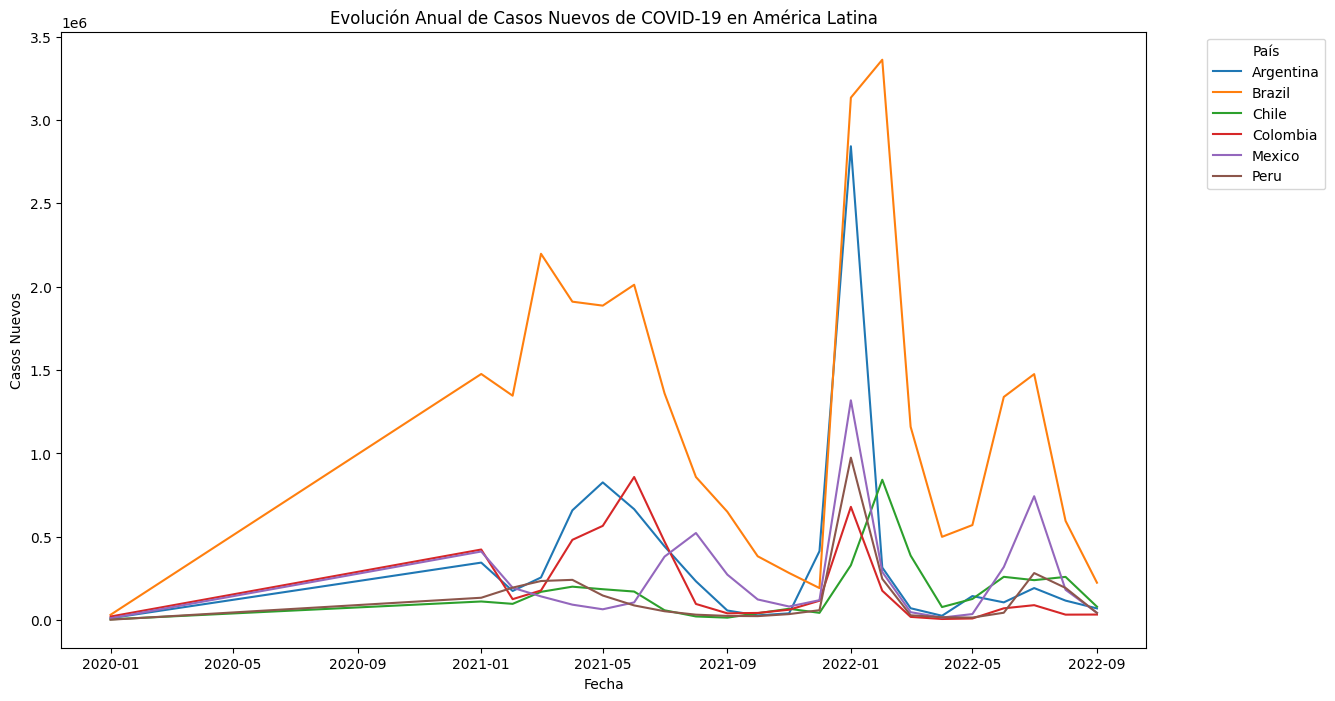

In [45]:
# Nos aseguramos que las columnas necesarias existan y no tengan valores faltantes
required_columns = ['new_confirmed', 'year', 'month', 'country_name']
for col in required_columns:
    if col not in df_data_filtrada1.columns:
        raise KeyError(f"Missing required column: {col}")

df_data_filtrada1[required_columns] = df_data_filtrada1[required_columns].fillna(0)

# Agrupamos por país y mes, y sumamos los casos nuevos
yearly_cases = df_data_filtrada1.groupby(['country_name', 'year', 'month'])[['new_confirmed']].sum().reset_index()

# Convertimos year y month a fecha para mejor manejo en la gráfica
yearly_cases['date'] = pd.to_datetime(yearly_cases[['year', 'month']].assign(day=1))

plt.figure(figsize=(14, 8))
for country in yearly_cases['country_name'].unique():
    country_data = yearly_cases[yearly_cases['country_name'] == country]
    plt.plot(country_data['date'], country_data['new_confirmed'], label=country)

plt.xlabel('Fecha')
plt.ylabel('Casos Nuevos')
plt.title('Evolución Anual de Casos Nuevos de COVID-19 en América Latina')
plt.legend(title='País', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


Se observa un patron similiar en todos los paises con grandes picos en Brasil y Argentina en el verano 2022. Brasil se separa del resto debido al tamano de su poblacion pero el compartamiento es parecido al del resto de los paises

##### Distribucion de la Poblacion por Edad en paises

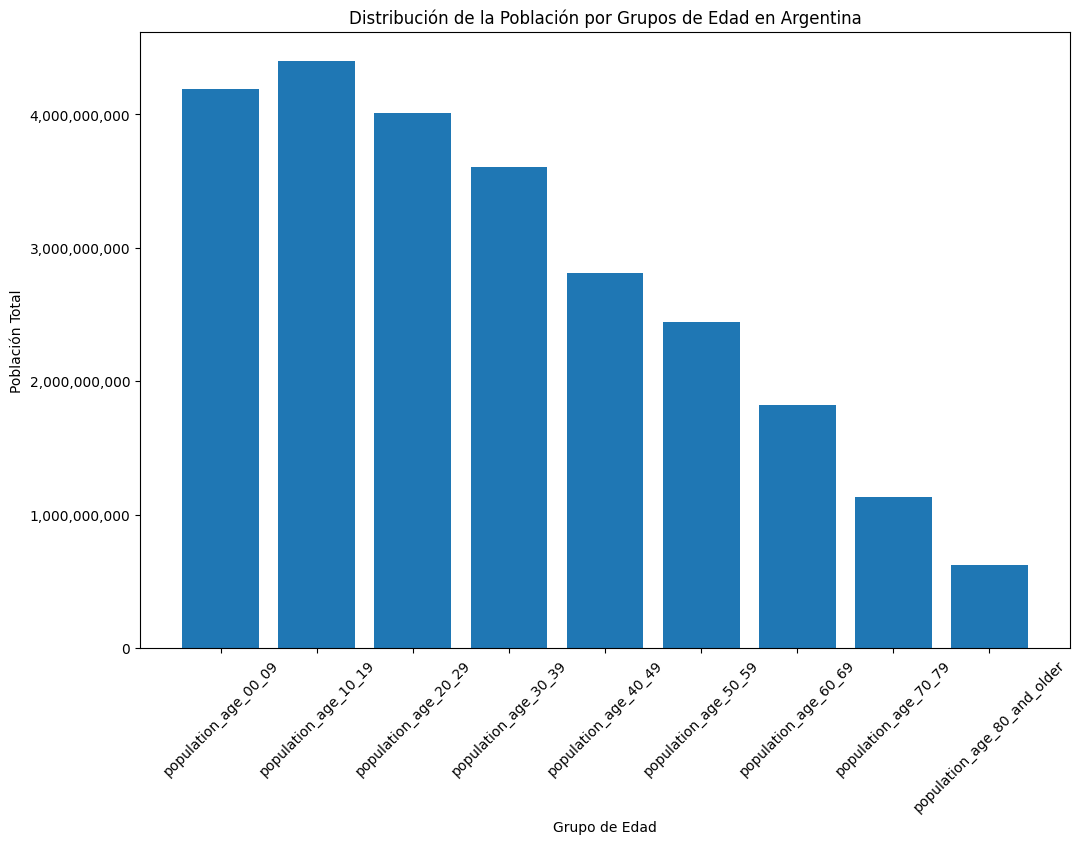

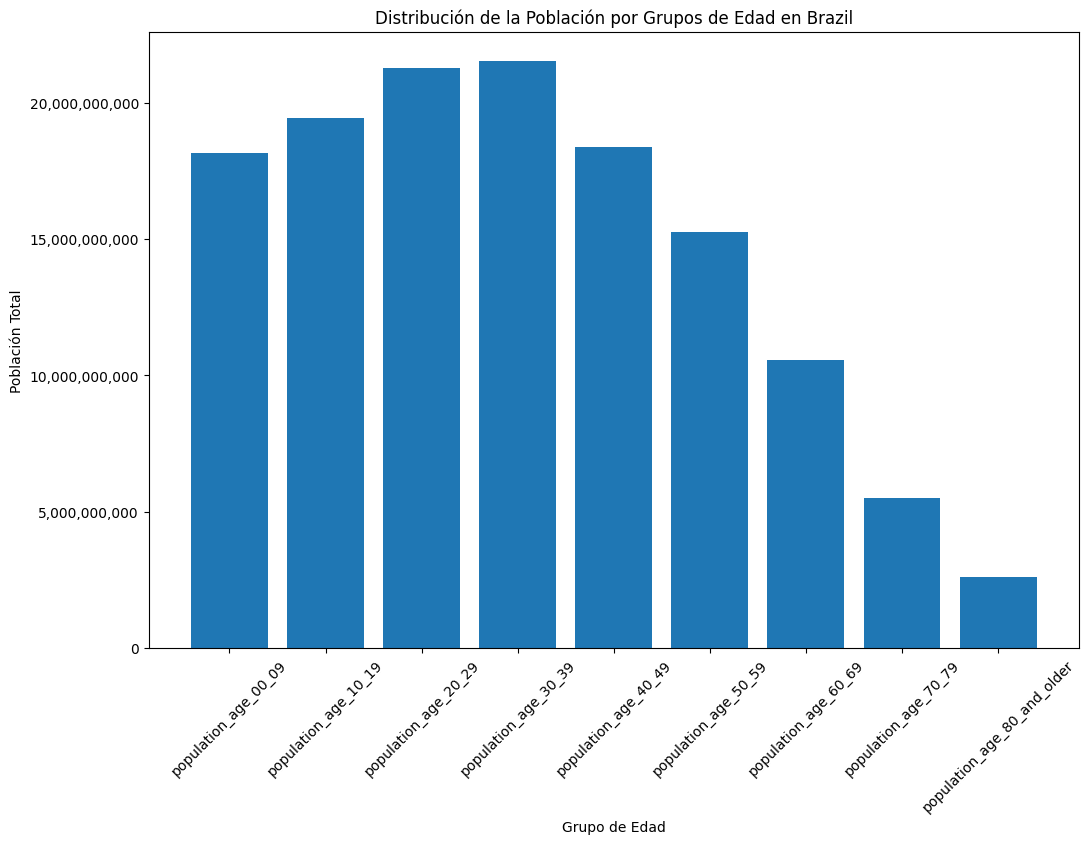

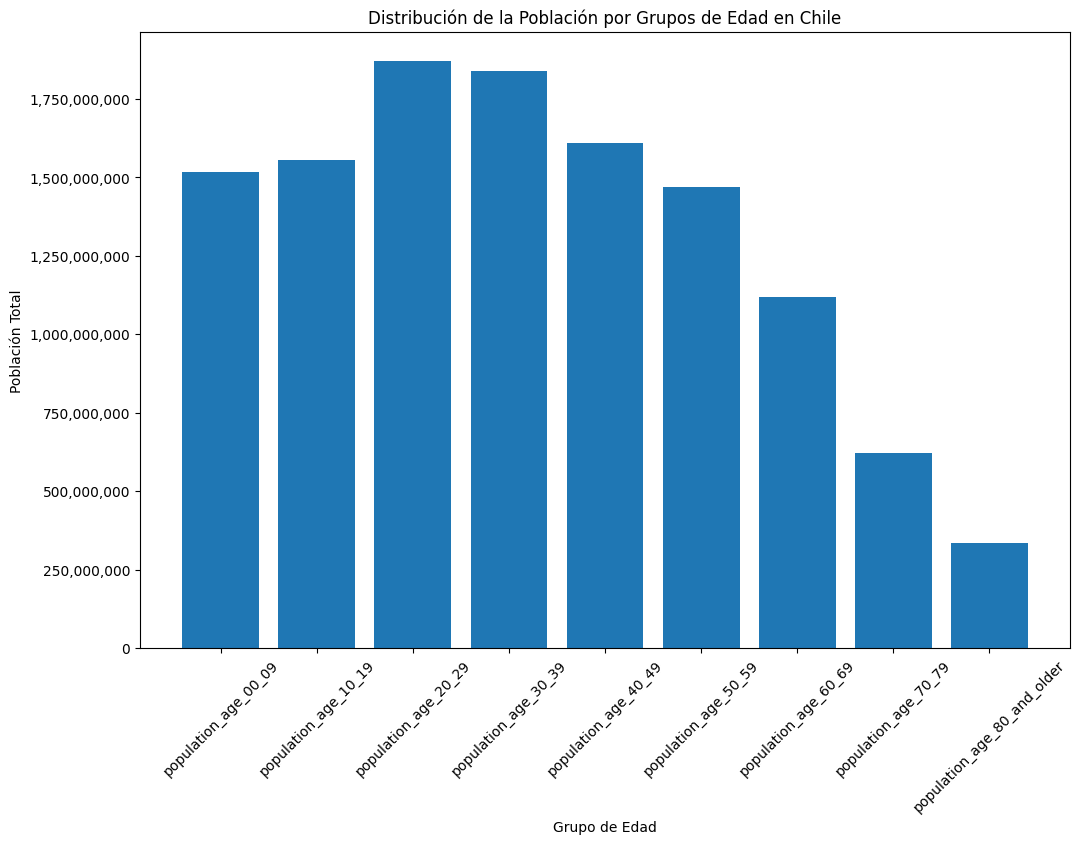

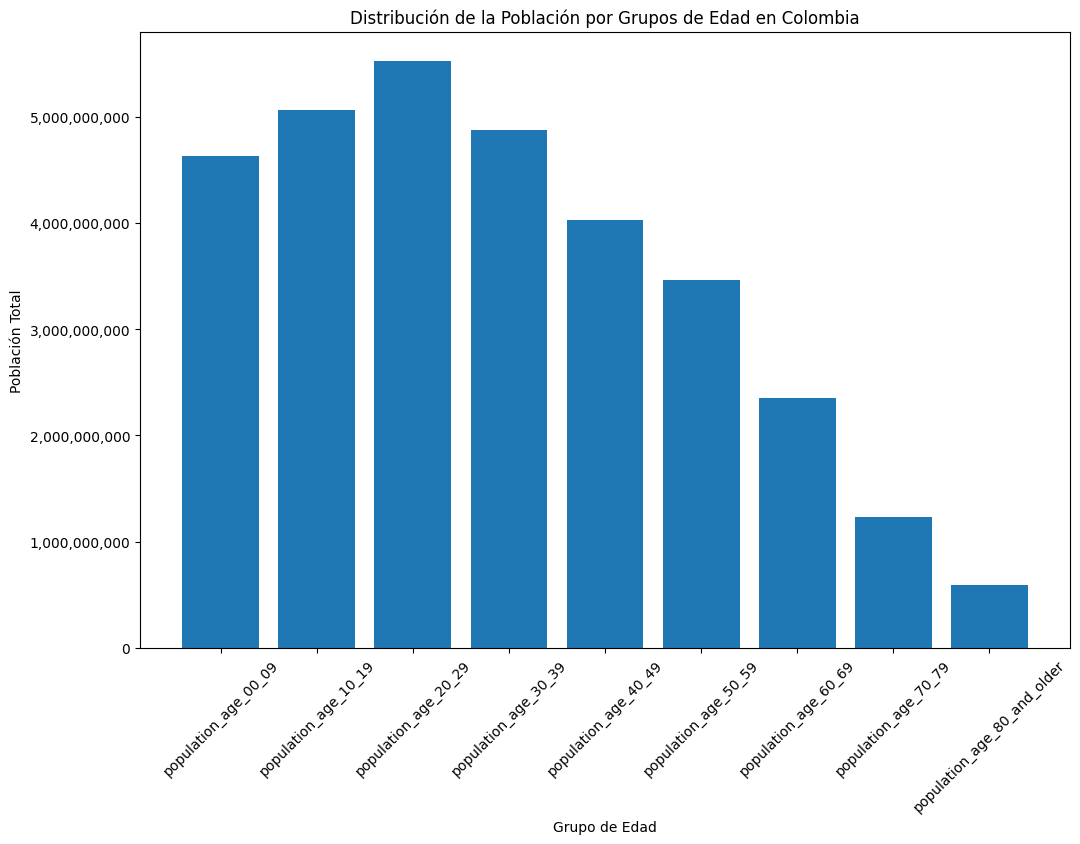

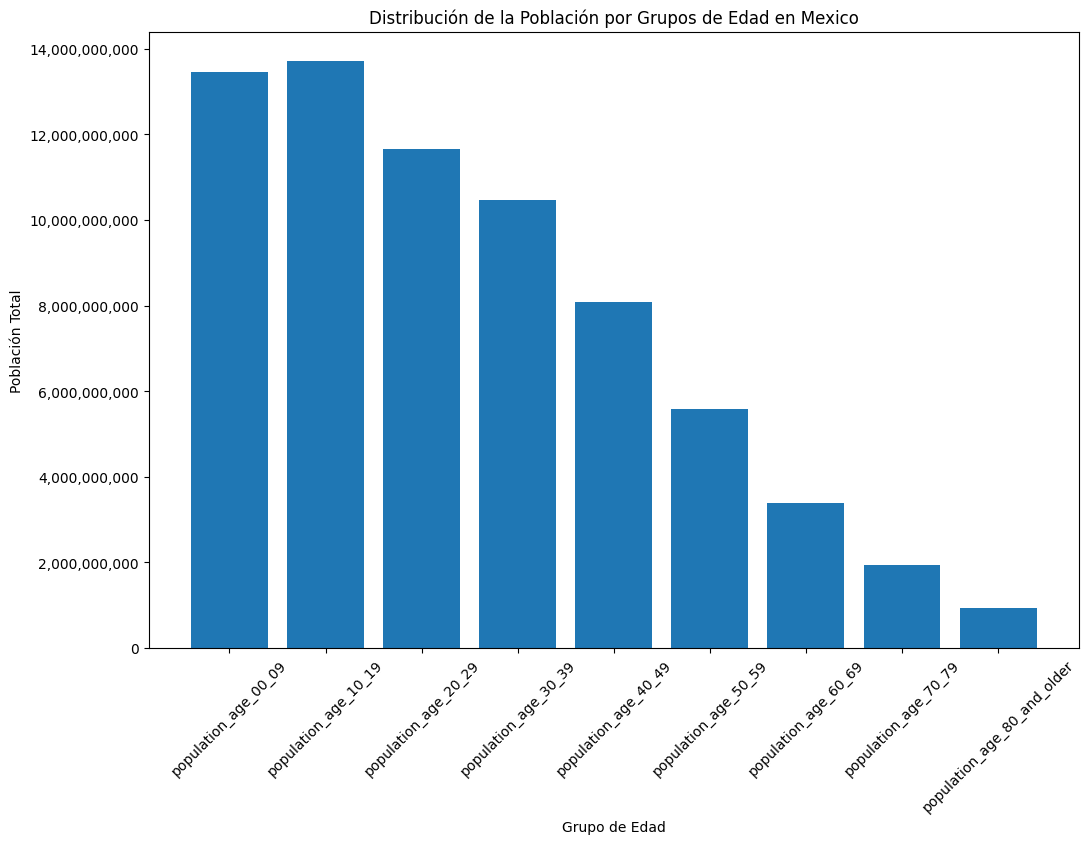

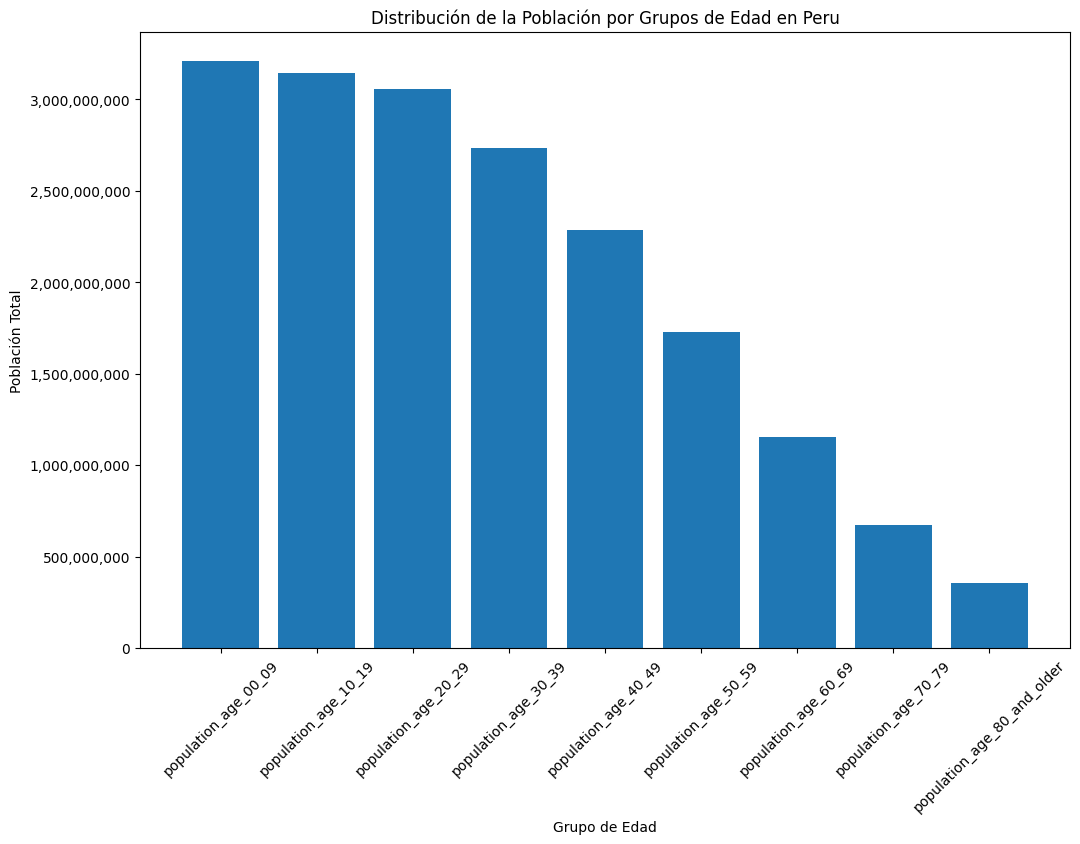

In [46]:
# Definimos los grupos de edad
age_groups = ['population_age_00_09', 'population_age_10_19', 'population_age_20_29', 'population_age_30_39',
              'population_age_40_49', 'population_age_50_59', 'population_age_60_69', 'population_age_70_79',
              'population_age_80_and_older']

# Verificamos que las columnas necesarias existan y no tengan valores faltantes
required_columns = ['country_name'] + age_groups
for col in required_columns:
    if col not in df_data_filtrada1.columns:
        raise KeyError(f"Missing required column: {col}")

df_data_filtrada1[required_columns] = df_data_filtrada1[required_columns].fillna(0)

# Agrupamos los datos por país y sumar la población de cada grupo de edad
df_age_distribution = df_data_filtrada1.groupby('country_name')[age_groups].sum().reset_index()

# Creamos un gráfico de barras para cada país
for country in df_age_distribution['country_name'].unique():
    country_data = df_age_distribution[df_age_distribution['country_name'] == country]
    
    fig, ax = plt.subplots(figsize=(12, 8))
    country_data_melted = country_data.melt(id_vars='country_name', value_vars=age_groups, 
                                            var_name='age_group', value_name='population')
    
    ax.bar(country_data_melted['age_group'], country_data_melted['population'])
    ax.set_title(f'Distribución de la Población por Grupos de Edad en {country}')
    ax.set_xlabel('Grupo de Edad')
    ax.set_ylabel('Población Total')
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: format(int(x), ',')))
    plt.xticks(rotation=45)
    plt.show()





observamos una gran cantidad de ninos en Mexico y en Peru, en los demas paises hay mayor cantidad de jovenes adultos y adolescentes. 

##### Variación mensual de casos y muertes por país

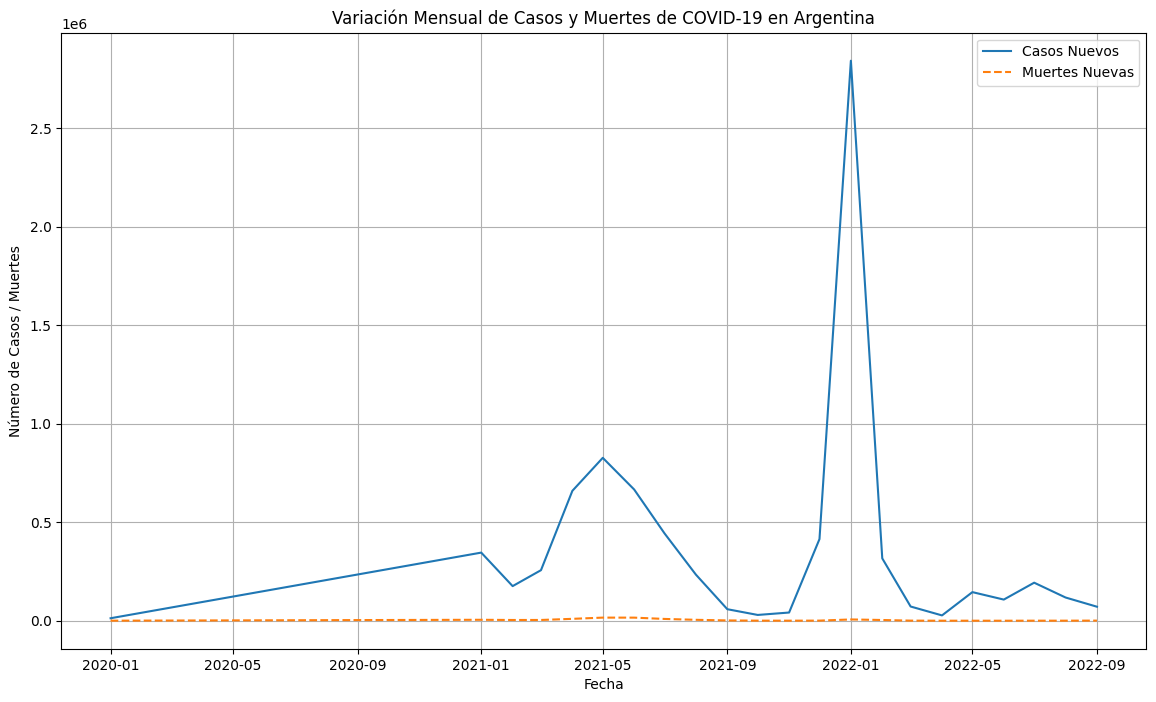

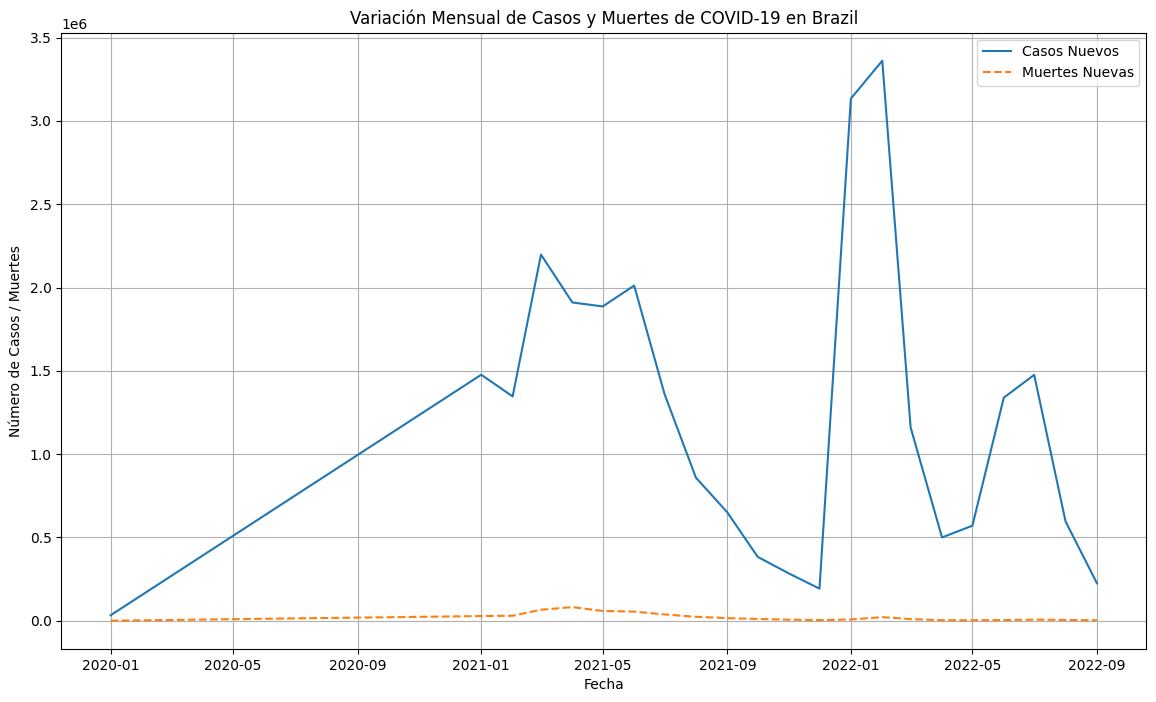

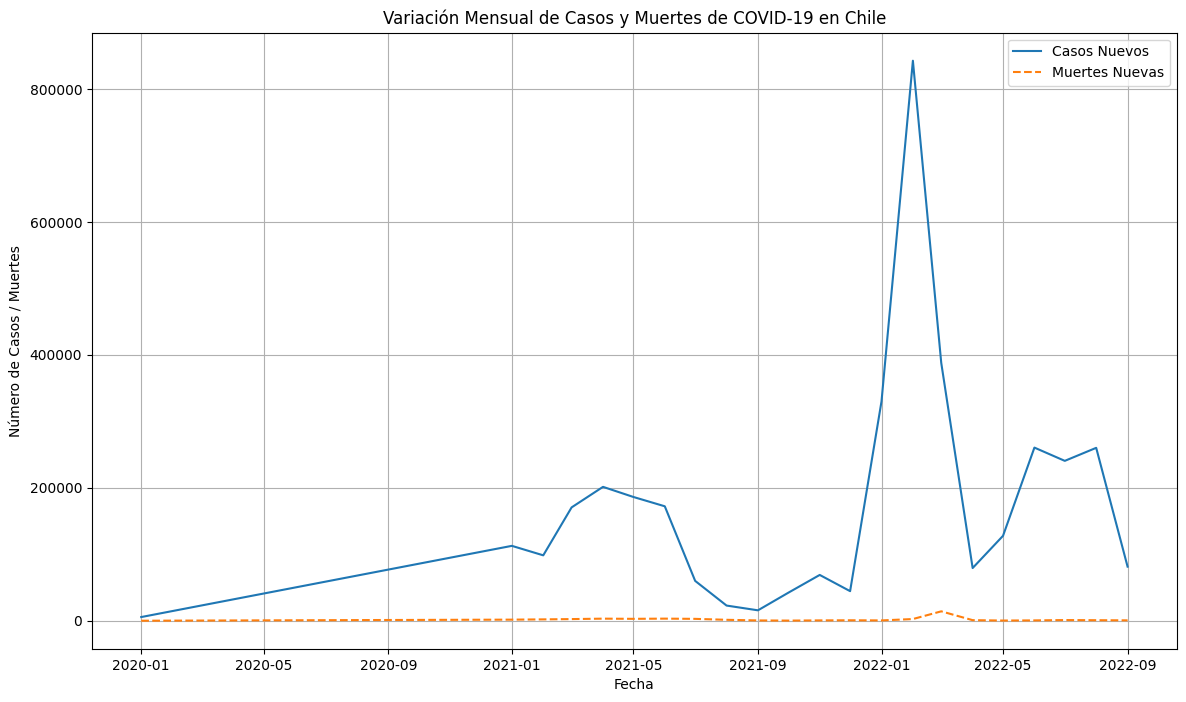

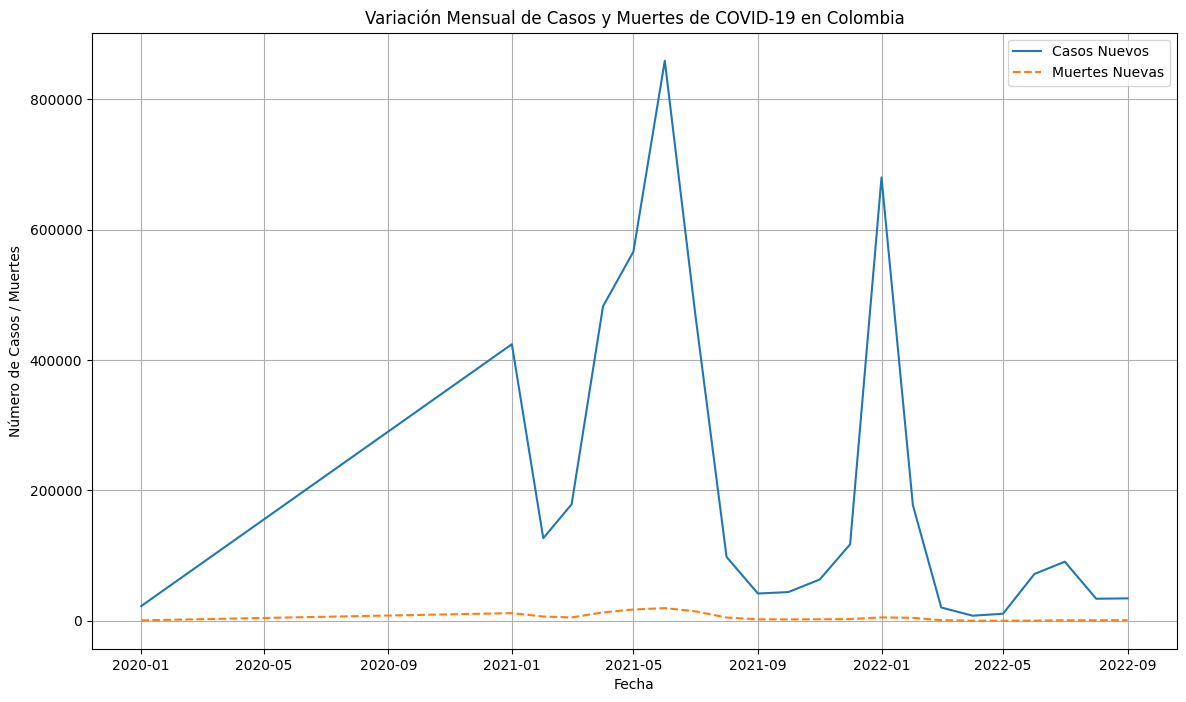

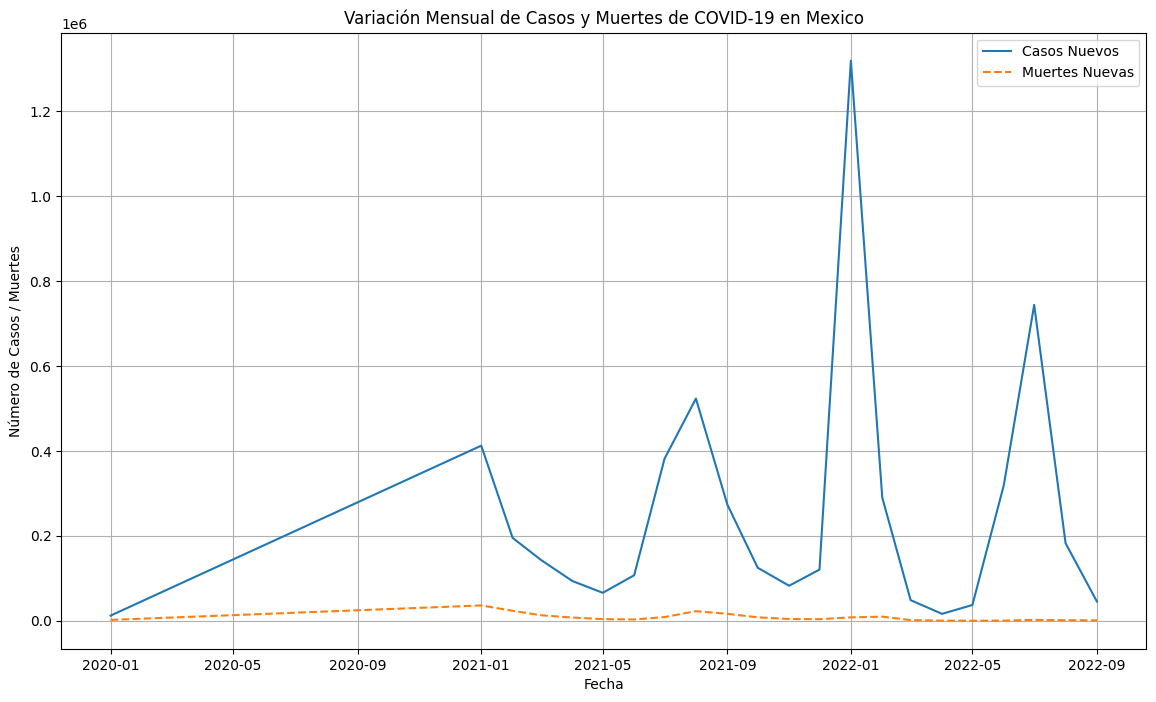

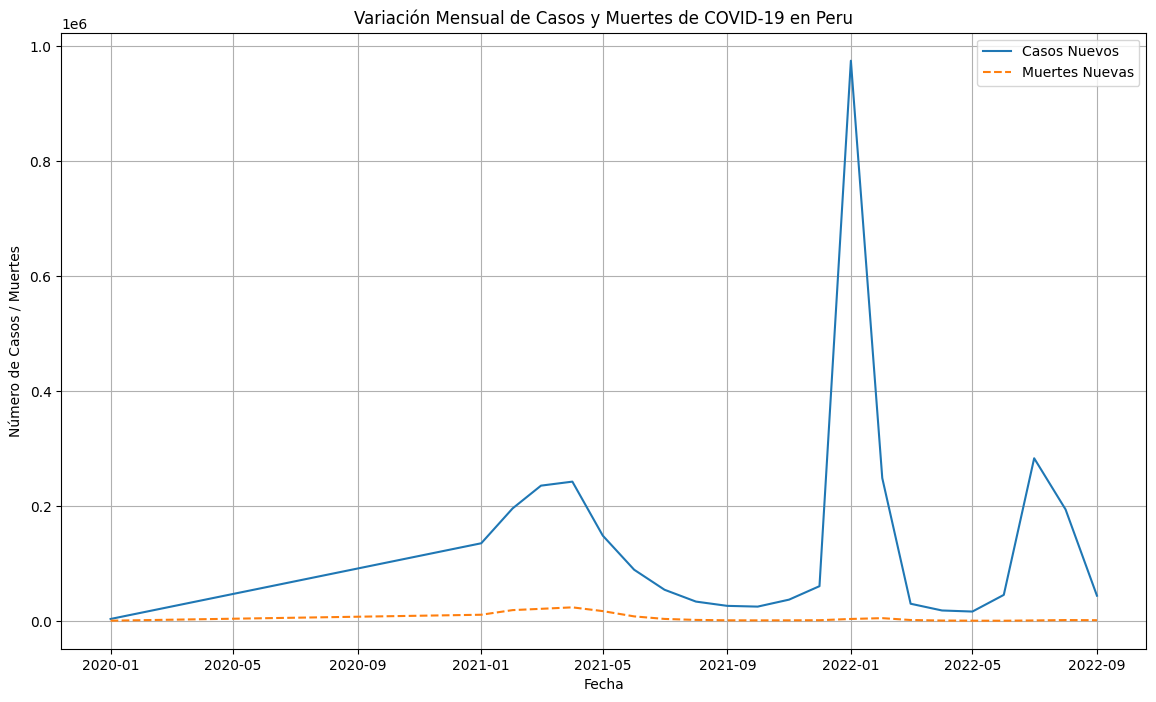

In [47]:
# Nos aseguramos que las columnas necesarias existan y no tengan valores faltantes
required_columns = ['new_confirmed', 'new_deceased', 'year', 'month', 'country_name']
for col in required_columns:
    if col not in df_data_filtrada1.columns:
        raise KeyError(f"Missing required column: {col}")

df_data_filtrada1[required_columns] = df_data_filtrada1[required_columns].fillna(0)

# Agrupamos por país, año y mes, y sumamos los casos nuevos y las muertes nuevas
monthly_variation = df_data_filtrada1.groupby(['country_name', 'year', 'month'])[['new_confirmed', 'new_deceased']].sum().reset_index()

# Convertimos year y month a fecha para mejor manejo en la gráfica
monthly_variation['date'] = pd.to_datetime(monthly_variation[['year', 'month']].assign(day=1))

# Creamos un gráfico separado para cada país
countries = monthly_variation['country_name'].unique()
for country in countries:
    country_data = monthly_variation[monthly_variation['country_name'] == country]
    
    plt.figure(figsize=(14, 8))
    plt.plot(country_data['date'], country_data['new_confirmed'], label='Casos Nuevos')
    plt.plot(country_data['date'], country_data['new_deceased'], label='Muertes Nuevas', linestyle='--')
    
    plt.xlabel('Fecha')
    plt.ylabel('Número de Casos / Muertes')
    plt.title(f'Variación Mensual de Casos y Muertes de COVID-19 en {country}')
    plt.legend()
    plt.grid(True)
    plt.show()


Vemos como pese al aumento de los casos de covid (picos) las muertes se mantienen bastante, o suben muy poco en relacion a la cantidad de casos.

##### Analisis temporal de descesos 

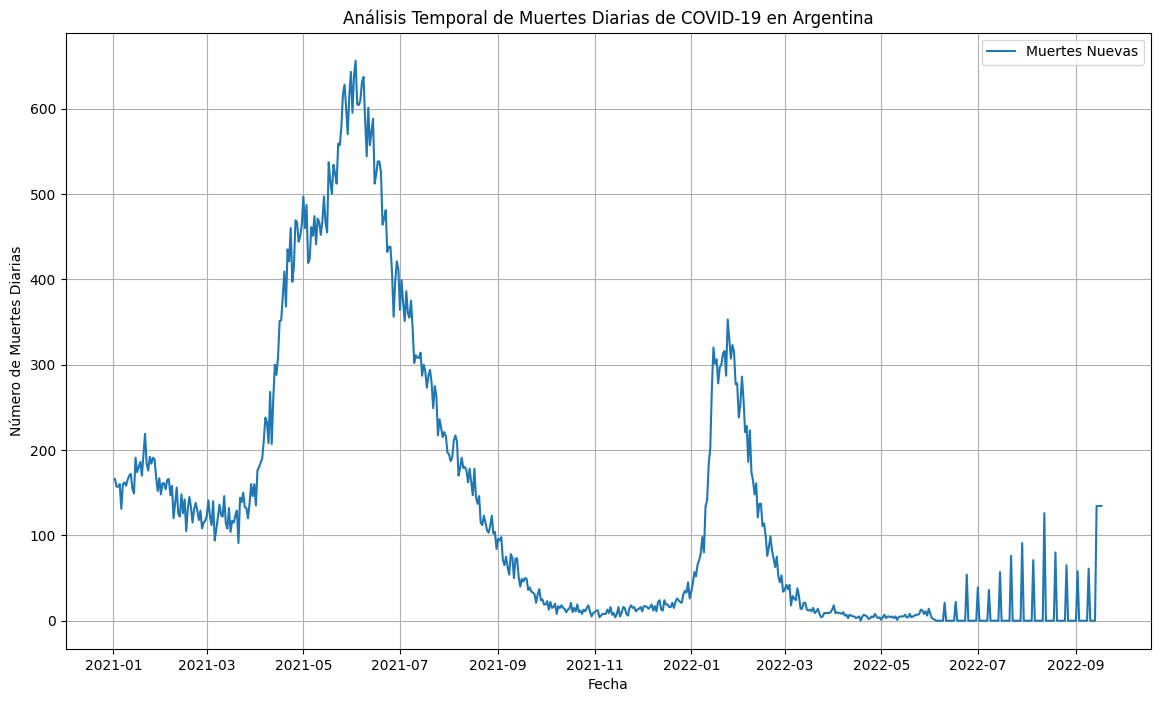

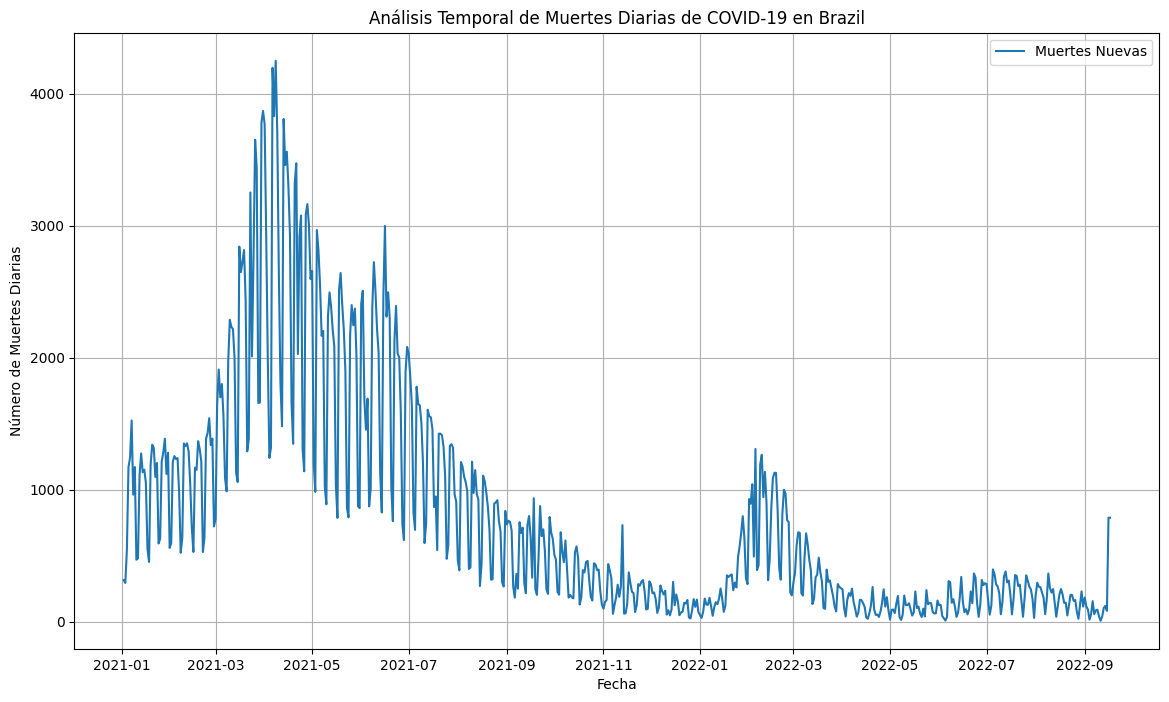

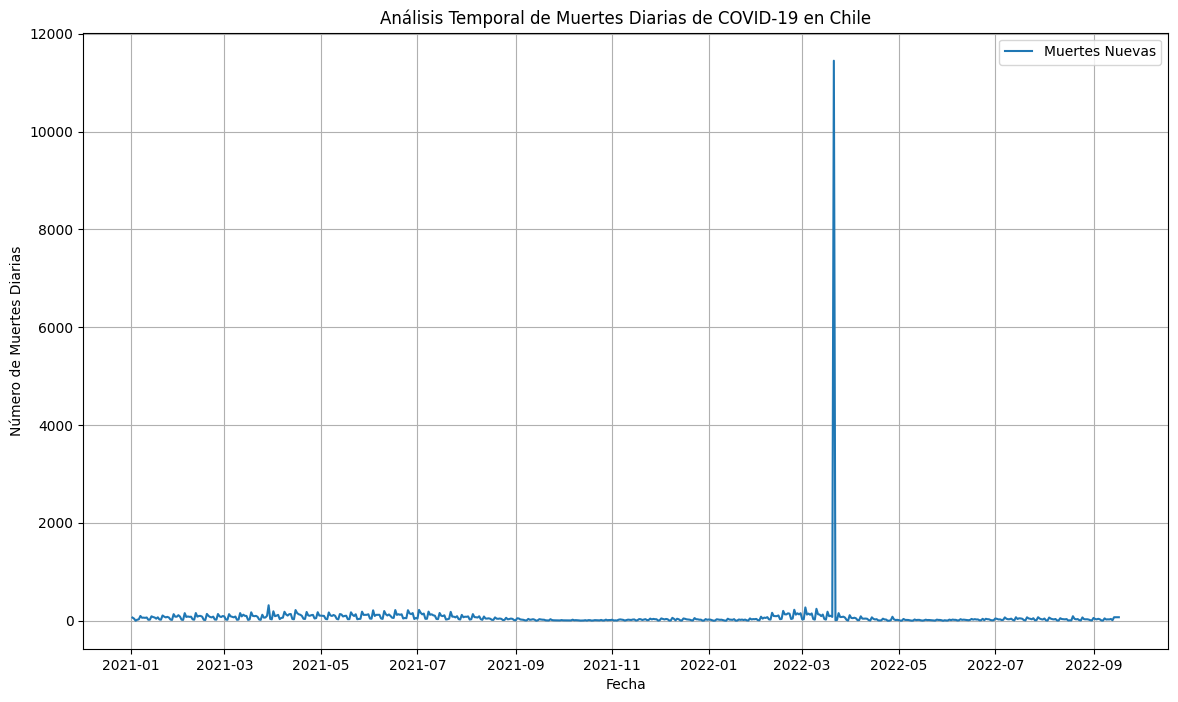

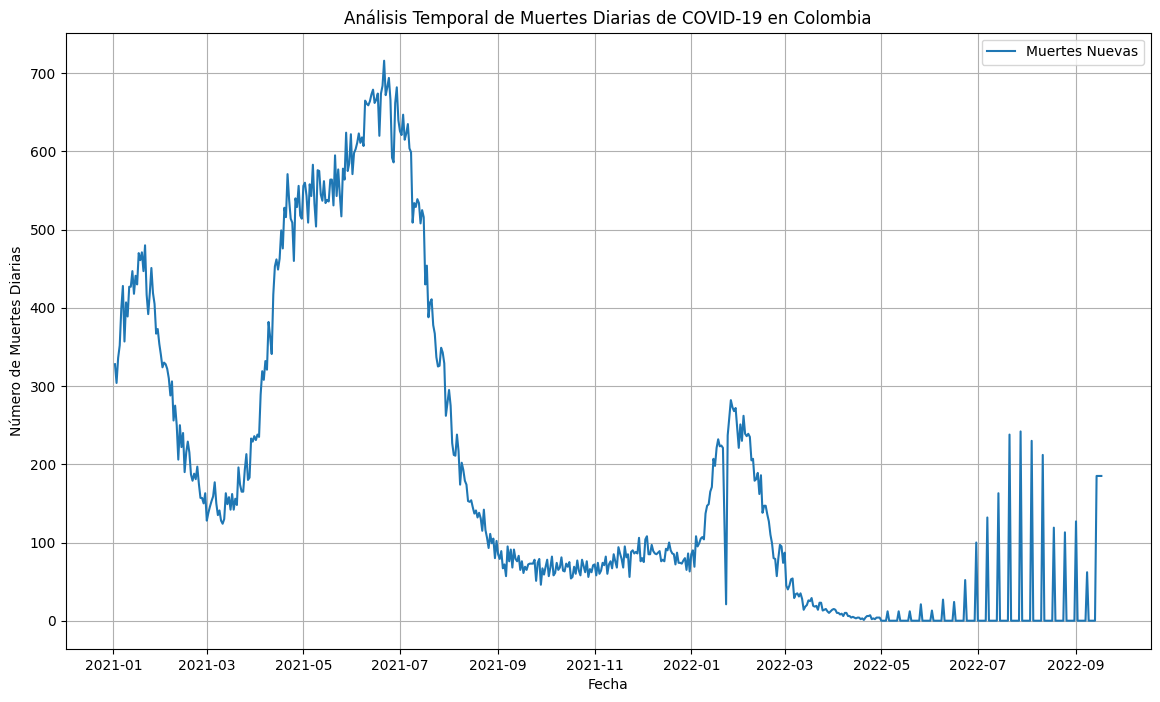

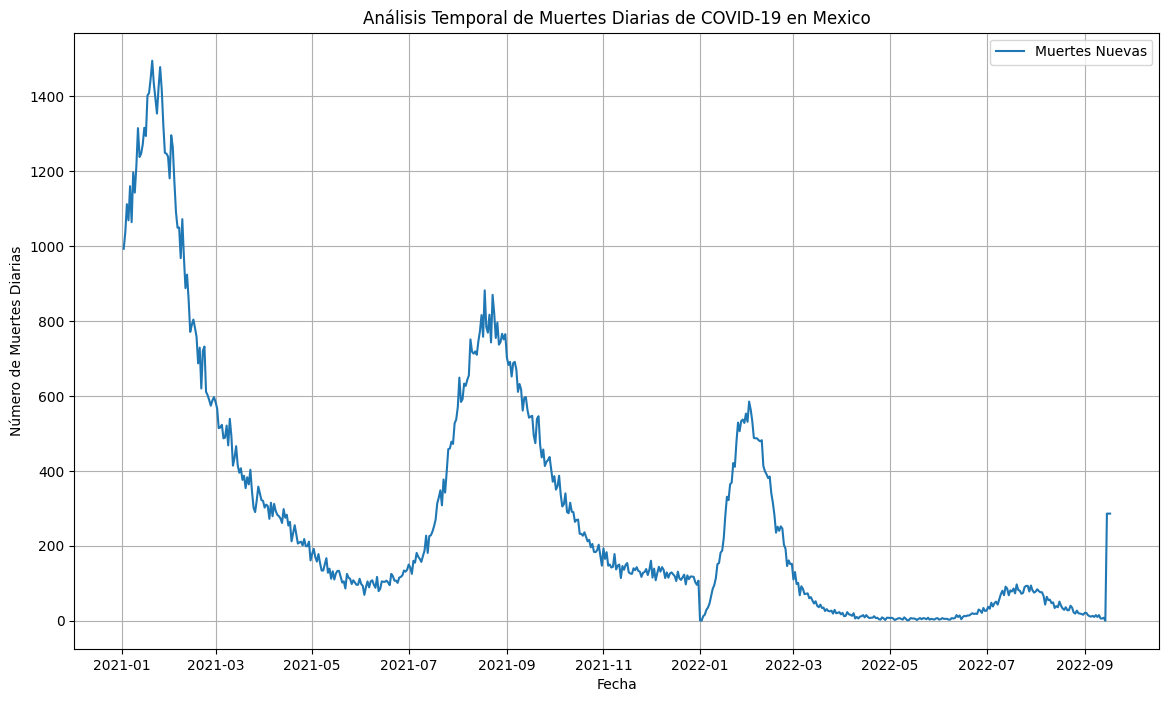

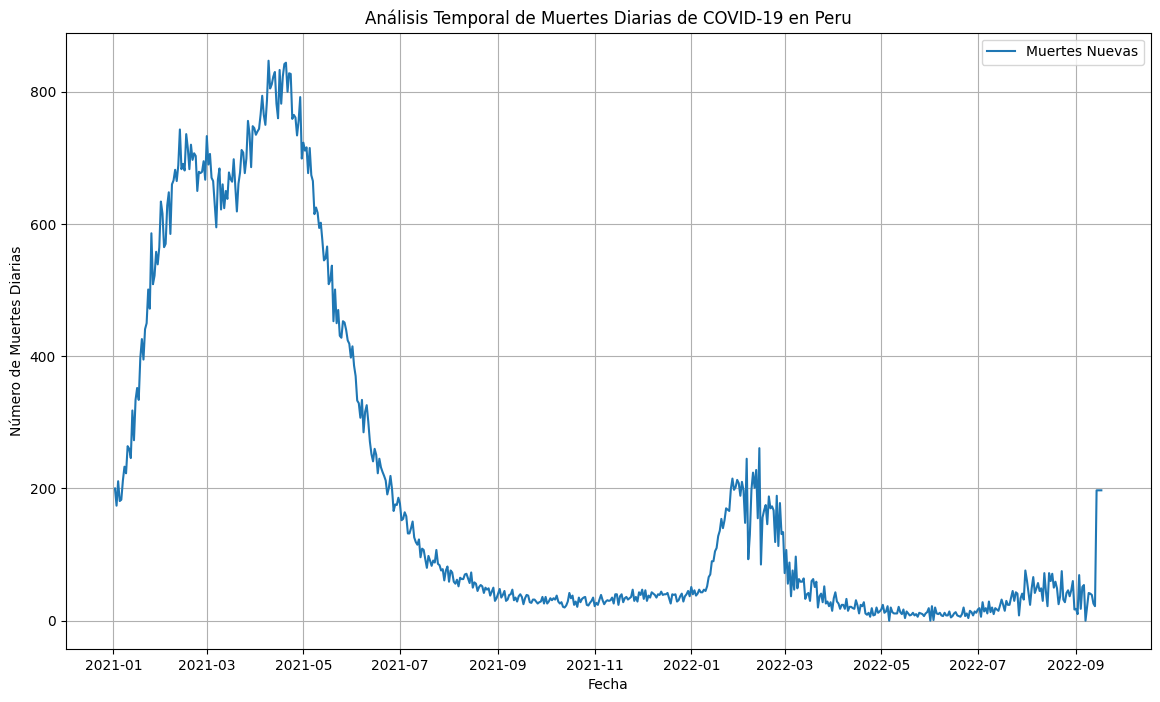

In [48]:
# Nos aseguramos que las columnas necesarias existan y no tengan valores faltantes
required_columns = ['new_deceased', 'country_name']
for col in required_columns:
    if col not in df_data_filtrada1.columns:
        raise KeyError(f"Missing required column: {col}")

# Chequeamos que el índice esté en formato datetime
df_data_filtrada1.index = pd.to_datetime(df_data_filtrada1.index)

# Restablecemos el índice para incluir la columna de fecha en el DataFrame
df_data_filtrada1.reset_index(inplace=True)
df_data_filtrada1.rename(columns={'index': 'date'}, inplace=True)

# Agrupamos por país y fecha, y sumamos las nuevas muertes
daily_deaths = df_data_filtrada1.groupby(['country_name', 'date'])[['new_deceased']].sum().reset_index()

# Creamos un gráfico separado para cada país
countries = daily_deaths['country_name'].unique()
for country in countries:
    country_data = daily_deaths[daily_deaths['country_name'] == country]
    
    plt.figure(figsize=(14, 8))
    plt.plot(country_data['date'], country_data['new_deceased'], label='Muertes Nuevas')
    
    plt.xlabel('Fecha')
    plt.ylabel('Número de Muertes Diarias')
    plt.title(f'Análisis Temporal de Muertes Diarias de COVID-19 en {country}')
    plt.legend()
    plt.grid(True)
    plt.show()


##### Distribucion de dosis acumuladas por pais

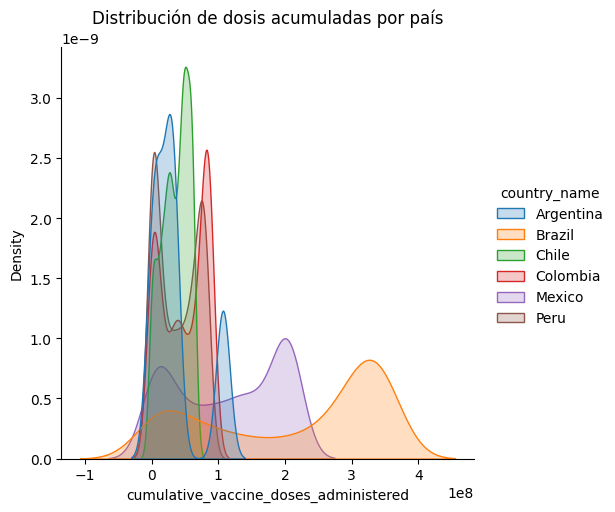

In [49]:
sns.displot(df_data_filtrada1, x="cumulative_vaccine_doses_administered", hue="country_name", kind="kde", fill=True)
plt.title('Distribución de dosis acumuladas por país')
plt.show()


Se observa que Brasil aplico mas de 3 dosis, Mexico llego a 2 y el resto por lo general fue 1 sola. 

##### Prevalencia de condiciones preexistentres vs categoria de mortalidad

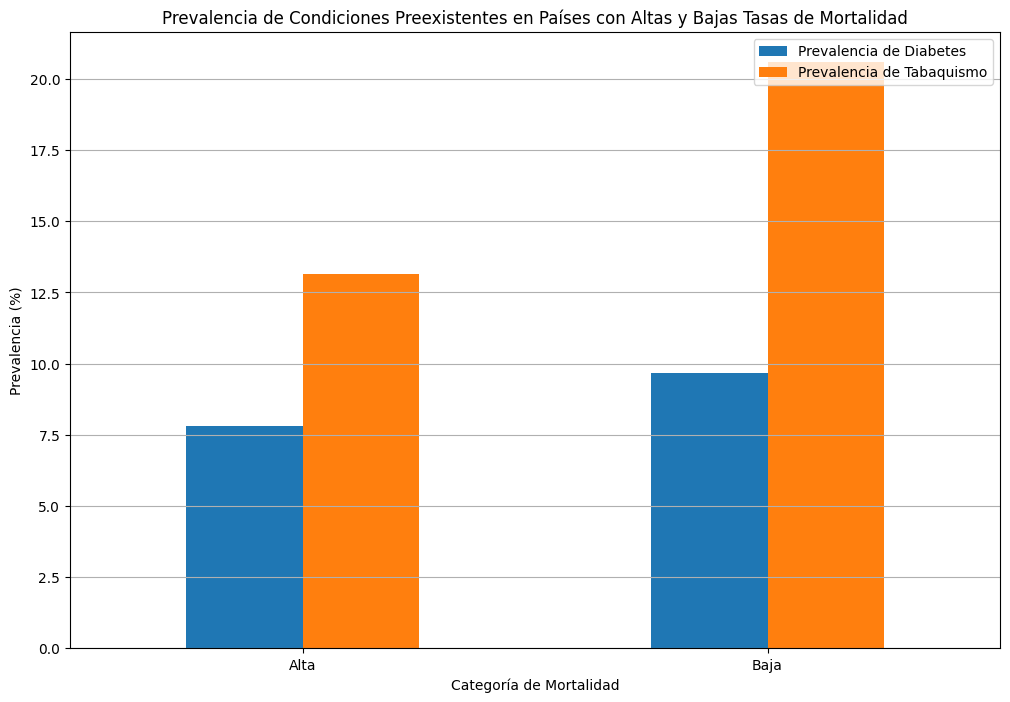

In [50]:
# Aseguramos que las columnas necesarias existan y no tengan valores faltantes
required_columns = ['country_name', 'cumulative_deceased', 'population', 'diabetes_prevalence', 'smoking_prevalence']
for col in required_columns:
    if col not in df_data_filtrada1.columns:
        raise KeyError(f"Missing required column: {col}")

df_data_filtrada1[required_columns] = df_data_filtrada1[required_columns].fillna(0)

# Calculamos la tasa de mortalidad
df_data_filtrada1['mortality_rate'] = df_data_filtrada1['cumulative_deceased'] / df_data_filtrada1['population']

# Definimos umbral para altas y bajas tasas de mortalidad
threshold = df_data_filtrada1['mortality_rate'].median()

# Clasificamos los países en altas y bajas tasas de mortalidad
df_data_filtrada1['mortality_category'] = df_data_filtrada1['mortality_rate'].apply(lambda x: 'Alta' if x > threshold else 'Baja')

# Calculamos la prevalencia promedio de diabetes y de tabaquismo en cada categoría
prevalence_data = df_data_filtrada1.groupby('mortality_category')[['diabetes_prevalence', 'smoking_prevalence']].mean().reset_index()

# Creamos el gráfico
plt.figure(figsize=(12, 8))
prevalence_data.set_index('mortality_category').plot(kind='bar', ax=plt.gca())

plt.title('Prevalencia de Condiciones Preexistentes en Países con Altas y Bajas Tasas de Mortalidad')
plt.xlabel('Categoría de Mortalidad')
plt.ylabel('Prevalencia (%)')
plt.xticks(rotation=0)
plt.legend(['Prevalencia de Diabetes', 'Prevalencia de Tabaquismo'], loc='upper right')
plt.grid(axis='y')

plt.show()


En países con Altas tasas de mortalidad, la prevalencia de diabetes y tabaquismo es significativamente menor que en países con Bajas tasas de mortalidad.
En países con Bajas tasas de mortalidad, la prevalencia de tabaquismo es especialmente alta, superando el 20%.
La prevalencia de diabetes es aproximadamente similar en ambos grupos, pero es ligeramente mayor en países con bajas tasas de mortalidad.
La menor prevalencia de tabaquismo y diabetes en países con altas tasas de mortalidad puede indicar que otros factores (como la calidad de los sistemas de salud, la respuesta a la pandemia, la infraestructura de atención médica, y las intervenciones de salud pública) juegan un papel más importante en la tasa de mortalidad que estas condiciones preexistentes.
La alta prevalencia de tabaquismo en países con bajas tasas de mortalidad sugiere que, aunque el tabaquismo es un factor de riesgo significativo para muchas enfermedades, estos países pueden tener mejores sistemas de salud que mitigan el impacto del tabaquismo en la mortalidad por COVID-19.

##### Estrategia de vacunacion por pais.

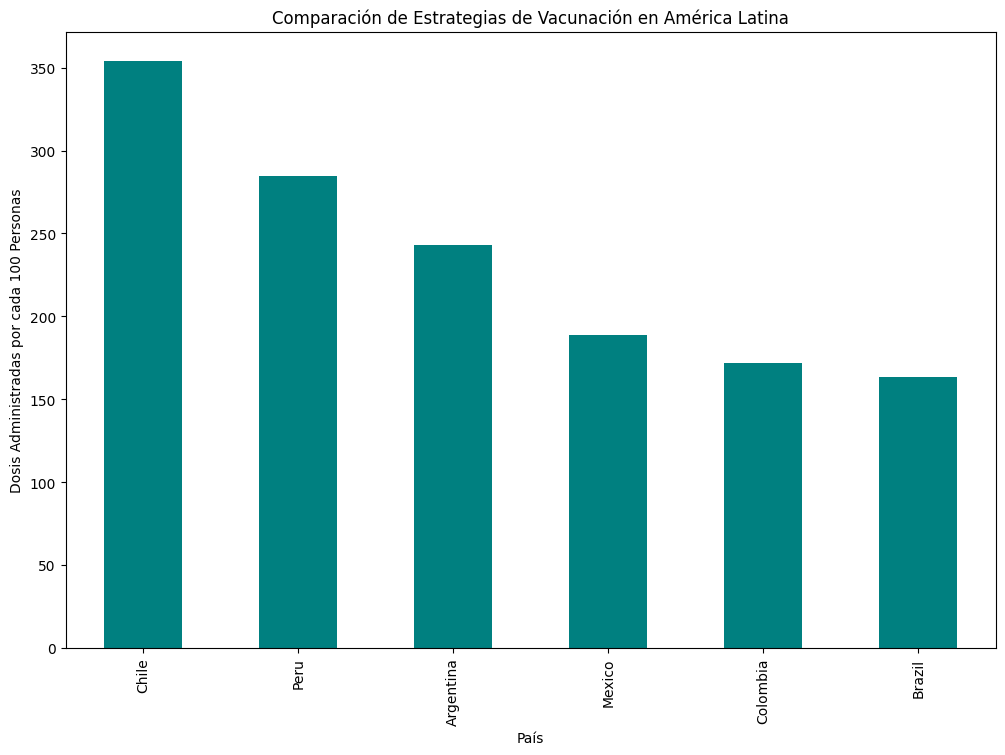

In [51]:
vaccination_strategy = data_latinoamerica_paises.groupby('country_name')['cumulative_vaccine_doses_administered'].max() / data_latinoamerica_paises.groupby('country_name')['population'].max() * 100

vaccination_strategy.sort_values(ascending=False).plot(kind='bar', figsize=(12, 8), color='teal')
plt.xlabel('País')
plt.ylabel('Dosis Administradas por cada 100 Personas')
plt.title('Comparación de Estrategias de Vacunación en América Latina')
plt.show()


La alta cantidad de dosis administradas en Chile sugiere una estrategia de vacunación muy agresiva y efectiva, posiblemente debido a una combinación de factores como la disponibilidad de vacunas, la infraestructura de salud y la aceptación de la vacuna por parte de la población.
Perú y Argentina también han tenido campañas de vacunación relativamente exitosas, con una alta cobertura.
Los países con menores dosis administradas por cada 100 personas podrían enfrentar desafíos como la logística de distribución de vacunas, la disponibilidad de dosis, o la aceptación de la vacuna.

##### Tasa de letalidad por paises

C:\Users\julic\AppData\Local\Temp\ipykernel_14316\3681904541.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_latinoamerica_paises['case_fatality_rate'] = data_latinoamerica_paises['cumulative_deceased'] / data_latinoamerica_paises['cumulative_confirmed']


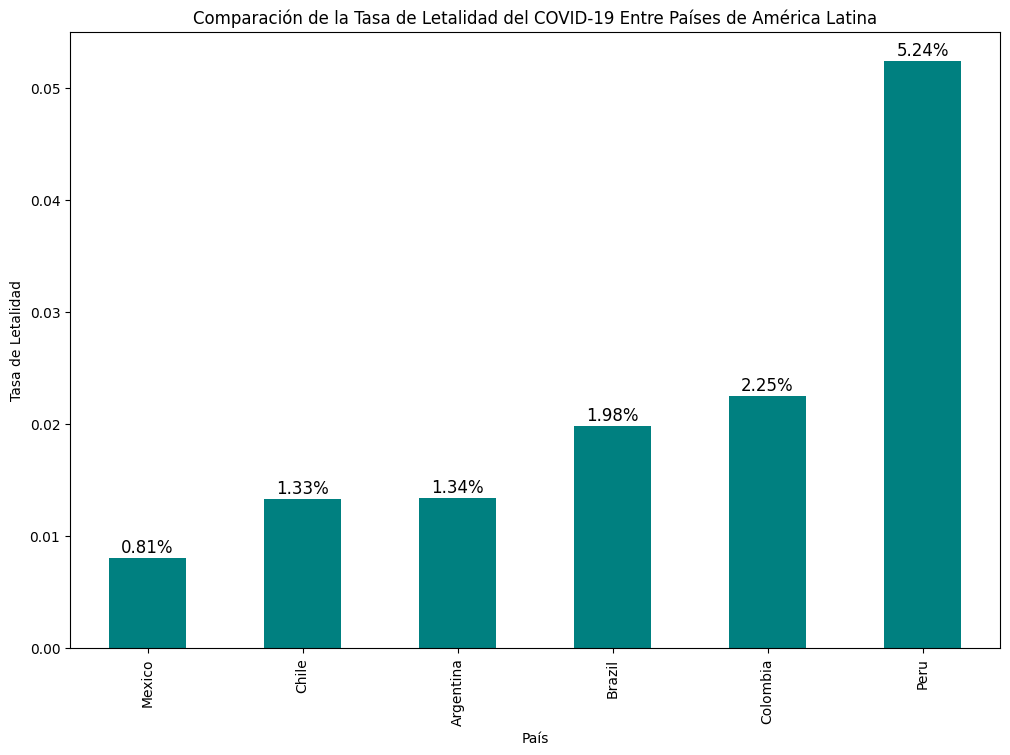

In [52]:
import matplotlib.pyplot as plt

# Calculamos la tasa de letalidad por país
data_latinoamerica_paises['case_fatality_rate'] = data_latinoamerica_paises['cumulative_deceased'] / data_latinoamerica_paises['cumulative_confirmed']
fatality_rates = data_latinoamerica_paises.groupby('country_name')['case_fatality_rate'].last().sort_values()

# Creamos el gráfico de barras
plt.figure(figsize=(12, 8))
bars = fatality_rates.plot(kind='bar', color='teal')

# Configuramos los ejes y el título del gráfico
plt.xlabel('País')
plt.ylabel('Tasa de Letalidad')
plt.title('Comparación de la Tasa de Letalidad del COVID-19 Entre Países de América Latina')

# Añadimos etiquetas en cada barra
for bar in bars.patches:
    bars.annotate(format(bar.get_height(), '.2%'),
                  (bar.get_x() + bar.get_width() / 2., bar.get_height()),
                  ha='center', va='center',
                  size=12, xytext=(0, 8),
                  textcoords='offset points')

# Mostramos el gráfico
plt.show()


Peru lidera este grafico con mas del doble de la tasa de mortalidad que el segundo. 

##### Relacion entre profesional de la salud y fallecidos.

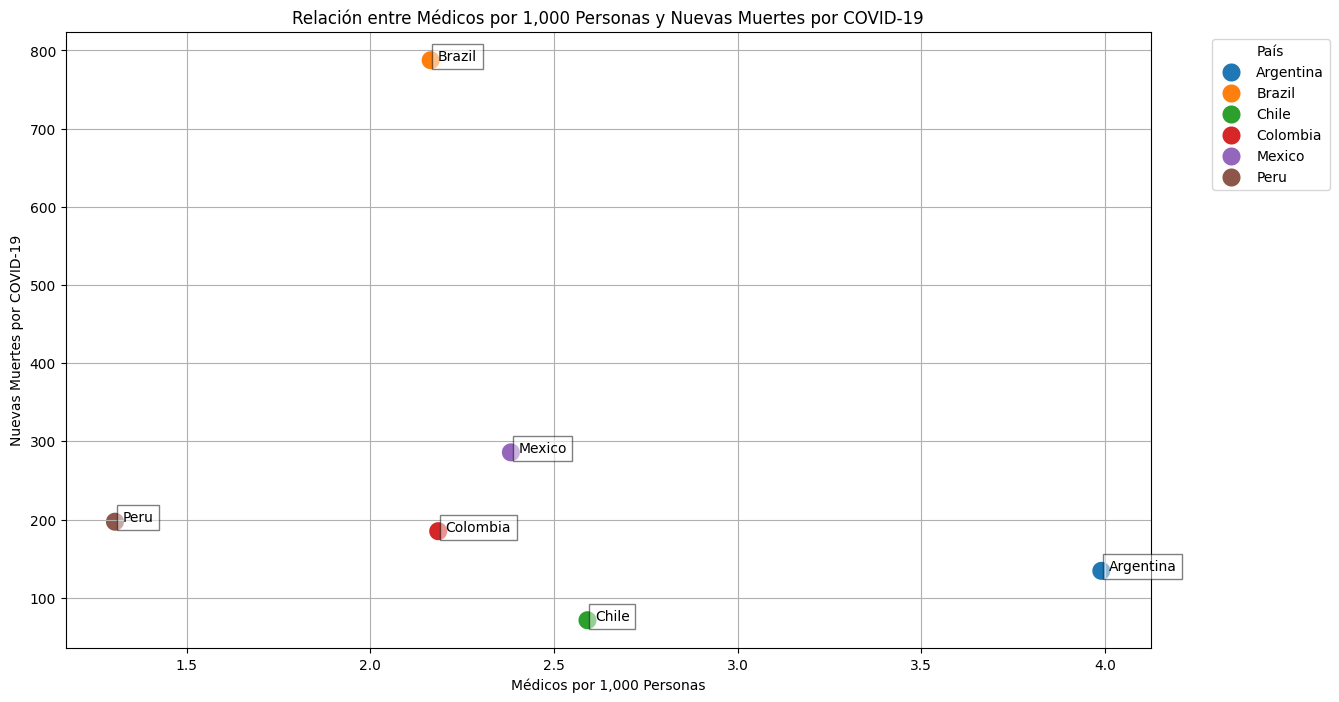

In [53]:
# aseguramos que las columnas necesarias existan y no tengan valores faltantes
required_columns = ['country_name', 'physicians_per_1000', 'new_deceased']
for col in required_columns:
    if col not in df_data_filtrada1.columns:
        raise KeyError(f"Missing required column: {col}")

df_data_filtrada1[required_columns] = df_data_filtrada1[required_columns].fillna(0)

# Agrupamos por país y calculamos la media de médicos por 1,000 personas y las nuevas muertes
grouped_df = df_data_filtrada1.groupby('country_name')[['physicians_per_1000', 'new_deceased']].mean().reset_index()

# Creamos el gráfico de dispersión
plt.figure(figsize=(14, 8))
sns.scatterplot(data=grouped_df, x='physicians_per_1000', y='new_deceased', hue='country_name', s=200)

# Añadimos etiquetas para cada país
for i in range(grouped_df.shape[0]):
    plt.text(x=grouped_df['physicians_per_1000'][i]+0.02, y=grouped_df['new_deceased'][i], 
             s=grouped_df['country_name'][i], 
             fontdict=dict(color='black',size=10),
             bbox=dict(facecolor='white',alpha=0.5))

plt.title('Relación entre Médicos por 1,000 Personas y Nuevas Muertes por COVID-19')
plt.xlabel('Médicos por 1,000 Personas')
plt.ylabel('Nuevas Muertes por COVID-19')
plt.legend(title='País', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


Argentina: Tiene una alta cantidad de médicos por 1,000 personas (~4.0) y un número relativamente bajo de nuevas muertes por COVID-19 (~200).
Chile: También tiene una cantidad moderada a alta de médicos por 1,000 personas (~3.0) y un número bajo de nuevas muertes (~150).
Brasil: Tiene una cantidad baja de médicos por 1,000 personas (~2.0) y un número muy alto de nuevas muertes por COVID-19 (~800), lo que puede indicar un sistema de salud bajo presión.
México y Colombia: Ambos tienen una cantidad moderada de médicos por 1,000 personas (~2.0-2.5) y un número intermedio de nuevas muertes (~300).
Perú: Tiene la menor cantidad de médicos por 1,000 personas (~1.5) y un número relativamente bajo de nuevas muertes (~200).

Inversamente Proporcional: Existe una tendencia inversa en general; los países con una mayor cantidad de médicos por 1,000 personas tienden a tener un menor número de nuevas muertes por COVID-19. Esto puede sugerir que un mayor acceso a atención médica está asociado con mejores resultados en términos de mortalidad.
Excepciones: Sin embargo, Brasil es una excepción notable, con una cantidad relativamente baja de médicos y un número muy alto de nuevas muertes, lo que podría deberse a otros factores como la gestión de la pandemia, la capacidad del sistema de salud, las políticas de salud pública, la densidad poblacional, o la prevalencia de comorbilidades.

In [54]:
pip install geopandas


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


##### Distribucion geografica de casos confirmados 

C:\Users\julic\AppData\Local\Temp\ipykernel_14316\1033498477.py:5: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


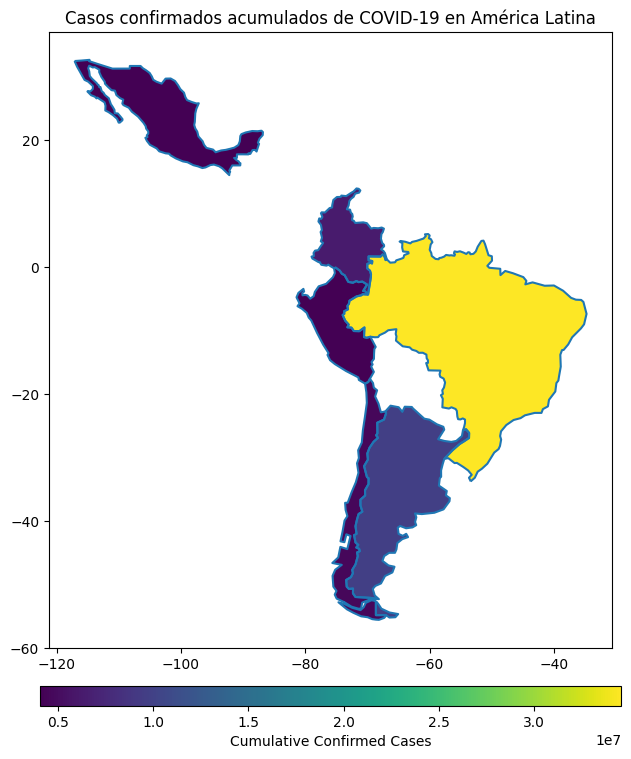

In [55]:
# Mapa para ver la distribución de casos confirmados en Latinoamérica por país
import geopandas as gpd

# Leer el dataset de mapas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Filtrar países de América Latina
world = world[(world.pop_est > 0) & (world.name != "Antarctica")]
world = world[(world.name == "Argentina") | (world.name == "Chile") | (world.name == "Colombia") | 
              (world.name == "Mexico") | (world.name == "Peru") | (world.name == "Brazil")]

# Renombrar la columna para hacer el merge
world = world.rename(columns={'name': 'country_name'})

# Agrupar datos por país y sumar los casos confirmados acumulados
data_latinoamerica_paises = data_latinoamerica_paises.groupby('country_name')['cumulative_confirmed'].max().reset_index()

# Hacer merge con el GeoDataFrame de los mapas
world = world.merge(data_latinoamerica_paises, on="country_name")

# Crear la figura y el eje
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

# Plotear el mapa con los datos
world.boundary.plot(ax=ax)
world.plot(column='cumulative_confirmed', ax=ax, legend=True, legend_kwds={'label': "Cumulative Confirmed Cases",
                                                                           'orientation': "horizontal",
                                                                           'shrink': 0.5, 'pad': 0.05, 'aspect': 30})
plt.title('Casos confirmados acumulados de COVID-19 en América Latina')
plt.show()
